# Simple Deep Learning Model - Keras (3 of 3)

This notebook is one in a series of three with a simple deep learning model built three ways the same to compare and contrast; with just Numpy, with TensorFlow without Keras (TF1.15) and TensorFlow 2 with Keras

### Summary of the model
#### Model
- The model is a 3-layer deep neural network with the following shape: 
LINEAR (10 Neurons) -> RELU -> LINEAR (5 Neurons) -> RELU -> LINEAR (1 Neuron) -> SIGMOID

The model build follows standard Deep Learning methodology:
    1. Initialize parameters / Define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation using activation functions at each layer
        b. Compute cost function
        c. Backward propagation
        d. Update parameters (using parameters, and gradients from the 'backprop') 
    4. Use trained parameters to predict labels from a new set of data
    5. Review the performance of the model to see if it generalises well to new data
#### Parameter Initialisation
- Random parameters are chosen when they are initialised in a model to break symetery. Research has shown that He initialization works better for layers with ReLu activation. Xavier initialization works better for layers with sigmoid activation.

#### Activation Functions
- *ReLU* (Rectified Linear Unit) has superior properties over Sigmoid because it allowed to the solve vanishing / exploding gradients problem except...
- *Sigmoid* is especially useful for models which predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice in the final layer. 

#### Cost (or loss) Function
- The model uses a straightforward 'log loss' calculation, also known as 'cross-entropy loss' to calculate the cost of the predictions vs the ground truth labels (y data) ,in this case binary cross-entropy as we are predicting 1s or 0s. .

#### Backward Propagation
- The model uses standard gradient descent also known as Stochastic gradient descent. We don't use any further optimisers such as momentum in this use-case.

#### Data
- Utlising a 2-dimensional binary classification dataset allows for the visualisation of a decision boundry learned by the model. In this case, 'make_circles' from Scikit-Learn,a simple toy dataset which produces Gaussian data with a spherical decision boundary.
- The model is universal though and can be used with data with many features, even image data.

Let's get started!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Note we don't install or import TensorFlow, Keras uses a TensorFlow backend in its library.

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.initializers import he_uniform

Using TensorFlow backend.


In [2]:
# print(tf.__version__) - TensorFlow is not imported!

In [3]:
import sklearn.datasets

def load_dataset():
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_Y = train_Y.reshape((train_Y.shape[0], 1))
    test_Y = test_Y.reshape((test_Y.shape[0], 1))
    return train_X, train_Y, test_X, test_Y

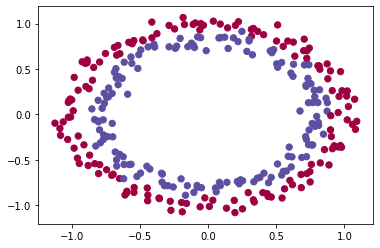

In [4]:
# load image dataset: blue/red dots in circles
X_train, Y_train, X_test, Y_test = load_dataset()

In [5]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 300
number of test examples = 100
X_train shape: (300, 2)
Y_train shape: (300, 1)
X_test shape: (100, 2)
Y_test shape: (100, 1)


### Keras

The Keras Python library makes creating deep learning models fast and easy.

The sequential API allows you to create models layer-by-layer for most problems. Keras has different activation functions built in such as ‘sigmoid’, ‘relu’, ‘softmax’, and many others. Also built in are different weight initialization options.



In [6]:
# Define our model object
model = Sequential()

# Determine shape of features to feed into input layer
features = X_train.shape[1]

# How many neurons in hidden layer 1
neurons_1 = 10

# How many neurons in hidden layer 2
neurons_2 = 5

# A Dense layer initialization method defaults to the 'glorot_uniform' initialization option 
# in Keras (generally better for sigmoid) and therefore he_uniform defined in the 
# first two layers for relu.
relu_initializer = he_uniform(seed=1)

# Add layers to our model
model.add(Dense(units=neurons_1, input_dim=features, activation='relu', kernel_initializer=relu_initializer))
model.add(Dense(units=neurons_2, input_dim=neurons_1, activation='relu', kernel_initializer=relu_initializer))
model.add(Dense(units=1, input_dim=neurons_2, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
# Define the backward propagation algorithm
sgd = SGD(learning_rate = 0.01)

In [8]:
# Compile the model
# The Keras wrapper for 'sigmoid_cross_entropy_with_logits' is called 'binary_crossentropy'
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
# Display a summary of the model - not necessary to compile the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train the model on the data, the paramaters and other data will be stored in 'history' variable 
# Care - Batch size defaults to 32 (samples), so 1 epoch (whole run) will run c.10 iterations (batches)
history = model.fit(X_train, Y_train, batch_size=300, epochs=40000, verbose=1, validation_data= (X_test, Y_test))


Train on 300 samples, validate on 100 samples
Epoch 1/40000
300/300 [==============================] - 1s 2ms/step - loss: 0.7383 - accuracy: 0.5000 - val_loss: 0.7333 - val_accuracy: 0.5000
Epoch 2/40000
300/300 [==============================] - 0s 18us/step - loss: 0.7378 - accuracy: 0.5000 - val_loss: 0.7328 - val_accuracy: 0.5000
Epoch 3/40000
300/300 [==============================] - 0s 18us/step - loss: 0.7372 - accuracy: 0.5000 - val_loss: 0.7323 - val_accuracy: 0.5000
Epoch 4/40000
300/300 [==============================] - 0s 19us/step - loss: 0.7367 - accuracy: 0.5000 - val_loss: 0.7318 - val_accuracy: 0.5000
Epoch 5/40000
300/300 [==============================] - 0s 20us/step - loss: 0.7361 - accuracy: 0.5000 - val_loss: 0.7313 - val_accuracy: 0.5000
Epoch 6/40000
300/300 [==============================] - 0s 18us/step - loss: 0.7356 - accuracy: 0.5000 - val_loss: 0.7308 - val_accuracy: 0.5000
Epoch 7/40000
300/300 [==============================] - 0s 19us/step - loss: 

Epoch 55/40000
300/300 [==============================] - 0s 18us/step - loss: 0.7177 - accuracy: 0.4967 - val_loss: 0.7146 - val_accuracy: 0.4900
Epoch 56/40000
300/300 [==============================] - 0s 19us/step - loss: 0.7174 - accuracy: 0.4933 - val_loss: 0.7144 - val_accuracy: 0.4900
Epoch 57/40000
300/300 [==============================] - 0s 18us/step - loss: 0.7172 - accuracy: 0.4933 - val_loss: 0.7142 - val_accuracy: 0.4900
Epoch 58/40000
300/300 [==============================] - 0s 19us/step - loss: 0.7169 - accuracy: 0.4900 - val_loss: 0.7140 - val_accuracy: 0.4900
Epoch 59/40000
300/300 [==============================] - 0s 19us/step - loss: 0.7167 - accuracy: 0.4900 - val_loss: 0.7138 - val_accuracy: 0.5000
Epoch 60/40000
300/300 [==============================] - 0s 19us/step - loss: 0.7164 - accuracy: 0.4933 - val_loss: 0.7136 - val_accuracy: 0.5000
Epoch 61/40000
300/300 [==============================] - 0s 19us/step - loss: 0.7162 - accuracy: 0.4900 - val_loss: 0

Epoch 111/40000
300/300 [==============================] - 0s 24us/step - loss: 0.7079 - accuracy: 0.4800 - val_loss: 0.7062 - val_accuracy: 0.4700
Epoch 112/40000
300/300 [==============================] - 0s 21us/step - loss: 0.7078 - accuracy: 0.4833 - val_loss: 0.7061 - val_accuracy: 0.4700
Epoch 113/40000
300/300 [==============================] - 0s 24us/step - loss: 0.7077 - accuracy: 0.4833 - val_loss: 0.7060 - val_accuracy: 0.4700
Epoch 114/40000
300/300 [==============================] - 0s 19us/step - loss: 0.7076 - accuracy: 0.4833 - val_loss: 0.7059 - val_accuracy: 0.4700
Epoch 115/40000
300/300 [==============================] - 0s 21us/step - loss: 0.7074 - accuracy: 0.4833 - val_loss: 0.7058 - val_accuracy: 0.4700
Epoch 116/40000
300/300 [==============================] - 0s 26us/step - loss: 0.7073 - accuracy: 0.4867 - val_loss: 0.7057 - val_accuracy: 0.4800
Epoch 117/40000
300/300 [==============================] - 0s 21us/step - loss: 0.7072 - accuracy: 0.4833 - val_

Epoch 167/40000
300/300 [==============================] - 0s 18us/step - loss: 0.7031 - accuracy: 0.4533 - val_loss: 0.7022 - val_accuracy: 0.5100
Epoch 168/40000
300/300 [==============================] - 0s 18us/step - loss: 0.7030 - accuracy: 0.4533 - val_loss: 0.7022 - val_accuracy: 0.5100
Epoch 169/40000
300/300 [==============================] - 0s 19us/step - loss: 0.7030 - accuracy: 0.4533 - val_loss: 0.7021 - val_accuracy: 0.5100
Epoch 170/40000
300/300 [==============================] - 0s 18us/step - loss: 0.7029 - accuracy: 0.4533 - val_loss: 0.7021 - val_accuracy: 0.5100
Epoch 171/40000
300/300 [==============================] - 0s 20us/step - loss: 0.7029 - accuracy: 0.4533 - val_loss: 0.7020 - val_accuracy: 0.5100
Epoch 172/40000
300/300 [==============================] - 0s 19us/step - loss: 0.7028 - accuracy: 0.4500 - val_loss: 0.7020 - val_accuracy: 0.5100
Epoch 173/40000
300/300 [==============================] - 0s 18us/step - loss: 0.7028 - accuracy: 0.4467 - val_

Epoch 223/40000
300/300 [==============================] - 0s 18us/step - loss: 0.7005 - accuracy: 0.4467 - val_loss: 0.7002 - val_accuracy: 0.4700
Epoch 224/40000
300/300 [==============================] - 0s 19us/step - loss: 0.7005 - accuracy: 0.4467 - val_loss: 0.7002 - val_accuracy: 0.4700
Epoch 225/40000
300/300 [==============================] - 0s 18us/step - loss: 0.7004 - accuracy: 0.4467 - val_loss: 0.7002 - val_accuracy: 0.4700
Epoch 226/40000
300/300 [==============================] - 0s 17us/step - loss: 0.7004 - accuracy: 0.4500 - val_loss: 0.7002 - val_accuracy: 0.4700
Epoch 227/40000
300/300 [==============================] - 0s 18us/step - loss: 0.7004 - accuracy: 0.4500 - val_loss: 0.7001 - val_accuracy: 0.4700
Epoch 228/40000
300/300 [==============================] - 0s 19us/step - loss: 0.7003 - accuracy: 0.4533 - val_loss: 0.7001 - val_accuracy: 0.4700
Epoch 229/40000
300/300 [==============================] - 0s 18us/step - loss: 0.7003 - accuracy: 0.4567 - val_

Epoch 279/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6989 - accuracy: 0.4533 - val_loss: 0.6990 - val_accuracy: 0.4500
Epoch 280/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6989 - accuracy: 0.4533 - val_loss: 0.6990 - val_accuracy: 0.4500
Epoch 281/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6989 - accuracy: 0.4533 - val_loss: 0.6990 - val_accuracy: 0.4400
Epoch 282/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6989 - accuracy: 0.4533 - val_loss: 0.6990 - val_accuracy: 0.4400
Epoch 283/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6989 - accuracy: 0.4533 - val_loss: 0.6990 - val_accuracy: 0.4400
Epoch 284/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6988 - accuracy: 0.4533 - val_loss: 0.6989 - val_accuracy: 0.4500
Epoch 285/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6988 - accuracy: 0.4533 - val_

Epoch 335/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6979 - accuracy: 0.4433 - val_loss: 0.6982 - val_accuracy: 0.4700
Epoch 336/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6979 - accuracy: 0.4433 - val_loss: 0.6982 - val_accuracy: 0.4700
Epoch 337/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6978 - accuracy: 0.4467 - val_loss: 0.6982 - val_accuracy: 0.4700
Epoch 338/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6978 - accuracy: 0.4467 - val_loss: 0.6982 - val_accuracy: 0.4700
Epoch 339/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6978 - accuracy: 0.4467 - val_loss: 0.6981 - val_accuracy: 0.4700
Epoch 340/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6978 - accuracy: 0.4467 - val_loss: 0.6981 - val_accuracy: 0.4700
Epoch 341/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6978 - accuracy: 0.4467 - val_

Epoch 391/40000
300/300 [==============================] - 0s 23us/step - loss: 0.6970 - accuracy: 0.4633 - val_loss: 0.6976 - val_accuracy: 0.4900
Epoch 392/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6970 - accuracy: 0.4600 - val_loss: 0.6976 - val_accuracy: 0.4900
Epoch 393/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6970 - accuracy: 0.4600 - val_loss: 0.6975 - val_accuracy: 0.4900
Epoch 394/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6970 - accuracy: 0.4600 - val_loss: 0.6975 - val_accuracy: 0.4900
Epoch 395/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6970 - accuracy: 0.4600 - val_loss: 0.6975 - val_accuracy: 0.4900
Epoch 396/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6970 - accuracy: 0.4600 - val_loss: 0.6975 - val_accuracy: 0.4900
Epoch 397/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6970 - accuracy: 0.4600 - val_

Epoch 447/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6963 - accuracy: 0.4700 - val_loss: 0.6970 - val_accuracy: 0.4700
Epoch 448/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6963 - accuracy: 0.4700 - val_loss: 0.6970 - val_accuracy: 0.4700
Epoch 449/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6963 - accuracy: 0.4700 - val_loss: 0.6970 - val_accuracy: 0.4700
Epoch 450/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6963 - accuracy: 0.4700 - val_loss: 0.6970 - val_accuracy: 0.4700
Epoch 451/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6963 - accuracy: 0.4700 - val_loss: 0.6970 - val_accuracy: 0.4700
Epoch 452/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6963 - accuracy: 0.4700 - val_loss: 0.6970 - val_accuracy: 0.4700
Epoch 453/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6962 - accuracy: 0.4700 - val_

Epoch 503/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6957 - accuracy: 0.4733 - val_loss: 0.6965 - val_accuracy: 0.4900
Epoch 504/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6956 - accuracy: 0.4733 - val_loss: 0.6965 - val_accuracy: 0.4900
Epoch 505/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6956 - accuracy: 0.4733 - val_loss: 0.6965 - val_accuracy: 0.4900
Epoch 506/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6956 - accuracy: 0.4733 - val_loss: 0.6965 - val_accuracy: 0.4900
Epoch 507/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6956 - accuracy: 0.4733 - val_loss: 0.6965 - val_accuracy: 0.4900
Epoch 508/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6956 - accuracy: 0.4733 - val_loss: 0.6965 - val_accuracy: 0.4800
Epoch 509/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6956 - accuracy: 0.4733 - val_

Epoch 559/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6950 - accuracy: 0.4800 - val_loss: 0.6961 - val_accuracy: 0.4800
Epoch 560/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6950 - accuracy: 0.4800 - val_loss: 0.6961 - val_accuracy: 0.4800
Epoch 561/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6950 - accuracy: 0.4800 - val_loss: 0.6961 - val_accuracy: 0.4800
Epoch 562/40000
300/300 [==============================] - 0s 24us/step - loss: 0.6950 - accuracy: 0.4800 - val_loss: 0.6960 - val_accuracy: 0.4800
Epoch 563/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6950 - accuracy: 0.4800 - val_loss: 0.6960 - val_accuracy: 0.4800
Epoch 564/40000
300/300 [==============================] - 0s 24us/step - loss: 0.6950 - accuracy: 0.4833 - val_loss: 0.6960 - val_accuracy: 0.4800
Epoch 565/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6950 - accuracy: 0.4833 - val_

Epoch 615/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6944 - accuracy: 0.4867 - val_loss: 0.6956 - val_accuracy: 0.4800
Epoch 616/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6944 - accuracy: 0.4900 - val_loss: 0.6956 - val_accuracy: 0.4800
Epoch 617/40000
300/300 [==============================] - 0s 24us/step - loss: 0.6944 - accuracy: 0.4900 - val_loss: 0.6956 - val_accuracy: 0.4800
Epoch 618/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6944 - accuracy: 0.4933 - val_loss: 0.6956 - val_accuracy: 0.4800
Epoch 619/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6944 - accuracy: 0.4933 - val_loss: 0.6956 - val_accuracy: 0.4800
Epoch 620/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6944 - accuracy: 0.4933 - val_loss: 0.6956 - val_accuracy: 0.4800
Epoch 621/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6944 - accuracy: 0.4967 - val_

Epoch 671/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6939 - accuracy: 0.4933 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 672/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6939 - accuracy: 0.4933 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 673/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6939 - accuracy: 0.4933 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 674/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6939 - accuracy: 0.4933 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 675/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6938 - accuracy: 0.4933 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 676/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6938 - accuracy: 0.4933 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 677/40000
300/300 [==============================] - 0s 23us/step - loss: 0.6938 - accuracy: 0.4933 - val_

Epoch 727/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6933 - accuracy: 0.4833 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 728/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6933 - accuracy: 0.4833 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 729/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6933 - accuracy: 0.4833 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 730/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6933 - accuracy: 0.4833 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 731/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6933 - accuracy: 0.4833 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 732/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6933 - accuracy: 0.4833 - val_loss: 0.6947 - val_accuracy: 0.4900
Epoch 733/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6933 - accuracy: 0.4833 - val_

Epoch 783/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6928 - accuracy: 0.4667 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 784/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6928 - accuracy: 0.4667 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 785/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6927 - accuracy: 0.4667 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 786/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6927 - accuracy: 0.4667 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 787/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6927 - accuracy: 0.4667 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 788/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6927 - accuracy: 0.4667 - val_loss: 0.6943 - val_accuracy: 0.4900
Epoch 789/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6927 - accuracy: 0.4667 - val_

Epoch 839/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6922 - accuracy: 0.4700 - val_loss: 0.6940 - val_accuracy: 0.4900
Epoch 840/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6922 - accuracy: 0.4700 - val_loss: 0.6940 - val_accuracy: 0.4900
Epoch 841/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6922 - accuracy: 0.4700 - val_loss: 0.6940 - val_accuracy: 0.4900
Epoch 842/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6922 - accuracy: 0.4700 - val_loss: 0.6940 - val_accuracy: 0.4900
Epoch 843/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6922 - accuracy: 0.4700 - val_loss: 0.6939 - val_accuracy: 0.4900
Epoch 844/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6922 - accuracy: 0.4700 - val_loss: 0.6939 - val_accuracy: 0.4900
Epoch 845/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6922 - accuracy: 0.4700 - val_

Epoch 895/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6917 - accuracy: 0.4900 - val_loss: 0.6936 - val_accuracy: 0.5100
Epoch 896/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6917 - accuracy: 0.4900 - val_loss: 0.6935 - val_accuracy: 0.5100
Epoch 897/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6917 - accuracy: 0.4900 - val_loss: 0.6935 - val_accuracy: 0.5100
Epoch 898/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6917 - accuracy: 0.4900 - val_loss: 0.6935 - val_accuracy: 0.5100
Epoch 899/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6917 - accuracy: 0.4900 - val_loss: 0.6935 - val_accuracy: 0.5100
Epoch 900/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6917 - accuracy: 0.4900 - val_loss: 0.6935 - val_accuracy: 0.5100
Epoch 901/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6916 - accuracy: 0.4900 - val_

Epoch 951/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6912 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5200
Epoch 952/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6912 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5200
Epoch 953/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6912 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5200
Epoch 954/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6912 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5200
Epoch 955/40000
300/300 [==============================] - 0s 23us/step - loss: 0.6912 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5200
Epoch 956/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6912 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5200
Epoch 957/40000
300/300 [==============================] - 0s 24us/step - loss: 0.6912 - accuracy: 0.4900 - val_

Epoch 1007/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6907 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 1008/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6907 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 1009/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6907 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 1010/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6907 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 1011/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6907 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 1012/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6907 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 1013/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6907 - accuracy: 0.5000

Epoch 1062/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6902 - accuracy: 0.5100 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 1063/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6902 - accuracy: 0.5100 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 1064/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6902 - accuracy: 0.5100 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 1065/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6902 - accuracy: 0.5100 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 1066/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6902 - accuracy: 0.5100 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 1067/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6901 - accuracy: 0.5100 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 1068/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6901 - accuracy: 0.5100

Epoch 1117/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6897 - accuracy: 0.5133 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 1118/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6897 - accuracy: 0.5133 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 1119/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6897 - accuracy: 0.5133 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 1120/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6897 - accuracy: 0.5133 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 1121/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6897 - accuracy: 0.5133 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 1122/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6896 - accuracy: 0.5133 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 1123/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6896 - accuracy: 0.5133

Epoch 1172/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6892 - accuracy: 0.5167 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 1173/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6892 - accuracy: 0.5167 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 1174/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6892 - accuracy: 0.5167 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 1175/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6892 - accuracy: 0.5167 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 1176/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6892 - accuracy: 0.5167 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 1177/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6891 - accuracy: 0.5167 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 1178/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6891 - accuracy: 0.5167

Epoch 1227/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6887 - accuracy: 0.5167 - val_loss: 0.6912 - val_accuracy: 0.5100
Epoch 1228/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6887 - accuracy: 0.5167 - val_loss: 0.6912 - val_accuracy: 0.5100
Epoch 1229/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6887 - accuracy: 0.5167 - val_loss: 0.6912 - val_accuracy: 0.5100
Epoch 1230/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6887 - accuracy: 0.5167 - val_loss: 0.6912 - val_accuracy: 0.5100
Epoch 1231/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6887 - accuracy: 0.5167 - val_loss: 0.6912 - val_accuracy: 0.5100
Epoch 1232/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6887 - accuracy: 0.5167 - val_loss: 0.6912 - val_accuracy: 0.5100
Epoch 1233/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6887 - accuracy: 0.5167

Epoch 1282/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6883 - accuracy: 0.5200 - val_loss: 0.6909 - val_accuracy: 0.5100
Epoch 1283/40000
300/300 [==============================] - 0s 26us/step - loss: 0.6883 - accuracy: 0.5200 - val_loss: 0.6909 - val_accuracy: 0.5100
Epoch 1284/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6883 - accuracy: 0.5200 - val_loss: 0.6909 - val_accuracy: 0.5100
Epoch 1285/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6883 - accuracy: 0.5200 - val_loss: 0.6908 - val_accuracy: 0.5100
Epoch 1286/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6883 - accuracy: 0.5200 - val_loss: 0.6908 - val_accuracy: 0.5100
Epoch 1287/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6883 - accuracy: 0.5200 - val_loss: 0.6908 - val_accuracy: 0.5100
Epoch 1288/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6883 - accuracy: 0.5200

Epoch 1337/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6879 - accuracy: 0.5200 - val_loss: 0.6905 - val_accuracy: 0.5100
Epoch 1338/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6879 - accuracy: 0.5200 - val_loss: 0.6905 - val_accuracy: 0.5100
Epoch 1339/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6879 - accuracy: 0.5200 - val_loss: 0.6905 - val_accuracy: 0.5100
Epoch 1340/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6879 - accuracy: 0.5200 - val_loss: 0.6905 - val_accuracy: 0.5100
Epoch 1341/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6879 - accuracy: 0.5200 - val_loss: 0.6905 - val_accuracy: 0.5100
Epoch 1342/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6879 - accuracy: 0.5200 - val_loss: 0.6905 - val_accuracy: 0.5100
Epoch 1343/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6879 - accuracy: 0.5200

Epoch 1392/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6875 - accuracy: 0.5200 - val_loss: 0.6902 - val_accuracy: 0.5200
Epoch 1393/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6875 - accuracy: 0.5200 - val_loss: 0.6902 - val_accuracy: 0.5200
Epoch 1394/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6875 - accuracy: 0.5200 - val_loss: 0.6902 - val_accuracy: 0.5200
Epoch 1395/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6875 - accuracy: 0.5200 - val_loss: 0.6902 - val_accuracy: 0.5200
Epoch 1396/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6875 - accuracy: 0.5200 - val_loss: 0.6902 - val_accuracy: 0.5200
Epoch 1397/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6875 - accuracy: 0.5200 - val_loss: 0.6902 - val_accuracy: 0.5200
Epoch 1398/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6874 - accuracy: 0.5200

Epoch 1447/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6871 - accuracy: 0.5233 - val_loss: 0.6899 - val_accuracy: 0.5200
Epoch 1448/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6871 - accuracy: 0.5233 - val_loss: 0.6899 - val_accuracy: 0.5200
Epoch 1449/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6871 - accuracy: 0.5233 - val_loss: 0.6899 - val_accuracy: 0.5200
Epoch 1450/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6871 - accuracy: 0.5233 - val_loss: 0.6898 - val_accuracy: 0.5200
Epoch 1451/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6871 - accuracy: 0.5233 - val_loss: 0.6898 - val_accuracy: 0.5200
Epoch 1452/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6871 - accuracy: 0.5233 - val_loss: 0.6898 - val_accuracy: 0.5200
Epoch 1453/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6871 - accuracy: 0.5233

Epoch 1502/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6867 - accuracy: 0.5267 - val_loss: 0.6896 - val_accuracy: 0.5200
Epoch 1503/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6867 - accuracy: 0.5267 - val_loss: 0.6895 - val_accuracy: 0.5200
Epoch 1504/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6867 - accuracy: 0.5267 - val_loss: 0.6895 - val_accuracy: 0.5200
Epoch 1505/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6867 - accuracy: 0.5267 - val_loss: 0.6895 - val_accuracy: 0.5200
Epoch 1506/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6867 - accuracy: 0.5267 - val_loss: 0.6895 - val_accuracy: 0.5200
Epoch 1507/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6867 - accuracy: 0.5267 - val_loss: 0.6895 - val_accuracy: 0.5200
Epoch 1508/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6867 - accuracy: 0.5267

Epoch 1557/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6863 - accuracy: 0.5300 - val_loss: 0.6892 - val_accuracy: 0.5300
Epoch 1558/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6863 - accuracy: 0.5300 - val_loss: 0.6892 - val_accuracy: 0.5300
Epoch 1559/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6863 - accuracy: 0.5300 - val_loss: 0.6892 - val_accuracy: 0.5300
Epoch 1560/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6863 - accuracy: 0.5300 - val_loss: 0.6892 - val_accuracy: 0.5300
Epoch 1561/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6863 - accuracy: 0.5300 - val_loss: 0.6892 - val_accuracy: 0.5300
Epoch 1562/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6863 - accuracy: 0.5300 - val_loss: 0.6892 - val_accuracy: 0.5300
Epoch 1563/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6863 - accuracy: 0.5300

Epoch 1612/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6860 - accuracy: 0.5367 - val_loss: 0.6889 - val_accuracy: 0.5300
Epoch 1613/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6860 - accuracy: 0.5367 - val_loss: 0.6889 - val_accuracy: 0.5300
Epoch 1614/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6860 - accuracy: 0.5367 - val_loss: 0.6889 - val_accuracy: 0.5300
Epoch 1615/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6860 - accuracy: 0.5367 - val_loss: 0.6889 - val_accuracy: 0.5300
Epoch 1616/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6859 - accuracy: 0.5367 - val_loss: 0.6889 - val_accuracy: 0.5300
Epoch 1617/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6859 - accuracy: 0.5367 - val_loss: 0.6889 - val_accuracy: 0.5300
Epoch 1618/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6859 - accuracy: 0.5367

Epoch 1667/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6856 - accuracy: 0.5367 - val_loss: 0.6886 - val_accuracy: 0.5300
Epoch 1668/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6856 - accuracy: 0.5367 - val_loss: 0.6886 - val_accuracy: 0.5300
Epoch 1669/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6856 - accuracy: 0.5367 - val_loss: 0.6886 - val_accuracy: 0.5300
Epoch 1670/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6856 - accuracy: 0.5367 - val_loss: 0.6886 - val_accuracy: 0.5300
Epoch 1671/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6856 - accuracy: 0.5367 - val_loss: 0.6886 - val_accuracy: 0.5300
Epoch 1672/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6856 - accuracy: 0.5367 - val_loss: 0.6886 - val_accuracy: 0.5300
Epoch 1673/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6856 - accuracy: 0.5367

Epoch 1722/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6852 - accuracy: 0.5400 - val_loss: 0.6883 - val_accuracy: 0.5300
Epoch 1723/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6852 - accuracy: 0.5400 - val_loss: 0.6883 - val_accuracy: 0.5300
Epoch 1724/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6852 - accuracy: 0.5400 - val_loss: 0.6883 - val_accuracy: 0.5300
Epoch 1725/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6852 - accuracy: 0.5400 - val_loss: 0.6883 - val_accuracy: 0.5300
Epoch 1726/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6852 - accuracy: 0.5400 - val_loss: 0.6883 - val_accuracy: 0.5300
Epoch 1727/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6852 - accuracy: 0.5400 - val_loss: 0.6883 - val_accuracy: 0.5300
Epoch 1728/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6852 - accuracy: 0.5400

Epoch 1777/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6849 - accuracy: 0.5400 - val_loss: 0.6880 - val_accuracy: 0.5300
Epoch 1778/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6849 - accuracy: 0.5400 - val_loss: 0.6880 - val_accuracy: 0.5300
Epoch 1779/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6849 - accuracy: 0.5400 - val_loss: 0.6880 - val_accuracy: 0.5300
Epoch 1780/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6849 - accuracy: 0.5400 - val_loss: 0.6879 - val_accuracy: 0.5300
Epoch 1781/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6848 - accuracy: 0.5400 - val_loss: 0.6879 - val_accuracy: 0.5300
Epoch 1782/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6848 - accuracy: 0.5400 - val_loss: 0.6879 - val_accuracy: 0.5300
Epoch 1783/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6848 - accuracy: 0.5400

Epoch 1832/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6845 - accuracy: 0.5433 - val_loss: 0.6876 - val_accuracy: 0.5400
Epoch 1833/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6845 - accuracy: 0.5433 - val_loss: 0.6876 - val_accuracy: 0.5400
Epoch 1834/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6845 - accuracy: 0.5433 - val_loss: 0.6876 - val_accuracy: 0.5400
Epoch 1835/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6845 - accuracy: 0.5433 - val_loss: 0.6876 - val_accuracy: 0.5400
Epoch 1836/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6845 - accuracy: 0.5433 - val_loss: 0.6876 - val_accuracy: 0.5400
Epoch 1837/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6845 - accuracy: 0.5433 - val_loss: 0.6876 - val_accuracy: 0.5400
Epoch 1838/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6845 - accuracy: 0.5433

Epoch 1887/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6841 - accuracy: 0.5433 - val_loss: 0.6873 - val_accuracy: 0.5400
Epoch 1888/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6841 - accuracy: 0.5433 - val_loss: 0.6873 - val_accuracy: 0.5400
Epoch 1889/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6841 - accuracy: 0.5433 - val_loss: 0.6873 - val_accuracy: 0.5400
Epoch 1890/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6841 - accuracy: 0.5433 - val_loss: 0.6873 - val_accuracy: 0.5400
Epoch 1891/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6841 - accuracy: 0.5433 - val_loss: 0.6873 - val_accuracy: 0.5400
Epoch 1892/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6841 - accuracy: 0.5433 - val_loss: 0.6873 - val_accuracy: 0.5400
Epoch 1893/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6841 - accuracy: 0.5433

Epoch 1942/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6838 - accuracy: 0.5467 - val_loss: 0.6870 - val_accuracy: 0.5400
Epoch 1943/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6838 - accuracy: 0.5467 - val_loss: 0.6870 - val_accuracy: 0.5400
Epoch 1944/40000
300/300 [==============================] - 0s 24us/step - loss: 0.6838 - accuracy: 0.5467 - val_loss: 0.6869 - val_accuracy: 0.5400
Epoch 1945/40000
300/300 [==============================] - 0s 23us/step - loss: 0.6838 - accuracy: 0.5467 - val_loss: 0.6869 - val_accuracy: 0.5400
Epoch 1946/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6837 - accuracy: 0.5467 - val_loss: 0.6869 - val_accuracy: 0.5400
Epoch 1947/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6837 - accuracy: 0.5467 - val_loss: 0.6869 - val_accuracy: 0.5400
Epoch 1948/40000
300/300 [==============================] - 0s 24us/step - loss: 0.6837 - accuracy: 0.5467

Epoch 1997/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6834 - accuracy: 0.5433 - val_loss: 0.6866 - val_accuracy: 0.5500
Epoch 1998/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6834 - accuracy: 0.5433 - val_loss: 0.6866 - val_accuracy: 0.5500
Epoch 1999/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6834 - accuracy: 0.5433 - val_loss: 0.6866 - val_accuracy: 0.5500
Epoch 2000/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6834 - accuracy: 0.5433 - val_loss: 0.6866 - val_accuracy: 0.5500
Epoch 2001/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6834 - accuracy: 0.5433 - val_loss: 0.6866 - val_accuracy: 0.5500
Epoch 2002/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6834 - accuracy: 0.5433 - val_loss: 0.6866 - val_accuracy: 0.5500
Epoch 2003/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6834 - accuracy: 0.5433

Epoch 2052/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6830 - accuracy: 0.5500 - val_loss: 0.6863 - val_accuracy: 0.5500
Epoch 2053/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6830 - accuracy: 0.5500 - val_loss: 0.6862 - val_accuracy: 0.5500
Epoch 2054/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6830 - accuracy: 0.5500 - val_loss: 0.6862 - val_accuracy: 0.5500
Epoch 2055/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6830 - accuracy: 0.5500 - val_loss: 0.6862 - val_accuracy: 0.5500
Epoch 2056/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6830 - accuracy: 0.5500 - val_loss: 0.6862 - val_accuracy: 0.5500
Epoch 2057/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6830 - accuracy: 0.5500 - val_loss: 0.6862 - val_accuracy: 0.5500
Epoch 2058/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6830 - accuracy: 0.5500

Epoch 2107/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6827 - accuracy: 0.5500 - val_loss: 0.6859 - val_accuracy: 0.5500
Epoch 2108/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6826 - accuracy: 0.5500 - val_loss: 0.6859 - val_accuracy: 0.5500
Epoch 2109/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6826 - accuracy: 0.5500 - val_loss: 0.6859 - val_accuracy: 0.5500
Epoch 2110/40000
300/300 [==============================] - 0s 25us/step - loss: 0.6826 - accuracy: 0.5500 - val_loss: 0.6859 - val_accuracy: 0.5500
Epoch 2111/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6826 - accuracy: 0.5533 - val_loss: 0.6859 - val_accuracy: 0.5500
Epoch 2112/40000
300/300 [==============================] - 0s 24us/step - loss: 0.6826 - accuracy: 0.5533 - val_loss: 0.6859 - val_accuracy: 0.5500
Epoch 2113/40000
300/300 [==============================] - 0s 24us/step - loss: 0.6826 - accuracy: 0.5533

Epoch 2162/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6823 - accuracy: 0.5567 - val_loss: 0.6856 - val_accuracy: 0.5500
Epoch 2163/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6823 - accuracy: 0.5567 - val_loss: 0.6856 - val_accuracy: 0.5500
Epoch 2164/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6823 - accuracy: 0.5567 - val_loss: 0.6855 - val_accuracy: 0.5500
Epoch 2165/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6823 - accuracy: 0.5567 - val_loss: 0.6855 - val_accuracy: 0.5500
Epoch 2166/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6823 - accuracy: 0.5567 - val_loss: 0.6855 - val_accuracy: 0.5500
Epoch 2167/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6822 - accuracy: 0.5567 - val_loss: 0.6855 - val_accuracy: 0.5500
Epoch 2168/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6822 - accuracy: 0.5567

Epoch 2217/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6819 - accuracy: 0.5600 - val_loss: 0.6852 - val_accuracy: 0.5500
Epoch 2218/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6819 - accuracy: 0.5600 - val_loss: 0.6852 - val_accuracy: 0.5500
Epoch 2219/40000
300/300 [==============================] - 0s 23us/step - loss: 0.6819 - accuracy: 0.5600 - val_loss: 0.6852 - val_accuracy: 0.5500
Epoch 2220/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6819 - accuracy: 0.5633 - val_loss: 0.6852 - val_accuracy: 0.5500
Epoch 2221/40000
300/300 [==============================] - 0s 27us/step - loss: 0.6819 - accuracy: 0.5633 - val_loss: 0.6852 - val_accuracy: 0.5500
Epoch 2222/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6819 - accuracy: 0.5633 - val_loss: 0.6852 - val_accuracy: 0.5500
Epoch 2223/40000
300/300 [==============================] - 0s 23us/step - loss: 0.6819 - accuracy: 0.5633

Epoch 2272/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6815 - accuracy: 0.5633 - val_loss: 0.6849 - val_accuracy: 0.5500
Epoch 2273/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6815 - accuracy: 0.5633 - val_loss: 0.6849 - val_accuracy: 0.5500
Epoch 2274/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6815 - accuracy: 0.5633 - val_loss: 0.6849 - val_accuracy: 0.5500
Epoch 2275/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6815 - accuracy: 0.5633 - val_loss: 0.6848 - val_accuracy: 0.5500
Epoch 2276/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6815 - accuracy: 0.5633 - val_loss: 0.6848 - val_accuracy: 0.5500
Epoch 2277/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6815 - accuracy: 0.5633 - val_loss: 0.6848 - val_accuracy: 0.5500
Epoch 2278/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6815 - accuracy: 0.5633

Epoch 2327/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6811 - accuracy: 0.5600 - val_loss: 0.6845 - val_accuracy: 0.5500
Epoch 2328/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6811 - accuracy: 0.5600 - val_loss: 0.6845 - val_accuracy: 0.5500
Epoch 2329/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6811 - accuracy: 0.5600 - val_loss: 0.6845 - val_accuracy: 0.5500
Epoch 2330/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6811 - accuracy: 0.5600 - val_loss: 0.6845 - val_accuracy: 0.5500
Epoch 2331/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6811 - accuracy: 0.5600 - val_loss: 0.6845 - val_accuracy: 0.5500
Epoch 2332/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6811 - accuracy: 0.5600 - val_loss: 0.6845 - val_accuracy: 0.5500
Epoch 2333/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6811 - accuracy: 0.5600

Epoch 2382/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6808 - accuracy: 0.5633 - val_loss: 0.6842 - val_accuracy: 0.5600
Epoch 2383/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6808 - accuracy: 0.5633 - val_loss: 0.6842 - val_accuracy: 0.5600
Epoch 2384/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6807 - accuracy: 0.5633 - val_loss: 0.6842 - val_accuracy: 0.5600
Epoch 2385/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6807 - accuracy: 0.5633 - val_loss: 0.6842 - val_accuracy: 0.5600
Epoch 2386/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6807 - accuracy: 0.5633 - val_loss: 0.6842 - val_accuracy: 0.5600
Epoch 2387/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6807 - accuracy: 0.5633 - val_loss: 0.6841 - val_accuracy: 0.5600
Epoch 2388/40000
300/300 [==============================] - 0s 25us/step - loss: 0.6807 - accuracy: 0.5633

Epoch 2437/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6804 - accuracy: 0.5667 - val_loss: 0.6838 - val_accuracy: 0.5600
Epoch 2438/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6804 - accuracy: 0.5667 - val_loss: 0.6838 - val_accuracy: 0.5600
Epoch 2439/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6804 - accuracy: 0.5667 - val_loss: 0.6838 - val_accuracy: 0.5600
Epoch 2440/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6803 - accuracy: 0.5667 - val_loss: 0.6838 - val_accuracy: 0.5600
Epoch 2441/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6803 - accuracy: 0.5667 - val_loss: 0.6838 - val_accuracy: 0.5600
Epoch 2442/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6803 - accuracy: 0.5667 - val_loss: 0.6838 - val_accuracy: 0.5600
Epoch 2443/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6803 - accuracy: 0.5667

Epoch 2492/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6800 - accuracy: 0.5700 - val_loss: 0.6835 - val_accuracy: 0.5700
Epoch 2493/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6800 - accuracy: 0.5700 - val_loss: 0.6835 - val_accuracy: 0.5700
Epoch 2494/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6799 - accuracy: 0.5700 - val_loss: 0.6835 - val_accuracy: 0.5700
Epoch 2495/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6799 - accuracy: 0.5700 - val_loss: 0.6835 - val_accuracy: 0.5700
Epoch 2496/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6799 - accuracy: 0.5700 - val_loss: 0.6835 - val_accuracy: 0.5700
Epoch 2497/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6799 - accuracy: 0.5700 - val_loss: 0.6835 - val_accuracy: 0.5700
Epoch 2498/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6799 - accuracy: 0.5700

Epoch 2547/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6795 - accuracy: 0.5700 - val_loss: 0.6831 - val_accuracy: 0.5700
Epoch 2548/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6795 - accuracy: 0.5700 - val_loss: 0.6831 - val_accuracy: 0.5700
Epoch 2549/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6795 - accuracy: 0.5700 - val_loss: 0.6831 - val_accuracy: 0.5700
Epoch 2550/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6795 - accuracy: 0.5700 - val_loss: 0.6831 - val_accuracy: 0.5700
Epoch 2551/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6795 - accuracy: 0.5700 - val_loss: 0.6831 - val_accuracy: 0.5700
Epoch 2552/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6795 - accuracy: 0.5700 - val_loss: 0.6831 - val_accuracy: 0.5700
Epoch 2553/40000
300/300 [==============================] - 0s 26us/step - loss: 0.6795 - accuracy: 0.5700

Epoch 2602/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6791 - accuracy: 0.5700 - val_loss: 0.6828 - val_accuracy: 0.5700
Epoch 2603/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6791 - accuracy: 0.5700 - val_loss: 0.6828 - val_accuracy: 0.5700
Epoch 2604/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6791 - accuracy: 0.5700 - val_loss: 0.6828 - val_accuracy: 0.5700
Epoch 2605/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6791 - accuracy: 0.5700 - val_loss: 0.6828 - val_accuracy: 0.5700
Epoch 2606/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6791 - accuracy: 0.5700 - val_loss: 0.6828 - val_accuracy: 0.5700
Epoch 2607/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6791 - accuracy: 0.5700 - val_loss: 0.6827 - val_accuracy: 0.5700
Epoch 2608/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6791 - accuracy: 0.5700

Epoch 2657/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6787 - accuracy: 0.5667 - val_loss: 0.6824 - val_accuracy: 0.5700
Epoch 2658/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6787 - accuracy: 0.5667 - val_loss: 0.6824 - val_accuracy: 0.5700
Epoch 2659/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6787 - accuracy: 0.5667 - val_loss: 0.6824 - val_accuracy: 0.5700
Epoch 2660/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6787 - accuracy: 0.5667 - val_loss: 0.6824 - val_accuracy: 0.5700
Epoch 2661/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6787 - accuracy: 0.5667 - val_loss: 0.6824 - val_accuracy: 0.5700
Epoch 2662/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6787 - accuracy: 0.5667 - val_loss: 0.6824 - val_accuracy: 0.5700
Epoch 2663/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6786 - accuracy: 0.5667

Epoch 2712/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6783 - accuracy: 0.5633 - val_loss: 0.6820 - val_accuracy: 0.5800
Epoch 2713/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6782 - accuracy: 0.5633 - val_loss: 0.6820 - val_accuracy: 0.5800
Epoch 2714/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6782 - accuracy: 0.5633 - val_loss: 0.6820 - val_accuracy: 0.5800
Epoch 2715/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6782 - accuracy: 0.5633 - val_loss: 0.6820 - val_accuracy: 0.5800
Epoch 2716/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6782 - accuracy: 0.5633 - val_loss: 0.6820 - val_accuracy: 0.5800
Epoch 2717/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6782 - accuracy: 0.5633 - val_loss: 0.6820 - val_accuracy: 0.5800
Epoch 2718/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6782 - accuracy: 0.5667

Epoch 2767/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6778 - accuracy: 0.5667 - val_loss: 0.6816 - val_accuracy: 0.5900
Epoch 2768/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6778 - accuracy: 0.5667 - val_loss: 0.6816 - val_accuracy: 0.5900
Epoch 2769/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6778 - accuracy: 0.5667 - val_loss: 0.6816 - val_accuracy: 0.5900
Epoch 2770/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6778 - accuracy: 0.5633 - val_loss: 0.6816 - val_accuracy: 0.5900
Epoch 2771/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6778 - accuracy: 0.5633 - val_loss: 0.6816 - val_accuracy: 0.5900
Epoch 2772/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6778 - accuracy: 0.5633 - val_loss: 0.6816 - val_accuracy: 0.5900
Epoch 2773/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6777 - accuracy: 0.5633

Epoch 2822/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6773 - accuracy: 0.5700 - val_loss: 0.6812 - val_accuracy: 0.5900
Epoch 2823/40000
300/300 [==============================] - 0s 23us/step - loss: 0.6773 - accuracy: 0.5700 - val_loss: 0.6811 - val_accuracy: 0.5900
Epoch 2824/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6773 - accuracy: 0.5700 - val_loss: 0.6811 - val_accuracy: 0.5900
Epoch 2825/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6773 - accuracy: 0.5700 - val_loss: 0.6811 - val_accuracy: 0.5900
Epoch 2826/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6773 - accuracy: 0.5700 - val_loss: 0.6811 - val_accuracy: 0.5900
Epoch 2827/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6773 - accuracy: 0.5733 - val_loss: 0.6811 - val_accuracy: 0.5900
Epoch 2828/40000
300/300 [==============================] - 0s 23us/step - loss: 0.6773 - accuracy: 0.5733

Epoch 2877/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6768 - accuracy: 0.5800 - val_loss: 0.6807 - val_accuracy: 0.6000
Epoch 2878/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6768 - accuracy: 0.5800 - val_loss: 0.6807 - val_accuracy: 0.6000
Epoch 2879/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6768 - accuracy: 0.5800 - val_loss: 0.6807 - val_accuracy: 0.6000
Epoch 2880/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6768 - accuracy: 0.5800 - val_loss: 0.6807 - val_accuracy: 0.6000
Epoch 2881/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6768 - accuracy: 0.5800 - val_loss: 0.6806 - val_accuracy: 0.6000
Epoch 2882/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6768 - accuracy: 0.5800 - val_loss: 0.6806 - val_accuracy: 0.6000
Epoch 2883/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6768 - accuracy: 0.5800

Epoch 2932/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6763 - accuracy: 0.5833 - val_loss: 0.6802 - val_accuracy: 0.5900
Epoch 2933/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6763 - accuracy: 0.5833 - val_loss: 0.6802 - val_accuracy: 0.5900
Epoch 2934/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6763 - accuracy: 0.5833 - val_loss: 0.6802 - val_accuracy: 0.5900
Epoch 2935/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6763 - accuracy: 0.5833 - val_loss: 0.6802 - val_accuracy: 0.5900
Epoch 2936/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6763 - accuracy: 0.5833 - val_loss: 0.6802 - val_accuracy: 0.5900
Epoch 2937/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6763 - accuracy: 0.5833 - val_loss: 0.6802 - val_accuracy: 0.5900
Epoch 2938/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6763 - accuracy: 0.5833

Epoch 2987/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6758 - accuracy: 0.5800 - val_loss: 0.6797 - val_accuracy: 0.5800
Epoch 2988/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6758 - accuracy: 0.5800 - val_loss: 0.6797 - val_accuracy: 0.5800
Epoch 2989/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6758 - accuracy: 0.5800 - val_loss: 0.6797 - val_accuracy: 0.5800
Epoch 2990/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6758 - accuracy: 0.5800 - val_loss: 0.6797 - val_accuracy: 0.5800
Epoch 2991/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6758 - accuracy: 0.5800 - val_loss: 0.6797 - val_accuracy: 0.5800
Epoch 2992/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6758 - accuracy: 0.5800 - val_loss: 0.6797 - val_accuracy: 0.5800
Epoch 2993/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6757 - accuracy: 0.5800

Epoch 3042/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6753 - accuracy: 0.5833 - val_loss: 0.6792 - val_accuracy: 0.5800
Epoch 3043/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6753 - accuracy: 0.5833 - val_loss: 0.6792 - val_accuracy: 0.5800
Epoch 3044/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6753 - accuracy: 0.5833 - val_loss: 0.6792 - val_accuracy: 0.5800
Epoch 3045/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6753 - accuracy: 0.5833 - val_loss: 0.6792 - val_accuracy: 0.5800
Epoch 3046/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6752 - accuracy: 0.5833 - val_loss: 0.6792 - val_accuracy: 0.5800
Epoch 3047/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6752 - accuracy: 0.5833 - val_loss: 0.6792 - val_accuracy: 0.5800
Epoch 3048/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6752 - accuracy: 0.5833

Epoch 3097/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6747 - accuracy: 0.5833 - val_loss: 0.6787 - val_accuracy: 0.5800
Epoch 3098/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6747 - accuracy: 0.5833 - val_loss: 0.6787 - val_accuracy: 0.5800
Epoch 3099/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6747 - accuracy: 0.5833 - val_loss: 0.6787 - val_accuracy: 0.5800
Epoch 3100/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6747 - accuracy: 0.5833 - val_loss: 0.6787 - val_accuracy: 0.5800
Epoch 3101/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6747 - accuracy: 0.5833 - val_loss: 0.6787 - val_accuracy: 0.5800
Epoch 3102/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6747 - accuracy: 0.5833 - val_loss: 0.6787 - val_accuracy: 0.5800
Epoch 3103/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6747 - accuracy: 0.5833

Epoch 3152/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6742 - accuracy: 0.5833 - val_loss: 0.6782 - val_accuracy: 0.5700
Epoch 3153/40000
300/300 [==============================] - 0s 23us/step - loss: 0.6742 - accuracy: 0.5833 - val_loss: 0.6782 - val_accuracy: 0.5700
Epoch 3154/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6742 - accuracy: 0.5833 - val_loss: 0.6782 - val_accuracy: 0.5700
Epoch 3155/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6742 - accuracy: 0.5833 - val_loss: 0.6782 - val_accuracy: 0.5700
Epoch 3156/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6742 - accuracy: 0.5833 - val_loss: 0.6782 - val_accuracy: 0.5700
Epoch 3157/40000
300/300 [==============================] - 0s 26us/step - loss: 0.6742 - accuracy: 0.5833 - val_loss: 0.6782 - val_accuracy: 0.5700
Epoch 3158/40000
300/300 [==============================] - 0s 23us/step - loss: 0.6741 - accuracy: 0.5833

Epoch 3207/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6736 - accuracy: 0.5833 - val_loss: 0.6777 - val_accuracy: 0.5800
Epoch 3208/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6736 - accuracy: 0.5833 - val_loss: 0.6777 - val_accuracy: 0.5800
Epoch 3209/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6736 - accuracy: 0.5833 - val_loss: 0.6777 - val_accuracy: 0.5800
Epoch 3210/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6736 - accuracy: 0.5833 - val_loss: 0.6777 - val_accuracy: 0.5800
Epoch 3211/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6736 - accuracy: 0.5833 - val_loss: 0.6776 - val_accuracy: 0.5800
Epoch 3212/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6736 - accuracy: 0.5833 - val_loss: 0.6776 - val_accuracy: 0.5800
Epoch 3213/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6736 - accuracy: 0.5833

Epoch 3262/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6730 - accuracy: 0.5867 - val_loss: 0.6771 - val_accuracy: 0.5700
Epoch 3263/40000
300/300 [==============================] - 0s 24us/step - loss: 0.6730 - accuracy: 0.5867 - val_loss: 0.6771 - val_accuracy: 0.5700
Epoch 3264/40000
300/300 [==============================] - 0s 24us/step - loss: 0.6730 - accuracy: 0.5867 - val_loss: 0.6771 - val_accuracy: 0.5700
Epoch 3265/40000
300/300 [==============================] - 0s 26us/step - loss: 0.6730 - accuracy: 0.5867 - val_loss: 0.6771 - val_accuracy: 0.5700
Epoch 3266/40000
300/300 [==============================] - 0s 24us/step - loss: 0.6730 - accuracy: 0.5867 - val_loss: 0.6771 - val_accuracy: 0.5700
Epoch 3267/40000
300/300 [==============================] - 0s 25us/step - loss: 0.6730 - accuracy: 0.5867 - val_loss: 0.6771 - val_accuracy: 0.5700
Epoch 3268/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6730 - accuracy: 0.5867

Epoch 3317/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6724 - accuracy: 0.5800 - val_loss: 0.6765 - val_accuracy: 0.5700
Epoch 3318/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6724 - accuracy: 0.5800 - val_loss: 0.6765 - val_accuracy: 0.5700
Epoch 3319/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6724 - accuracy: 0.5800 - val_loss: 0.6765 - val_accuracy: 0.5700
Epoch 3320/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6724 - accuracy: 0.5800 - val_loss: 0.6765 - val_accuracy: 0.5700
Epoch 3321/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6724 - accuracy: 0.5767 - val_loss: 0.6765 - val_accuracy: 0.5700
Epoch 3322/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6723 - accuracy: 0.5767 - val_loss: 0.6764 - val_accuracy: 0.5700
Epoch 3323/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6723 - accuracy: 0.5767

Epoch 3372/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6718 - accuracy: 0.5700 - val_loss: 0.6759 - val_accuracy: 0.5700
Epoch 3373/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6717 - accuracy: 0.5700 - val_loss: 0.6759 - val_accuracy: 0.5700
Epoch 3374/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6717 - accuracy: 0.5700 - val_loss: 0.6758 - val_accuracy: 0.5700
Epoch 3375/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6717 - accuracy: 0.5700 - val_loss: 0.6758 - val_accuracy: 0.5700
Epoch 3376/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6717 - accuracy: 0.5700 - val_loss: 0.6758 - val_accuracy: 0.5700
Epoch 3377/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6717 - accuracy: 0.5700 - val_loss: 0.6758 - val_accuracy: 0.5700
Epoch 3378/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6717 - accuracy: 0.5700

Epoch 3427/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6711 - accuracy: 0.5700 - val_loss: 0.6752 - val_accuracy: 0.5700
Epoch 3428/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6711 - accuracy: 0.5700 - val_loss: 0.6752 - val_accuracy: 0.5700
Epoch 3429/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6711 - accuracy: 0.5700 - val_loss: 0.6752 - val_accuracy: 0.5700
Epoch 3430/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6711 - accuracy: 0.5700 - val_loss: 0.6752 - val_accuracy: 0.5700
Epoch 3431/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6711 - accuracy: 0.5700 - val_loss: 0.6752 - val_accuracy: 0.5700
Epoch 3432/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6711 - accuracy: 0.5700 - val_loss: 0.6752 - val_accuracy: 0.5700
Epoch 3433/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6710 - accuracy: 0.5700

Epoch 3482/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6705 - accuracy: 0.5733 - val_loss: 0.6747 - val_accuracy: 0.5700
Epoch 3483/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6704 - accuracy: 0.5733 - val_loss: 0.6747 - val_accuracy: 0.5700
Epoch 3484/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6704 - accuracy: 0.5733 - val_loss: 0.6747 - val_accuracy: 0.5700
Epoch 3485/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6704 - accuracy: 0.5733 - val_loss: 0.6746 - val_accuracy: 0.5700
Epoch 3486/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6704 - accuracy: 0.5733 - val_loss: 0.6746 - val_accuracy: 0.5700
Epoch 3487/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6704 - accuracy: 0.5733 - val_loss: 0.6746 - val_accuracy: 0.5700
Epoch 3488/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6704 - accuracy: 0.5733

Epoch 3537/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6698 - accuracy: 0.5700 - val_loss: 0.6741 - val_accuracy: 0.5700
Epoch 3538/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6698 - accuracy: 0.5700 - val_loss: 0.6741 - val_accuracy: 0.5700
Epoch 3539/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6698 - accuracy: 0.5700 - val_loss: 0.6741 - val_accuracy: 0.5700
Epoch 3540/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6698 - accuracy: 0.5700 - val_loss: 0.6740 - val_accuracy: 0.5700
Epoch 3541/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6697 - accuracy: 0.5700 - val_loss: 0.6740 - val_accuracy: 0.5700
Epoch 3542/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6697 - accuracy: 0.5700 - val_loss: 0.6740 - val_accuracy: 0.5700
Epoch 3543/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6697 - accuracy: 0.5700

Epoch 3592/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6691 - accuracy: 0.5667 - val_loss: 0.6734 - val_accuracy: 0.5700
Epoch 3593/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6691 - accuracy: 0.5667 - val_loss: 0.6734 - val_accuracy: 0.5700
Epoch 3594/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6691 - accuracy: 0.5667 - val_loss: 0.6734 - val_accuracy: 0.5700
Epoch 3595/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6690 - accuracy: 0.5667 - val_loss: 0.6734 - val_accuracy: 0.5700
Epoch 3596/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6690 - accuracy: 0.5667 - val_loss: 0.6734 - val_accuracy: 0.5700
Epoch 3597/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6690 - accuracy: 0.5667 - val_loss: 0.6734 - val_accuracy: 0.5700
Epoch 3598/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6690 - accuracy: 0.5667

Epoch 3647/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6684 - accuracy: 0.5567 - val_loss: 0.6728 - val_accuracy: 0.5800
Epoch 3648/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6683 - accuracy: 0.5567 - val_loss: 0.6728 - val_accuracy: 0.5800
Epoch 3649/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6683 - accuracy: 0.5567 - val_loss: 0.6728 - val_accuracy: 0.5800
Epoch 3650/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6683 - accuracy: 0.5567 - val_loss: 0.6727 - val_accuracy: 0.5800
Epoch 3651/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6683 - accuracy: 0.5567 - val_loss: 0.6727 - val_accuracy: 0.5800
Epoch 3652/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6683 - accuracy: 0.5567 - val_loss: 0.6727 - val_accuracy: 0.5800
Epoch 3653/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6683 - accuracy: 0.5567

Epoch 3702/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6676 - accuracy: 0.5600 - val_loss: 0.6721 - val_accuracy: 0.5800
Epoch 3703/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6676 - accuracy: 0.5600 - val_loss: 0.6721 - val_accuracy: 0.5800
Epoch 3704/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6676 - accuracy: 0.5600 - val_loss: 0.6721 - val_accuracy: 0.5800
Epoch 3705/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6676 - accuracy: 0.5600 - val_loss: 0.6721 - val_accuracy: 0.5800
Epoch 3706/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6676 - accuracy: 0.5600 - val_loss: 0.6721 - val_accuracy: 0.5800
Epoch 3707/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6676 - accuracy: 0.5600 - val_loss: 0.6721 - val_accuracy: 0.5800
Epoch 3708/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6676 - accuracy: 0.5600

Epoch 3757/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6669 - accuracy: 0.5667 - val_loss: 0.6715 - val_accuracy: 0.5800
Epoch 3758/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6669 - accuracy: 0.5667 - val_loss: 0.6714 - val_accuracy: 0.5800
Epoch 3759/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6669 - accuracy: 0.5667 - val_loss: 0.6714 - val_accuracy: 0.5800
Epoch 3760/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6669 - accuracy: 0.5667 - val_loss: 0.6714 - val_accuracy: 0.5800
Epoch 3761/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6669 - accuracy: 0.5667 - val_loss: 0.6714 - val_accuracy: 0.5800
Epoch 3762/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6669 - accuracy: 0.5667 - val_loss: 0.6714 - val_accuracy: 0.5800
Epoch 3763/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6669 - accuracy: 0.5667

Epoch 3812/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6662 - accuracy: 0.5700 - val_loss: 0.6708 - val_accuracy: 0.5800
Epoch 3813/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6662 - accuracy: 0.5700 - val_loss: 0.6708 - val_accuracy: 0.5800
Epoch 3814/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6662 - accuracy: 0.5700 - val_loss: 0.6708 - val_accuracy: 0.5800
Epoch 3815/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6662 - accuracy: 0.5700 - val_loss: 0.6707 - val_accuracy: 0.5800
Epoch 3816/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6662 - accuracy: 0.5700 - val_loss: 0.6707 - val_accuracy: 0.5800
Epoch 3817/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6661 - accuracy: 0.5700 - val_loss: 0.6707 - val_accuracy: 0.5800
Epoch 3818/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6661 - accuracy: 0.5700

Epoch 3867/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6655 - accuracy: 0.5733 - val_loss: 0.6701 - val_accuracy: 0.5800
Epoch 3868/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6655 - accuracy: 0.5733 - val_loss: 0.6701 - val_accuracy: 0.5800
Epoch 3869/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6655 - accuracy: 0.5733 - val_loss: 0.6701 - val_accuracy: 0.5800
Epoch 3870/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6654 - accuracy: 0.5733 - val_loss: 0.6701 - val_accuracy: 0.5800
Epoch 3871/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6654 - accuracy: 0.5733 - val_loss: 0.6701 - val_accuracy: 0.5800
Epoch 3872/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6654 - accuracy: 0.5733 - val_loss: 0.6700 - val_accuracy: 0.5800
Epoch 3873/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6654 - accuracy: 0.5733

Epoch 3922/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6647 - accuracy: 0.5733 - val_loss: 0.6694 - val_accuracy: 0.5800
Epoch 3923/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6647 - accuracy: 0.5733 - val_loss: 0.6694 - val_accuracy: 0.5800
Epoch 3924/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6647 - accuracy: 0.5733 - val_loss: 0.6694 - val_accuracy: 0.5800
Epoch 3925/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6647 - accuracy: 0.5733 - val_loss: 0.6694 - val_accuracy: 0.5800
Epoch 3926/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6647 - accuracy: 0.5733 - val_loss: 0.6694 - val_accuracy: 0.5800
Epoch 3927/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6647 - accuracy: 0.5733 - val_loss: 0.6694 - val_accuracy: 0.5800
Epoch 3928/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6647 - accuracy: 0.5733

Epoch 3977/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6640 - accuracy: 0.5767 - val_loss: 0.6687 - val_accuracy: 0.5800
Epoch 3978/40000
300/300 [==============================] - 0s 24us/step - loss: 0.6640 - accuracy: 0.5767 - val_loss: 0.6687 - val_accuracy: 0.5800
Epoch 3979/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6640 - accuracy: 0.5767 - val_loss: 0.6687 - val_accuracy: 0.5800
Epoch 3980/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6639 - accuracy: 0.5767 - val_loss: 0.6687 - val_accuracy: 0.5800
Epoch 3981/40000
300/300 [==============================] - 0s 23us/step - loss: 0.6639 - accuracy: 0.5767 - val_loss: 0.6687 - val_accuracy: 0.5800
Epoch 3982/40000
300/300 [==============================] - 0s 28us/step - loss: 0.6639 - accuracy: 0.5767 - val_loss: 0.6687 - val_accuracy: 0.5800
Epoch 3983/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6639 - accuracy: 0.5767

Epoch 4032/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6632 - accuracy: 0.5800 - val_loss: 0.6680 - val_accuracy: 0.5800
Epoch 4033/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6632 - accuracy: 0.5800 - val_loss: 0.6680 - val_accuracy: 0.5800
Epoch 4034/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6632 - accuracy: 0.5800 - val_loss: 0.6680 - val_accuracy: 0.5800
Epoch 4035/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6632 - accuracy: 0.5800 - val_loss: 0.6680 - val_accuracy: 0.5800
Epoch 4036/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6632 - accuracy: 0.5800 - val_loss: 0.6680 - val_accuracy: 0.5800
Epoch 4037/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6632 - accuracy: 0.5800 - val_loss: 0.6680 - val_accuracy: 0.5800
Epoch 4038/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6631 - accuracy: 0.5800

Epoch 4087/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6624 - accuracy: 0.5800 - val_loss: 0.6673 - val_accuracy: 0.5800
Epoch 4088/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6624 - accuracy: 0.5800 - val_loss: 0.6673 - val_accuracy: 0.5800
Epoch 4089/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6624 - accuracy: 0.5800 - val_loss: 0.6673 - val_accuracy: 0.5800
Epoch 4090/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6624 - accuracy: 0.5800 - val_loss: 0.6673 - val_accuracy: 0.5800
Epoch 4091/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6624 - accuracy: 0.5800 - val_loss: 0.6673 - val_accuracy: 0.5800
Epoch 4092/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6624 - accuracy: 0.5800 - val_loss: 0.6673 - val_accuracy: 0.5800
Epoch 4093/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6624 - accuracy: 0.5800

Epoch 4142/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6616 - accuracy: 0.5833 - val_loss: 0.6666 - val_accuracy: 0.5700
Epoch 4143/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6616 - accuracy: 0.5833 - val_loss: 0.6666 - val_accuracy: 0.5700
Epoch 4144/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6616 - accuracy: 0.5833 - val_loss: 0.6665 - val_accuracy: 0.5700
Epoch 4145/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6616 - accuracy: 0.5833 - val_loss: 0.6665 - val_accuracy: 0.5700
Epoch 4146/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6616 - accuracy: 0.5833 - val_loss: 0.6665 - val_accuracy: 0.5700
Epoch 4147/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6616 - accuracy: 0.5833 - val_loss: 0.6665 - val_accuracy: 0.5700
Epoch 4148/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6616 - accuracy: 0.5833

Epoch 4197/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6608 - accuracy: 0.5867 - val_loss: 0.6658 - val_accuracy: 0.5700
Epoch 4198/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6608 - accuracy: 0.5867 - val_loss: 0.6658 - val_accuracy: 0.5700
Epoch 4199/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6608 - accuracy: 0.5867 - val_loss: 0.6658 - val_accuracy: 0.5700
Epoch 4200/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6608 - accuracy: 0.5867 - val_loss: 0.6657 - val_accuracy: 0.5700
Epoch 4201/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6608 - accuracy: 0.5867 - val_loss: 0.6657 - val_accuracy: 0.5700
Epoch 4202/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6607 - accuracy: 0.5867 - val_loss: 0.6657 - val_accuracy: 0.5700
Epoch 4203/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6607 - accuracy: 0.5867

Epoch 4252/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6600 - accuracy: 0.5967 - val_loss: 0.6650 - val_accuracy: 0.5700
Epoch 4253/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6600 - accuracy: 0.5967 - val_loss: 0.6650 - val_accuracy: 0.5700
Epoch 4254/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6599 - accuracy: 0.5967 - val_loss: 0.6649 - val_accuracy: 0.5700
Epoch 4255/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6599 - accuracy: 0.5967 - val_loss: 0.6649 - val_accuracy: 0.5700
Epoch 4256/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6599 - accuracy: 0.5967 - val_loss: 0.6649 - val_accuracy: 0.5700
Epoch 4257/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6599 - accuracy: 0.5967 - val_loss: 0.6649 - val_accuracy: 0.5700
Epoch 4258/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6599 - accuracy: 0.5967

Epoch 4307/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6591 - accuracy: 0.6000 - val_loss: 0.6641 - val_accuracy: 0.5700
Epoch 4308/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6591 - accuracy: 0.6000 - val_loss: 0.6641 - val_accuracy: 0.5700
Epoch 4309/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6591 - accuracy: 0.6000 - val_loss: 0.6641 - val_accuracy: 0.5700
Epoch 4310/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6591 - accuracy: 0.6000 - val_loss: 0.6641 - val_accuracy: 0.5700
Epoch 4311/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6591 - accuracy: 0.6000 - val_loss: 0.6641 - val_accuracy: 0.5700
Epoch 4312/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6590 - accuracy: 0.6000 - val_loss: 0.6641 - val_accuracy: 0.5700
Epoch 4313/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6590 - accuracy: 0.6000

Epoch 4362/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6582 - accuracy: 0.6033 - val_loss: 0.6633 - val_accuracy: 0.5900
Epoch 4363/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6582 - accuracy: 0.6033 - val_loss: 0.6633 - val_accuracy: 0.5900
Epoch 4364/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6582 - accuracy: 0.6033 - val_loss: 0.6632 - val_accuracy: 0.5900
Epoch 4365/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6582 - accuracy: 0.6033 - val_loss: 0.6632 - val_accuracy: 0.5900
Epoch 4366/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6582 - accuracy: 0.6033 - val_loss: 0.6632 - val_accuracy: 0.5900
Epoch 4367/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6581 - accuracy: 0.6033 - val_loss: 0.6632 - val_accuracy: 0.5900
Epoch 4368/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6581 - accuracy: 0.6033

Epoch 4417/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6573 - accuracy: 0.6067 - val_loss: 0.6624 - val_accuracy: 0.6100
Epoch 4418/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6573 - accuracy: 0.6067 - val_loss: 0.6624 - val_accuracy: 0.6100
Epoch 4419/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6573 - accuracy: 0.6067 - val_loss: 0.6623 - val_accuracy: 0.6100
Epoch 4420/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6573 - accuracy: 0.6067 - val_loss: 0.6623 - val_accuracy: 0.6100
Epoch 4421/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6572 - accuracy: 0.6067 - val_loss: 0.6623 - val_accuracy: 0.6100
Epoch 4422/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6572 - accuracy: 0.6067 - val_loss: 0.6623 - val_accuracy: 0.6100
Epoch 4423/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6572 - accuracy: 0.6067

Epoch 4472/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6564 - accuracy: 0.6100 - val_loss: 0.6614 - val_accuracy: 0.6200
Epoch 4473/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6563 - accuracy: 0.6100 - val_loss: 0.6614 - val_accuracy: 0.6200
Epoch 4474/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6563 - accuracy: 0.6100 - val_loss: 0.6614 - val_accuracy: 0.6200
Epoch 4475/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6563 - accuracy: 0.6100 - val_loss: 0.6614 - val_accuracy: 0.6200
Epoch 4476/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6563 - accuracy: 0.6100 - val_loss: 0.6614 - val_accuracy: 0.6200
Epoch 4477/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6563 - accuracy: 0.6100 - val_loss: 0.6614 - val_accuracy: 0.6200
Epoch 4478/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6563 - accuracy: 0.6100

Epoch 4527/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6554 - accuracy: 0.6133 - val_loss: 0.6605 - val_accuracy: 0.6200
Epoch 4528/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6554 - accuracy: 0.6133 - val_loss: 0.6605 - val_accuracy: 0.6200
Epoch 4529/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6554 - accuracy: 0.6133 - val_loss: 0.6605 - val_accuracy: 0.6200
Epoch 4530/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6553 - accuracy: 0.6133 - val_loss: 0.6605 - val_accuracy: 0.6200
Epoch 4531/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6553 - accuracy: 0.6133 - val_loss: 0.6604 - val_accuracy: 0.6200
Epoch 4532/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6553 - accuracy: 0.6133 - val_loss: 0.6604 - val_accuracy: 0.6200
Epoch 4533/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6553 - accuracy: 0.6133

Epoch 4582/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6544 - accuracy: 0.6167 - val_loss: 0.6595 - val_accuracy: 0.6200
Epoch 4583/40000
300/300 [==============================] - 0s 24us/step - loss: 0.6544 - accuracy: 0.6167 - val_loss: 0.6595 - val_accuracy: 0.6200
Epoch 4584/40000
300/300 [==============================] - 0s 30us/step - loss: 0.6544 - accuracy: 0.6167 - val_loss: 0.6595 - val_accuracy: 0.6200
Epoch 4585/40000
300/300 [==============================] - 0s 24us/step - loss: 0.6543 - accuracy: 0.6167 - val_loss: 0.6595 - val_accuracy: 0.6200
Epoch 4586/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6543 - accuracy: 0.6167 - val_loss: 0.6595 - val_accuracy: 0.6200
Epoch 4587/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6543 - accuracy: 0.6167 - val_loss: 0.6595 - val_accuracy: 0.6200
Epoch 4588/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6543 - accuracy: 0.6167

Epoch 4637/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6534 - accuracy: 0.6233 - val_loss: 0.6586 - val_accuracy: 0.6300
Epoch 4638/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6533 - accuracy: 0.6233 - val_loss: 0.6586 - val_accuracy: 0.6300
Epoch 4639/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6533 - accuracy: 0.6233 - val_loss: 0.6586 - val_accuracy: 0.6300
Epoch 4640/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6533 - accuracy: 0.6233 - val_loss: 0.6586 - val_accuracy: 0.6300
Epoch 4641/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6533 - accuracy: 0.6233 - val_loss: 0.6585 - val_accuracy: 0.6300
Epoch 4642/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6533 - accuracy: 0.6233 - val_loss: 0.6585 - val_accuracy: 0.6300
Epoch 4643/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6532 - accuracy: 0.6233

Epoch 4692/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6523 - accuracy: 0.6233 - val_loss: 0.6576 - val_accuracy: 0.6300
Epoch 4693/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6523 - accuracy: 0.6233 - val_loss: 0.6576 - val_accuracy: 0.6300
Epoch 4694/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6523 - accuracy: 0.6233 - val_loss: 0.6576 - val_accuracy: 0.6300
Epoch 4695/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6522 - accuracy: 0.6233 - val_loss: 0.6576 - val_accuracy: 0.6300
Epoch 4696/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6522 - accuracy: 0.6233 - val_loss: 0.6576 - val_accuracy: 0.6300
Epoch 4697/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6522 - accuracy: 0.6233 - val_loss: 0.6575 - val_accuracy: 0.6300
Epoch 4698/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6522 - accuracy: 0.6233

Epoch 4747/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6512 - accuracy: 0.6233 - val_loss: 0.6566 - val_accuracy: 0.6400
Epoch 4748/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6512 - accuracy: 0.6233 - val_loss: 0.6566 - val_accuracy: 0.6400
Epoch 4749/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6512 - accuracy: 0.6233 - val_loss: 0.6566 - val_accuracy: 0.6500
Epoch 4750/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6512 - accuracy: 0.6233 - val_loss: 0.6566 - val_accuracy: 0.6500
Epoch 4751/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6511 - accuracy: 0.6233 - val_loss: 0.6565 - val_accuracy: 0.6500
Epoch 4752/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6511 - accuracy: 0.6233 - val_loss: 0.6565 - val_accuracy: 0.6500
Epoch 4753/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6511 - accuracy: 0.6233

Epoch 4802/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6501 - accuracy: 0.6367 - val_loss: 0.6556 - val_accuracy: 0.6500
Epoch 4803/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6501 - accuracy: 0.6367 - val_loss: 0.6556 - val_accuracy: 0.6500
Epoch 4804/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6501 - accuracy: 0.6367 - val_loss: 0.6555 - val_accuracy: 0.6500
Epoch 4805/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6500 - accuracy: 0.6367 - val_loss: 0.6555 - val_accuracy: 0.6500
Epoch 4806/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6500 - accuracy: 0.6400 - val_loss: 0.6555 - val_accuracy: 0.6500
Epoch 4807/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6500 - accuracy: 0.6400 - val_loss: 0.6555 - val_accuracy: 0.6500
Epoch 4808/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6500 - accuracy: 0.6400

Epoch 4857/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6490 - accuracy: 0.6400 - val_loss: 0.6545 - val_accuracy: 0.6500
Epoch 4858/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6490 - accuracy: 0.6400 - val_loss: 0.6545 - val_accuracy: 0.6500
Epoch 4859/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6489 - accuracy: 0.6400 - val_loss: 0.6545 - val_accuracy: 0.6500
Epoch 4860/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6489 - accuracy: 0.6400 - val_loss: 0.6545 - val_accuracy: 0.6500
Epoch 4861/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6489 - accuracy: 0.6400 - val_loss: 0.6545 - val_accuracy: 0.6500
Epoch 4862/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6489 - accuracy: 0.6400 - val_loss: 0.6545 - val_accuracy: 0.6500
Epoch 4863/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6488 - accuracy: 0.6400

Epoch 4912/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6478 - accuracy: 0.6400 - val_loss: 0.6535 - val_accuracy: 0.6500
Epoch 4913/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6478 - accuracy: 0.6400 - val_loss: 0.6534 - val_accuracy: 0.6500
Epoch 4914/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6478 - accuracy: 0.6400 - val_loss: 0.6534 - val_accuracy: 0.6500
Epoch 4915/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6478 - accuracy: 0.6400 - val_loss: 0.6534 - val_accuracy: 0.6500
Epoch 4916/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6477 - accuracy: 0.6400 - val_loss: 0.6534 - val_accuracy: 0.6500
Epoch 4917/40000
300/300 [==============================] - 0s 23us/step - loss: 0.6477 - accuracy: 0.6400 - val_loss: 0.6534 - val_accuracy: 0.6500
Epoch 4918/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6477 - accuracy: 0.6400

Epoch 4967/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6466 - accuracy: 0.6467 - val_loss: 0.6523 - val_accuracy: 0.6500
Epoch 4968/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6466 - accuracy: 0.6467 - val_loss: 0.6523 - val_accuracy: 0.6500
Epoch 4969/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6466 - accuracy: 0.6467 - val_loss: 0.6523 - val_accuracy: 0.6500
Epoch 4970/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6466 - accuracy: 0.6467 - val_loss: 0.6523 - val_accuracy: 0.6500
Epoch 4971/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6465 - accuracy: 0.6467 - val_loss: 0.6522 - val_accuracy: 0.6500
Epoch 4972/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6465 - accuracy: 0.6467 - val_loss: 0.6522 - val_accuracy: 0.6500
Epoch 4973/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6465 - accuracy: 0.6467

Epoch 5022/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6454 - accuracy: 0.6500 - val_loss: 0.6512 - val_accuracy: 0.6600
Epoch 5023/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6454 - accuracy: 0.6500 - val_loss: 0.6511 - val_accuracy: 0.6600
Epoch 5024/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6454 - accuracy: 0.6500 - val_loss: 0.6511 - val_accuracy: 0.6600
Epoch 5025/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6454 - accuracy: 0.6533 - val_loss: 0.6511 - val_accuracy: 0.6600
Epoch 5026/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6453 - accuracy: 0.6533 - val_loss: 0.6511 - val_accuracy: 0.6600
Epoch 5027/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6453 - accuracy: 0.6533 - val_loss: 0.6511 - val_accuracy: 0.6600
Epoch 5028/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6453 - accuracy: 0.6533

Epoch 5077/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6442 - accuracy: 0.6533 - val_loss: 0.6500 - val_accuracy: 0.6700
Epoch 5078/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6442 - accuracy: 0.6533 - val_loss: 0.6500 - val_accuracy: 0.6700
Epoch 5079/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6442 - accuracy: 0.6533 - val_loss: 0.6499 - val_accuracy: 0.6700
Epoch 5080/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6441 - accuracy: 0.6533 - val_loss: 0.6499 - val_accuracy: 0.6700
Epoch 5081/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6441 - accuracy: 0.6533 - val_loss: 0.6499 - val_accuracy: 0.6700
Epoch 5082/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6441 - accuracy: 0.6533 - val_loss: 0.6499 - val_accuracy: 0.6700
Epoch 5083/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6441 - accuracy: 0.6533

Epoch 5132/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6430 - accuracy: 0.6633 - val_loss: 0.6488 - val_accuracy: 0.6800
Epoch 5133/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6430 - accuracy: 0.6633 - val_loss: 0.6488 - val_accuracy: 0.6800
Epoch 5134/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6429 - accuracy: 0.6633 - val_loss: 0.6487 - val_accuracy: 0.6800
Epoch 5135/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6429 - accuracy: 0.6633 - val_loss: 0.6487 - val_accuracy: 0.6800
Epoch 5136/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6429 - accuracy: 0.6633 - val_loss: 0.6487 - val_accuracy: 0.6800
Epoch 5137/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6429 - accuracy: 0.6633 - val_loss: 0.6487 - val_accuracy: 0.6800
Epoch 5138/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6428 - accuracy: 0.6633

Epoch 5187/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6417 - accuracy: 0.6733 - val_loss: 0.6475 - val_accuracy: 0.6800
Epoch 5188/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6417 - accuracy: 0.6733 - val_loss: 0.6475 - val_accuracy: 0.6800
Epoch 5189/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6417 - accuracy: 0.6733 - val_loss: 0.6475 - val_accuracy: 0.6800
Epoch 5190/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6417 - accuracy: 0.6733 - val_loss: 0.6475 - val_accuracy: 0.6800
Epoch 5191/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6416 - accuracy: 0.6733 - val_loss: 0.6474 - val_accuracy: 0.6800
Epoch 5192/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6416 - accuracy: 0.6733 - val_loss: 0.6474 - val_accuracy: 0.6800
Epoch 5193/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6416 - accuracy: 0.6733

Epoch 5242/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6404 - accuracy: 0.6767 - val_loss: 0.6463 - val_accuracy: 0.6800
Epoch 5243/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6404 - accuracy: 0.6767 - val_loss: 0.6462 - val_accuracy: 0.6800
Epoch 5244/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6404 - accuracy: 0.6767 - val_loss: 0.6462 - val_accuracy: 0.6800
Epoch 5245/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6404 - accuracy: 0.6767 - val_loss: 0.6462 - val_accuracy: 0.6800
Epoch 5246/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6403 - accuracy: 0.6767 - val_loss: 0.6462 - val_accuracy: 0.6800
Epoch 5247/40000
300/300 [==============================] - 0s 23us/step - loss: 0.6403 - accuracy: 0.6767 - val_loss: 0.6461 - val_accuracy: 0.6800
Epoch 5248/40000
300/300 [==============================] - 0s 24us/step - loss: 0.6403 - accuracy: 0.6767

Epoch 5297/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6391 - accuracy: 0.6800 - val_loss: 0.6450 - val_accuracy: 0.6800
Epoch 5298/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6391 - accuracy: 0.6800 - val_loss: 0.6449 - val_accuracy: 0.6800
Epoch 5299/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6391 - accuracy: 0.6800 - val_loss: 0.6449 - val_accuracy: 0.6800
Epoch 5300/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6391 - accuracy: 0.6800 - val_loss: 0.6449 - val_accuracy: 0.6800
Epoch 5301/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6390 - accuracy: 0.6800 - val_loss: 0.6449 - val_accuracy: 0.6800
Epoch 5302/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6390 - accuracy: 0.6800 - val_loss: 0.6448 - val_accuracy: 0.6800
Epoch 5303/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6390 - accuracy: 0.6800

Epoch 5352/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6378 - accuracy: 0.6800 - val_loss: 0.6437 - val_accuracy: 0.6800
Epoch 5353/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6378 - accuracy: 0.6800 - val_loss: 0.6436 - val_accuracy: 0.6800
Epoch 5354/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6378 - accuracy: 0.6800 - val_loss: 0.6436 - val_accuracy: 0.6800
Epoch 5355/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6378 - accuracy: 0.6800 - val_loss: 0.6436 - val_accuracy: 0.6800
Epoch 5356/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6377 - accuracy: 0.6800 - val_loss: 0.6436 - val_accuracy: 0.6800
Epoch 5357/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6377 - accuracy: 0.6800 - val_loss: 0.6435 - val_accuracy: 0.6800
Epoch 5358/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6377 - accuracy: 0.6800

Epoch 5407/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6365 - accuracy: 0.6800 - val_loss: 0.6423 - val_accuracy: 0.6800
Epoch 5408/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6365 - accuracy: 0.6800 - val_loss: 0.6423 - val_accuracy: 0.6800
Epoch 5409/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6365 - accuracy: 0.6800 - val_loss: 0.6423 - val_accuracy: 0.6800
Epoch 5410/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6364 - accuracy: 0.6800 - val_loss: 0.6423 - val_accuracy: 0.6800
Epoch 5411/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6364 - accuracy: 0.6800 - val_loss: 0.6422 - val_accuracy: 0.6800
Epoch 5412/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6364 - accuracy: 0.6800 - val_loss: 0.6422 - val_accuracy: 0.6800
Epoch 5413/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6364 - accuracy: 0.6800

Epoch 5462/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6352 - accuracy: 0.6800 - val_loss: 0.6410 - val_accuracy: 0.6800
Epoch 5463/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6351 - accuracy: 0.6800 - val_loss: 0.6410 - val_accuracy: 0.6800
Epoch 5464/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6351 - accuracy: 0.6800 - val_loss: 0.6409 - val_accuracy: 0.6800
Epoch 5465/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6351 - accuracy: 0.6800 - val_loss: 0.6409 - val_accuracy: 0.6800
Epoch 5466/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6351 - accuracy: 0.6800 - val_loss: 0.6409 - val_accuracy: 0.6800
Epoch 5467/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6350 - accuracy: 0.6800 - val_loss: 0.6409 - val_accuracy: 0.6800
Epoch 5468/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6350 - accuracy: 0.6800

Epoch 5517/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6338 - accuracy: 0.6867 - val_loss: 0.6396 - val_accuracy: 0.6800
Epoch 5518/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6338 - accuracy: 0.6867 - val_loss: 0.6396 - val_accuracy: 0.6800
Epoch 5519/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6337 - accuracy: 0.6867 - val_loss: 0.6395 - val_accuracy: 0.6800
Epoch 5520/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6337 - accuracy: 0.6867 - val_loss: 0.6395 - val_accuracy: 0.6800
Epoch 5521/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6337 - accuracy: 0.6867 - val_loss: 0.6395 - val_accuracy: 0.6800
Epoch 5522/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6337 - accuracy: 0.6867 - val_loss: 0.6395 - val_accuracy: 0.6800
Epoch 5523/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6336 - accuracy: 0.6867

Epoch 5572/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6324 - accuracy: 0.6867 - val_loss: 0.6381 - val_accuracy: 0.6700
Epoch 5573/40000
300/300 [==============================] - 0s 23us/step - loss: 0.6323 - accuracy: 0.6867 - val_loss: 0.6381 - val_accuracy: 0.6700
Epoch 5574/40000
300/300 [==============================] - 0s 27us/step - loss: 0.6323 - accuracy: 0.6867 - val_loss: 0.6381 - val_accuracy: 0.6700
Epoch 5575/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6323 - accuracy: 0.6867 - val_loss: 0.6381 - val_accuracy: 0.6700
Epoch 5576/40000
300/300 [==============================] - 0s 20us/step - loss: 0.6323 - accuracy: 0.6867 - val_loss: 0.6380 - val_accuracy: 0.6700
Epoch 5577/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6322 - accuracy: 0.6867 - val_loss: 0.6380 - val_accuracy: 0.6700
Epoch 5578/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6322 - accuracy: 0.6867

Epoch 5627/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6309 - accuracy: 0.6833 - val_loss: 0.6366 - val_accuracy: 0.6600
Epoch 5628/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6309 - accuracy: 0.6833 - val_loss: 0.6366 - val_accuracy: 0.6600
Epoch 5629/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6309 - accuracy: 0.6833 - val_loss: 0.6366 - val_accuracy: 0.6600
Epoch 5630/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6308 - accuracy: 0.6833 - val_loss: 0.6366 - val_accuracy: 0.6600
Epoch 5631/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6308 - accuracy: 0.6833 - val_loss: 0.6365 - val_accuracy: 0.6600
Epoch 5632/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6308 - accuracy: 0.6833 - val_loss: 0.6365 - val_accuracy: 0.6600
Epoch 5633/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6307 - accuracy: 0.6833

Epoch 5682/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6294 - accuracy: 0.6833 - val_loss: 0.6351 - val_accuracy: 0.6600
Epoch 5683/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6294 - accuracy: 0.6833 - val_loss: 0.6351 - val_accuracy: 0.6600
Epoch 5684/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6293 - accuracy: 0.6833 - val_loss: 0.6351 - val_accuracy: 0.6600
Epoch 5685/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6293 - accuracy: 0.6833 - val_loss: 0.6351 - val_accuracy: 0.6600
Epoch 5686/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6293 - accuracy: 0.6833 - val_loss: 0.6350 - val_accuracy: 0.6600
Epoch 5687/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6293 - accuracy: 0.6833 - val_loss: 0.6350 - val_accuracy: 0.6600
Epoch 5688/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6292 - accuracy: 0.6833

Epoch 5737/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6278 - accuracy: 0.6833 - val_loss: 0.6336 - val_accuracy: 0.6600
Epoch 5738/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6277 - accuracy: 0.6833 - val_loss: 0.6335 - val_accuracy: 0.6600
Epoch 5739/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6277 - accuracy: 0.6867 - val_loss: 0.6335 - val_accuracy: 0.6600
Epoch 5740/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6277 - accuracy: 0.6867 - val_loss: 0.6335 - val_accuracy: 0.6600
Epoch 5741/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6276 - accuracy: 0.6867 - val_loss: 0.6335 - val_accuracy: 0.6600
Epoch 5742/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6276 - accuracy: 0.6867 - val_loss: 0.6334 - val_accuracy: 0.6600
Epoch 5743/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6276 - accuracy: 0.6867

Epoch 5792/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6260 - accuracy: 0.6900 - val_loss: 0.6320 - val_accuracy: 0.6600
Epoch 5793/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6260 - accuracy: 0.6900 - val_loss: 0.6319 - val_accuracy: 0.6600
Epoch 5794/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6260 - accuracy: 0.6900 - val_loss: 0.6319 - val_accuracy: 0.6600
Epoch 5795/40000
300/300 [==============================] - 0s 22us/step - loss: 0.6259 - accuracy: 0.6900 - val_loss: 0.6319 - val_accuracy: 0.6600
Epoch 5796/40000
300/300 [==============================] - 0s 26us/step - loss: 0.6259 - accuracy: 0.6900 - val_loss: 0.6319 - val_accuracy: 0.6600
Epoch 5797/40000
300/300 [==============================] - 0s 24us/step - loss: 0.6259 - accuracy: 0.6900 - val_loss: 0.6318 - val_accuracy: 0.6600
Epoch 5798/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6258 - accuracy: 0.6900

Epoch 5847/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6243 - accuracy: 0.6900 - val_loss: 0.6303 - val_accuracy: 0.6700
Epoch 5848/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6242 - accuracy: 0.6900 - val_loss: 0.6303 - val_accuracy: 0.6700
Epoch 5849/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6242 - accuracy: 0.6900 - val_loss: 0.6303 - val_accuracy: 0.6700
Epoch 5850/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6242 - accuracy: 0.6867 - val_loss: 0.6302 - val_accuracy: 0.6700
Epoch 5851/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6241 - accuracy: 0.6867 - val_loss: 0.6302 - val_accuracy: 0.6700
Epoch 5852/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6241 - accuracy: 0.6867 - val_loss: 0.6302 - val_accuracy: 0.6700
Epoch 5853/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6241 - accuracy: 0.6867

Epoch 5902/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6225 - accuracy: 0.6900 - val_loss: 0.6287 - val_accuracy: 0.6700
Epoch 5903/40000
300/300 [==============================] - 0s 21us/step - loss: 0.6225 - accuracy: 0.6900 - val_loss: 0.6286 - val_accuracy: 0.6700
Epoch 5904/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6224 - accuracy: 0.6900 - val_loss: 0.6286 - val_accuracy: 0.6700
Epoch 5905/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6224 - accuracy: 0.6900 - val_loss: 0.6286 - val_accuracy: 0.6700
Epoch 5906/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6224 - accuracy: 0.6900 - val_loss: 0.6285 - val_accuracy: 0.6700
Epoch 5907/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6223 - accuracy: 0.6900 - val_loss: 0.6285 - val_accuracy: 0.6700
Epoch 5908/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6223 - accuracy: 0.6900

Epoch 5957/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6207 - accuracy: 0.6900 - val_loss: 0.6270 - val_accuracy: 0.6800
Epoch 5958/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6206 - accuracy: 0.6900 - val_loss: 0.6270 - val_accuracy: 0.6800
Epoch 5959/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6206 - accuracy: 0.6900 - val_loss: 0.6269 - val_accuracy: 0.6800
Epoch 5960/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6206 - accuracy: 0.6900 - val_loss: 0.6269 - val_accuracy: 0.6800
Epoch 5961/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6205 - accuracy: 0.6900 - val_loss: 0.6269 - val_accuracy: 0.6800
Epoch 5962/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6205 - accuracy: 0.6900 - val_loss: 0.6268 - val_accuracy: 0.6800
Epoch 5963/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6205 - accuracy: 0.6900

Epoch 6012/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6188 - accuracy: 0.6867 - val_loss: 0.6253 - val_accuracy: 0.6800
Epoch 6013/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6188 - accuracy: 0.6867 - val_loss: 0.6252 - val_accuracy: 0.6800
Epoch 6014/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6187 - accuracy: 0.6867 - val_loss: 0.6252 - val_accuracy: 0.6800
Epoch 6015/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6187 - accuracy: 0.6867 - val_loss: 0.6252 - val_accuracy: 0.6800
Epoch 6016/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6187 - accuracy: 0.6867 - val_loss: 0.6251 - val_accuracy: 0.6800
Epoch 6017/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6186 - accuracy: 0.6867 - val_loss: 0.6251 - val_accuracy: 0.6800
Epoch 6018/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6186 - accuracy: 0.6867

Epoch 6067/40000
300/300 [==============================] - 0s 23us/step - loss: 0.6169 - accuracy: 0.6933 - val_loss: 0.6235 - val_accuracy: 0.6800
Epoch 6068/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6169 - accuracy: 0.6933 - val_loss: 0.6235 - val_accuracy: 0.6800
Epoch 6069/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6169 - accuracy: 0.6933 - val_loss: 0.6235 - val_accuracy: 0.6800
Epoch 6070/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6168 - accuracy: 0.6933 - val_loss: 0.6234 - val_accuracy: 0.6800
Epoch 6071/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6168 - accuracy: 0.6933 - val_loss: 0.6234 - val_accuracy: 0.6800
Epoch 6072/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6168 - accuracy: 0.6933 - val_loss: 0.6234 - val_accuracy: 0.6800
Epoch 6073/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6167 - accuracy: 0.6933

Epoch 6122/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6151 - accuracy: 0.6900 - val_loss: 0.6217 - val_accuracy: 0.6800
Epoch 6123/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6150 - accuracy: 0.6900 - val_loss: 0.6217 - val_accuracy: 0.6800
Epoch 6124/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6150 - accuracy: 0.6900 - val_loss: 0.6217 - val_accuracy: 0.6800
Epoch 6125/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6149 - accuracy: 0.6900 - val_loss: 0.6217 - val_accuracy: 0.6800
Epoch 6126/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6149 - accuracy: 0.6900 - val_loss: 0.6216 - val_accuracy: 0.6800
Epoch 6127/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6149 - accuracy: 0.6900 - val_loss: 0.6216 - val_accuracy: 0.6800
Epoch 6128/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6148 - accuracy: 0.6900

Epoch 6177/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6131 - accuracy: 0.6967 - val_loss: 0.6200 - val_accuracy: 0.6800
Epoch 6178/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6131 - accuracy: 0.6967 - val_loss: 0.6200 - val_accuracy: 0.6800
Epoch 6179/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6130 - accuracy: 0.6967 - val_loss: 0.6200 - val_accuracy: 0.6800
Epoch 6180/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6130 - accuracy: 0.6967 - val_loss: 0.6199 - val_accuracy: 0.6800
Epoch 6181/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6130 - accuracy: 0.6967 - val_loss: 0.6199 - val_accuracy: 0.6800
Epoch 6182/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6129 - accuracy: 0.6967 - val_loss: 0.6199 - val_accuracy: 0.6800
Epoch 6183/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6129 - accuracy: 0.6967

Epoch 6232/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6111 - accuracy: 0.6967 - val_loss: 0.6182 - val_accuracy: 0.6800
Epoch 6233/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6111 - accuracy: 0.6967 - val_loss: 0.6182 - val_accuracy: 0.6800
Epoch 6234/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6111 - accuracy: 0.6967 - val_loss: 0.6181 - val_accuracy: 0.6800
Epoch 6235/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6110 - accuracy: 0.6967 - val_loss: 0.6181 - val_accuracy: 0.6800
Epoch 6236/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6110 - accuracy: 0.6967 - val_loss: 0.6181 - val_accuracy: 0.6800
Epoch 6237/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6109 - accuracy: 0.6967 - val_loss: 0.6180 - val_accuracy: 0.6800
Epoch 6238/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6109 - accuracy: 0.6967

Epoch 6287/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6090 - accuracy: 0.6967 - val_loss: 0.6164 - val_accuracy: 0.6900
Epoch 6288/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6090 - accuracy: 0.6967 - val_loss: 0.6164 - val_accuracy: 0.6900
Epoch 6289/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6089 - accuracy: 0.6967 - val_loss: 0.6163 - val_accuracy: 0.6900
Epoch 6290/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6089 - accuracy: 0.6967 - val_loss: 0.6163 - val_accuracy: 0.6900
Epoch 6291/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6088 - accuracy: 0.6967 - val_loss: 0.6163 - val_accuracy: 0.6900
Epoch 6292/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6088 - accuracy: 0.6967 - val_loss: 0.6162 - val_accuracy: 0.6900
Epoch 6293/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6088 - accuracy: 0.6967

Epoch 6342/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6066 - accuracy: 0.6967 - val_loss: 0.6147 - val_accuracy: 0.6800
Epoch 6343/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6065 - accuracy: 0.6967 - val_loss: 0.6146 - val_accuracy: 0.6800
Epoch 6344/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6065 - accuracy: 0.6967 - val_loss: 0.6146 - val_accuracy: 0.6800
Epoch 6345/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6064 - accuracy: 0.6967 - val_loss: 0.6146 - val_accuracy: 0.6800
Epoch 6346/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6064 - accuracy: 0.6967 - val_loss: 0.6145 - val_accuracy: 0.6800
Epoch 6347/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6063 - accuracy: 0.6967 - val_loss: 0.6145 - val_accuracy: 0.6800
Epoch 6348/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6063 - accuracy: 0.6967

Epoch 6397/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6040 - accuracy: 0.7033 - val_loss: 0.6128 - val_accuracy: 0.6800
Epoch 6398/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6040 - accuracy: 0.7033 - val_loss: 0.6128 - val_accuracy: 0.6800
Epoch 6399/40000
300/300 [==============================] - 0s 19us/step - loss: 0.6039 - accuracy: 0.7033 - val_loss: 0.6128 - val_accuracy: 0.6800
Epoch 6400/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6039 - accuracy: 0.7033 - val_loss: 0.6127 - val_accuracy: 0.6800
Epoch 6401/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6039 - accuracy: 0.7033 - val_loss: 0.6127 - val_accuracy: 0.6800
Epoch 6402/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6038 - accuracy: 0.7033 - val_loss: 0.6126 - val_accuracy: 0.6800
Epoch 6403/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6038 - accuracy: 0.7033

Epoch 6452/40000
300/300 [==============================] - 0s 18us/step - loss: 0.6015 - accuracy: 0.7067 - val_loss: 0.6109 - val_accuracy: 0.6800
Epoch 6453/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6015 - accuracy: 0.7067 - val_loss: 0.6109 - val_accuracy: 0.6800
Epoch 6454/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6014 - accuracy: 0.7067 - val_loss: 0.6109 - val_accuracy: 0.6800
Epoch 6455/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6014 - accuracy: 0.7067 - val_loss: 0.6108 - val_accuracy: 0.6800
Epoch 6456/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6013 - accuracy: 0.7067 - val_loss: 0.6108 - val_accuracy: 0.6800
Epoch 6457/40000
300/300 [==============================] - 0s 16us/step - loss: 0.6013 - accuracy: 0.7067 - val_loss: 0.6108 - val_accuracy: 0.6800
Epoch 6458/40000
300/300 [==============================] - 0s 17us/step - loss: 0.6012 - accuracy: 0.7067

Epoch 6507/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5988 - accuracy: 0.7033 - val_loss: 0.6089 - val_accuracy: 0.6900
Epoch 6508/40000
300/300 [==============================] - 0s 19us/step - loss: 0.5987 - accuracy: 0.7033 - val_loss: 0.6088 - val_accuracy: 0.6900
Epoch 6509/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5987 - accuracy: 0.7033 - val_loss: 0.6088 - val_accuracy: 0.6900
Epoch 6510/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5986 - accuracy: 0.7033 - val_loss: 0.6088 - val_accuracy: 0.6900
Epoch 6511/40000
300/300 [==============================] - 0s 16us/step - loss: 0.5986 - accuracy: 0.7033 - val_loss: 0.6087 - val_accuracy: 0.6900
Epoch 6512/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5985 - accuracy: 0.7033 - val_loss: 0.6087 - val_accuracy: 0.6900
Epoch 6513/40000
300/300 [==============================] - 0s 16us/step - loss: 0.5985 - accuracy: 0.7033

Epoch 6562/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5956 - accuracy: 0.7133 - val_loss: 0.6063 - val_accuracy: 0.6900
Epoch 6563/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5955 - accuracy: 0.7133 - val_loss: 0.6062 - val_accuracy: 0.6900
Epoch 6564/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5954 - accuracy: 0.7133 - val_loss: 0.6061 - val_accuracy: 0.6900
Epoch 6565/40000
300/300 [==============================] - 0s 16us/step - loss: 0.5954 - accuracy: 0.7133 - val_loss: 0.6061 - val_accuracy: 0.6900
Epoch 6566/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5953 - accuracy: 0.7133 - val_loss: 0.6060 - val_accuracy: 0.6900
Epoch 6567/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5952 - accuracy: 0.7133 - val_loss: 0.6060 - val_accuracy: 0.6900
Epoch 6568/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5952 - accuracy: 0.7133

Epoch 6617/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5911 - accuracy: 0.7267 - val_loss: 0.6020 - val_accuracy: 0.7000
Epoch 6618/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5911 - accuracy: 0.7267 - val_loss: 0.6020 - val_accuracy: 0.7000
Epoch 6619/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5910 - accuracy: 0.7267 - val_loss: 0.6019 - val_accuracy: 0.7000
Epoch 6620/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5909 - accuracy: 0.7267 - val_loss: 0.6018 - val_accuracy: 0.7000
Epoch 6621/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5908 - accuracy: 0.7267 - val_loss: 0.6017 - val_accuracy: 0.7000
Epoch 6622/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5907 - accuracy: 0.7267 - val_loss: 0.6016 - val_accuracy: 0.7000
Epoch 6623/40000
300/300 [==============================] - 0s 19us/step - loss: 0.5906 - accuracy: 0.7267

Epoch 6672/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5868 - accuracy: 0.7333 - val_loss: 0.5979 - val_accuracy: 0.7000
Epoch 6673/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5868 - accuracy: 0.7333 - val_loss: 0.5978 - val_accuracy: 0.7000
Epoch 6674/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5867 - accuracy: 0.7333 - val_loss: 0.5977 - val_accuracy: 0.7000
Epoch 6675/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5866 - accuracy: 0.7333 - val_loss: 0.5976 - val_accuracy: 0.7000
Epoch 6676/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5866 - accuracy: 0.7333 - val_loss: 0.5976 - val_accuracy: 0.7000
Epoch 6677/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5865 - accuracy: 0.7333 - val_loss: 0.5975 - val_accuracy: 0.7000
Epoch 6678/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5864 - accuracy: 0.7333

Epoch 6727/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5818 - accuracy: 0.7333 - val_loss: 0.5935 - val_accuracy: 0.7000
Epoch 6728/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5817 - accuracy: 0.7333 - val_loss: 0.5934 - val_accuracy: 0.7000
Epoch 6729/40000
300/300 [==============================] - 0s 24us/step - loss: 0.5816 - accuracy: 0.7333 - val_loss: 0.5933 - val_accuracy: 0.7000
Epoch 6730/40000
300/300 [==============================] - 0s 24us/step - loss: 0.5815 - accuracy: 0.7333 - val_loss: 0.5933 - val_accuracy: 0.7000
Epoch 6731/40000
300/300 [==============================] - 0s 21us/step - loss: 0.5814 - accuracy: 0.7333 - val_loss: 0.5932 - val_accuracy: 0.7000
Epoch 6732/40000
300/300 [==============================] - 0s 28us/step - loss: 0.5813 - accuracy: 0.7333 - val_loss: 0.5931 - val_accuracy: 0.7000
Epoch 6733/40000
300/300 [==============================] - 0s 19us/step - loss: 0.5812 - accuracy: 0.7333

Epoch 6782/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5735 - accuracy: 0.7400 - val_loss: 0.5863 - val_accuracy: 0.6900
Epoch 6783/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5733 - accuracy: 0.7400 - val_loss: 0.5860 - val_accuracy: 0.6900
Epoch 6784/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5731 - accuracy: 0.7400 - val_loss: 0.5858 - val_accuracy: 0.6900
Epoch 6785/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5728 - accuracy: 0.7400 - val_loss: 0.5856 - val_accuracy: 0.6900
Epoch 6786/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5726 - accuracy: 0.7400 - val_loss: 0.5854 - val_accuracy: 0.6900
Epoch 6787/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5723 - accuracy: 0.7333 - val_loss: 0.5852 - val_accuracy: 0.6900
Epoch 6788/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5721 - accuracy: 0.7333

Epoch 6837/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5611 - accuracy: 0.7867 - val_loss: 0.5750 - val_accuracy: 0.7500
Epoch 6838/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5609 - accuracy: 0.7867 - val_loss: 0.5748 - val_accuracy: 0.7500
Epoch 6839/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5607 - accuracy: 0.7867 - val_loss: 0.5746 - val_accuracy: 0.7500
Epoch 6840/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5605 - accuracy: 0.7900 - val_loss: 0.5744 - val_accuracy: 0.7500
Epoch 6841/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5603 - accuracy: 0.7900 - val_loss: 0.5742 - val_accuracy: 0.7600
Epoch 6842/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5601 - accuracy: 0.7900 - val_loss: 0.5739 - val_accuracy: 0.7600
Epoch 6843/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5599 - accuracy: 0.7900

Epoch 6892/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5526 - accuracy: 0.8133 - val_loss: 0.5648 - val_accuracy: 0.8000
Epoch 6893/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5524 - accuracy: 0.8133 - val_loss: 0.5646 - val_accuracy: 0.8000
Epoch 6894/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5523 - accuracy: 0.8133 - val_loss: 0.5644 - val_accuracy: 0.8000
Epoch 6895/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5521 - accuracy: 0.8133 - val_loss: 0.5642 - val_accuracy: 0.8000
Epoch 6896/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5520 - accuracy: 0.8133 - val_loss: 0.5640 - val_accuracy: 0.8100
Epoch 6897/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5518 - accuracy: 0.8133 - val_loss: 0.5638 - val_accuracy: 0.8100
Epoch 6898/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5517 - accuracy: 0.8133

Epoch 6947/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5453 - accuracy: 0.8267 - val_loss: 0.5558 - val_accuracy: 0.8400
Epoch 6948/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5452 - accuracy: 0.8267 - val_loss: 0.5557 - val_accuracy: 0.8400
Epoch 6949/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5451 - accuracy: 0.8267 - val_loss: 0.5555 - val_accuracy: 0.8400
Epoch 6950/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5450 - accuracy: 0.8267 - val_loss: 0.5553 - val_accuracy: 0.8400
Epoch 6951/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5448 - accuracy: 0.8267 - val_loss: 0.5552 - val_accuracy: 0.8400
Epoch 6952/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5447 - accuracy: 0.8267 - val_loss: 0.5550 - val_accuracy: 0.8400
Epoch 6953/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5446 - accuracy: 0.8233

Epoch 7002/40000
300/300 [==============================] - 0s 21us/step - loss: 0.5379 - accuracy: 0.8400 - val_loss: 0.5462 - val_accuracy: 0.8500
Epoch 7003/40000
300/300 [==============================] - 0s 21us/step - loss: 0.5378 - accuracy: 0.8400 - val_loss: 0.5460 - val_accuracy: 0.8500
Epoch 7004/40000
300/300 [==============================] - 0s 20us/step - loss: 0.5376 - accuracy: 0.8400 - val_loss: 0.5458 - val_accuracy: 0.8500
Epoch 7005/40000
300/300 [==============================] - 0s 23us/step - loss: 0.5375 - accuracy: 0.8400 - val_loss: 0.5456 - val_accuracy: 0.8500
Epoch 7006/40000
300/300 [==============================] - 0s 22us/step - loss: 0.5373 - accuracy: 0.8400 - val_loss: 0.5455 - val_accuracy: 0.8500
Epoch 7007/40000
300/300 [==============================] - 0s 21us/step - loss: 0.5372 - accuracy: 0.8400 - val_loss: 0.5453 - val_accuracy: 0.8500
Epoch 7008/40000
300/300 [==============================] - 0s 20us/step - loss: 0.5370 - accuracy: 0.8400

Epoch 7057/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5306 - accuracy: 0.8400 - val_loss: 0.5375 - val_accuracy: 0.8500
Epoch 7058/40000
300/300 [==============================] - 0s 19us/step - loss: 0.5305 - accuracy: 0.8400 - val_loss: 0.5374 - val_accuracy: 0.8500
Epoch 7059/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5304 - accuracy: 0.8400 - val_loss: 0.5372 - val_accuracy: 0.8500
Epoch 7060/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5302 - accuracy: 0.8400 - val_loss: 0.5371 - val_accuracy: 0.8500
Epoch 7061/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5301 - accuracy: 0.8467 - val_loss: 0.5370 - val_accuracy: 0.8500
Epoch 7062/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5300 - accuracy: 0.8467 - val_loss: 0.5368 - val_accuracy: 0.8500
Epoch 7063/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5299 - accuracy: 0.8467

Epoch 7112/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5241 - accuracy: 0.8400 - val_loss: 0.5304 - val_accuracy: 0.8600
Epoch 7113/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5240 - accuracy: 0.8400 - val_loss: 0.5302 - val_accuracy: 0.8600
Epoch 7114/40000
300/300 [==============================] - 0s 16us/step - loss: 0.5239 - accuracy: 0.8400 - val_loss: 0.5301 - val_accuracy: 0.8600
Epoch 7115/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5238 - accuracy: 0.8400 - val_loss: 0.5300 - val_accuracy: 0.8600
Epoch 7116/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5237 - accuracy: 0.8433 - val_loss: 0.5299 - val_accuracy: 0.8600
Epoch 7117/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5236 - accuracy: 0.8433 - val_loss: 0.5298 - val_accuracy: 0.8600
Epoch 7118/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5235 - accuracy: 0.8433

Epoch 7167/40000
300/300 [==============================] - 0s 19us/step - loss: 0.5182 - accuracy: 0.8567 - val_loss: 0.5239 - val_accuracy: 0.8800
Epoch 7168/40000
300/300 [==============================] - 0s 23us/step - loss: 0.5181 - accuracy: 0.8567 - val_loss: 0.5238 - val_accuracy: 0.8800
Epoch 7169/40000
300/300 [==============================] - 0s 25us/step - loss: 0.5180 - accuracy: 0.8567 - val_loss: 0.5237 - val_accuracy: 0.8800
Epoch 7170/40000
300/300 [==============================] - 0s 21us/step - loss: 0.5179 - accuracy: 0.8567 - val_loss: 0.5236 - val_accuracy: 0.8800
Epoch 7171/40000
300/300 [==============================] - 0s 26us/step - loss: 0.5178 - accuracy: 0.8567 - val_loss: 0.5235 - val_accuracy: 0.8800
Epoch 7172/40000
300/300 [==============================] - 0s 20us/step - loss: 0.5177 - accuracy: 0.8567 - val_loss: 0.5234 - val_accuracy: 0.8800
Epoch 7173/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5176 - accuracy: 0.8567

Epoch 7222/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5125 - accuracy: 0.8700 - val_loss: 0.5177 - val_accuracy: 0.8900
Epoch 7223/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5124 - accuracy: 0.8700 - val_loss: 0.5176 - val_accuracy: 0.8900
Epoch 7224/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5123 - accuracy: 0.8700 - val_loss: 0.5175 - val_accuracy: 0.8900
Epoch 7225/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5122 - accuracy: 0.8700 - val_loss: 0.5174 - val_accuracy: 0.8900
Epoch 7226/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5121 - accuracy: 0.8700 - val_loss: 0.5173 - val_accuracy: 0.8900
Epoch 7227/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5120 - accuracy: 0.8700 - val_loss: 0.5171 - val_accuracy: 0.8900
Epoch 7228/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5119 - accuracy: 0.8700

Epoch 7277/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5069 - accuracy: 0.8700 - val_loss: 0.5117 - val_accuracy: 0.8900
Epoch 7278/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5068 - accuracy: 0.8700 - val_loss: 0.5116 - val_accuracy: 0.8900
Epoch 7279/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5067 - accuracy: 0.8700 - val_loss: 0.5115 - val_accuracy: 0.8900
Epoch 7280/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5066 - accuracy: 0.8700 - val_loss: 0.5114 - val_accuracy: 0.8900
Epoch 7281/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5065 - accuracy: 0.8700 - val_loss: 0.5113 - val_accuracy: 0.8900
Epoch 7282/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5064 - accuracy: 0.8700 - val_loss: 0.5112 - val_accuracy: 0.8900
Epoch 7283/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5063 - accuracy: 0.8700

Epoch 7332/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5011 - accuracy: 0.8833 - val_loss: 0.5054 - val_accuracy: 0.8900
Epoch 7333/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5009 - accuracy: 0.8833 - val_loss: 0.5053 - val_accuracy: 0.8900
Epoch 7334/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5008 - accuracy: 0.8833 - val_loss: 0.5051 - val_accuracy: 0.8900
Epoch 7335/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5007 - accuracy: 0.8833 - val_loss: 0.5050 - val_accuracy: 0.8900
Epoch 7336/40000
300/300 [==============================] - 0s 17us/step - loss: 0.5006 - accuracy: 0.8833 - val_loss: 0.5049 - val_accuracy: 0.8900
Epoch 7337/40000
300/300 [==============================] - 0s 18us/step - loss: 0.5005 - accuracy: 0.8867 - val_loss: 0.5047 - val_accuracy: 0.9000
Epoch 7338/40000
300/300 [==============================] - 0s 19us/step - loss: 0.5004 - accuracy: 0.8867

Epoch 7387/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4944 - accuracy: 0.8767 - val_loss: 0.4981 - val_accuracy: 0.8900
Epoch 7388/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4943 - accuracy: 0.8767 - val_loss: 0.4980 - val_accuracy: 0.8900
Epoch 7389/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4942 - accuracy: 0.8767 - val_loss: 0.4979 - val_accuracy: 0.8900
Epoch 7390/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4941 - accuracy: 0.8767 - val_loss: 0.4977 - val_accuracy: 0.9000
Epoch 7391/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4940 - accuracy: 0.8767 - val_loss: 0.4976 - val_accuracy: 0.9000
Epoch 7392/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4938 - accuracy: 0.8767 - val_loss: 0.4975 - val_accuracy: 0.9000
Epoch 7393/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4937 - accuracy: 0.8767

Epoch 7442/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4881 - accuracy: 0.8800 - val_loss: 0.4914 - val_accuracy: 0.9000
Epoch 7443/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4879 - accuracy: 0.8800 - val_loss: 0.4912 - val_accuracy: 0.9000
Epoch 7444/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4878 - accuracy: 0.8800 - val_loss: 0.4911 - val_accuracy: 0.9000
Epoch 7445/40000
300/300 [==============================] - 0s 19us/step - loss: 0.4877 - accuracy: 0.8800 - val_loss: 0.4910 - val_accuracy: 0.9000
Epoch 7446/40000
300/300 [==============================] - 0s 19us/step - loss: 0.4876 - accuracy: 0.8800 - val_loss: 0.4909 - val_accuracy: 0.9000
Epoch 7447/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4875 - accuracy: 0.8800 - val_loss: 0.4908 - val_accuracy: 0.9000
Epoch 7448/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4874 - accuracy: 0.8800

Epoch 7497/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4819 - accuracy: 0.8800 - val_loss: 0.4847 - val_accuracy: 0.9000
Epoch 7498/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4818 - accuracy: 0.8800 - val_loss: 0.4845 - val_accuracy: 0.9000
Epoch 7499/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4816 - accuracy: 0.8800 - val_loss: 0.4844 - val_accuracy: 0.9000
Epoch 7500/40000
300/300 [==============================] - 0s 16us/step - loss: 0.4815 - accuracy: 0.8800 - val_loss: 0.4843 - val_accuracy: 0.9000
Epoch 7501/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4814 - accuracy: 0.8800 - val_loss: 0.4842 - val_accuracy: 0.9000
Epoch 7502/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4813 - accuracy: 0.8800 - val_loss: 0.4840 - val_accuracy: 0.9000
Epoch 7503/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4812 - accuracy: 0.8800

Epoch 7552/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4757 - accuracy: 0.8867 - val_loss: 0.4780 - val_accuracy: 0.9000
Epoch 7553/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4756 - accuracy: 0.8867 - val_loss: 0.4779 - val_accuracy: 0.9100
Epoch 7554/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4755 - accuracy: 0.8867 - val_loss: 0.4778 - val_accuracy: 0.9100
Epoch 7555/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4754 - accuracy: 0.8867 - val_loss: 0.4777 - val_accuracy: 0.9100
Epoch 7556/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4753 - accuracy: 0.8867 - val_loss: 0.4776 - val_accuracy: 0.9100
Epoch 7557/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4751 - accuracy: 0.8867 - val_loss: 0.4774 - val_accuracy: 0.9100
Epoch 7558/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4750 - accuracy: 0.8867

Epoch 7607/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4696 - accuracy: 0.8867 - val_loss: 0.4717 - val_accuracy: 0.8900
Epoch 7608/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4695 - accuracy: 0.8867 - val_loss: 0.4716 - val_accuracy: 0.8900
Epoch 7609/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4694 - accuracy: 0.8867 - val_loss: 0.4715 - val_accuracy: 0.8900
Epoch 7610/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4693 - accuracy: 0.8867 - val_loss: 0.4714 - val_accuracy: 0.8900
Epoch 7611/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4692 - accuracy: 0.8867 - val_loss: 0.4712 - val_accuracy: 0.8900
Epoch 7612/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4691 - accuracy: 0.8867 - val_loss: 0.4711 - val_accuracy: 0.8900
Epoch 7613/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4689 - accuracy: 0.8867

Epoch 7662/40000
300/300 [==============================] - 0s 22us/step - loss: 0.4634 - accuracy: 0.8867 - val_loss: 0.4653 - val_accuracy: 0.8900
Epoch 7663/40000
300/300 [==============================] - 0s 21us/step - loss: 0.4633 - accuracy: 0.8867 - val_loss: 0.4652 - val_accuracy: 0.8900
Epoch 7664/40000
300/300 [==============================] - 0s 20us/step - loss: 0.4632 - accuracy: 0.8867 - val_loss: 0.4651 - val_accuracy: 0.8900
Epoch 7665/40000
300/300 [==============================] - 0s 19us/step - loss: 0.4631 - accuracy: 0.8867 - val_loss: 0.4650 - val_accuracy: 0.8900
Epoch 7666/40000
300/300 [==============================] - 0s 19us/step - loss: 0.4630 - accuracy: 0.8867 - val_loss: 0.4649 - val_accuracy: 0.8900
Epoch 7667/40000
300/300 [==============================] - 0s 16us/step - loss: 0.4629 - accuracy: 0.8867 - val_loss: 0.4648 - val_accuracy: 0.8900
Epoch 7668/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4628 - accuracy: 0.8867

Epoch 7717/40000
300/300 [==============================] - 0s 19us/step - loss: 0.4575 - accuracy: 0.8900 - val_loss: 0.4593 - val_accuracy: 0.8900
Epoch 7718/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4573 - accuracy: 0.8900 - val_loss: 0.4592 - val_accuracy: 0.8900
Epoch 7719/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4572 - accuracy: 0.8900 - val_loss: 0.4591 - val_accuracy: 0.8900
Epoch 7720/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4571 - accuracy: 0.8900 - val_loss: 0.4589 - val_accuracy: 0.8900
Epoch 7721/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4570 - accuracy: 0.8900 - val_loss: 0.4588 - val_accuracy: 0.8900
Epoch 7722/40000
300/300 [==============================] - 0s 16us/step - loss: 0.4569 - accuracy: 0.8900 - val_loss: 0.4587 - val_accuracy: 0.8900
Epoch 7723/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4568 - accuracy: 0.8933

Epoch 7772/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4516 - accuracy: 0.8933 - val_loss: 0.4532 - val_accuracy: 0.8900
Epoch 7773/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4515 - accuracy: 0.8933 - val_loss: 0.4531 - val_accuracy: 0.8900
Epoch 7774/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4513 - accuracy: 0.8933 - val_loss: 0.4529 - val_accuracy: 0.8900
Epoch 7775/40000
300/300 [==============================] - 0s 16us/step - loss: 0.4512 - accuracy: 0.8933 - val_loss: 0.4528 - val_accuracy: 0.8900
Epoch 7776/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4511 - accuracy: 0.8933 - val_loss: 0.4527 - val_accuracy: 0.8900
Epoch 7777/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4510 - accuracy: 0.8933 - val_loss: 0.4526 - val_accuracy: 0.8900
Epoch 7778/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4509 - accuracy: 0.8933

Epoch 7827/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4457 - accuracy: 0.9000 - val_loss: 0.4471 - val_accuracy: 0.9000
Epoch 7828/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4456 - accuracy: 0.9000 - val_loss: 0.4470 - val_accuracy: 0.9000
Epoch 7829/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4455 - accuracy: 0.9000 - val_loss: 0.4469 - val_accuracy: 0.9000
Epoch 7830/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4454 - accuracy: 0.9000 - val_loss: 0.4468 - val_accuracy: 0.9000
Epoch 7831/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4453 - accuracy: 0.9000 - val_loss: 0.4467 - val_accuracy: 0.9000
Epoch 7832/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4452 - accuracy: 0.9000 - val_loss: 0.4466 - val_accuracy: 0.9000
Epoch 7833/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4450 - accuracy: 0.9000

Epoch 7882/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4398 - accuracy: 0.8967 - val_loss: 0.4411 - val_accuracy: 0.9000
Epoch 7883/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4397 - accuracy: 0.8967 - val_loss: 0.4410 - val_accuracy: 0.9000
Epoch 7884/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4396 - accuracy: 0.8967 - val_loss: 0.4409 - val_accuracy: 0.9000
Epoch 7885/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4395 - accuracy: 0.8967 - val_loss: 0.4408 - val_accuracy: 0.9000
Epoch 7886/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4394 - accuracy: 0.8967 - val_loss: 0.4406 - val_accuracy: 0.9000
Epoch 7887/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4393 - accuracy: 0.8967 - val_loss: 0.4405 - val_accuracy: 0.9000
Epoch 7888/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4392 - accuracy: 0.8967

Epoch 7937/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4341 - accuracy: 0.8967 - val_loss: 0.4350 - val_accuracy: 0.9000
Epoch 7938/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4340 - accuracy: 0.8967 - val_loss: 0.4349 - val_accuracy: 0.9000
Epoch 7939/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4339 - accuracy: 0.8967 - val_loss: 0.4348 - val_accuracy: 0.9000
Epoch 7940/40000
300/300 [==============================] - 0s 16us/step - loss: 0.4338 - accuracy: 0.8967 - val_loss: 0.4347 - val_accuracy: 0.9000
Epoch 7941/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4336 - accuracy: 0.8967 - val_loss: 0.4346 - val_accuracy: 0.9000
Epoch 7942/40000
300/300 [==============================] - 0s 16us/step - loss: 0.4335 - accuracy: 0.8967 - val_loss: 0.4345 - val_accuracy: 0.9000
Epoch 7943/40000
300/300 [==============================] - 0s 16us/step - loss: 0.4334 - accuracy: 0.8967

Epoch 7992/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4283 - accuracy: 0.8967 - val_loss: 0.4289 - val_accuracy: 0.9000
Epoch 7993/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4282 - accuracy: 0.8967 - val_loss: 0.4288 - val_accuracy: 0.9000
Epoch 7994/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4281 - accuracy: 0.8967 - val_loss: 0.4287 - val_accuracy: 0.9000
Epoch 7995/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4280 - accuracy: 0.9000 - val_loss: 0.4286 - val_accuracy: 0.9000
Epoch 7996/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4279 - accuracy: 0.9000 - val_loss: 0.4284 - val_accuracy: 0.9000
Epoch 7997/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4278 - accuracy: 0.9000 - val_loss: 0.4283 - val_accuracy: 0.9000
Epoch 7998/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4277 - accuracy: 0.9000

Epoch 8047/40000
300/300 [==============================] - 0s 16us/step - loss: 0.4226 - accuracy: 0.9000 - val_loss: 0.4228 - val_accuracy: 0.9000
Epoch 8048/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4225 - accuracy: 0.9000 - val_loss: 0.4227 - val_accuracy: 0.9000
Epoch 8049/40000
300/300 [==============================] - 0s 16us/step - loss: 0.4224 - accuracy: 0.9000 - val_loss: 0.4226 - val_accuracy: 0.9000
Epoch 8050/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4223 - accuracy: 0.9000 - val_loss: 0.4225 - val_accuracy: 0.9000
Epoch 8051/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4222 - accuracy: 0.9000 - val_loss: 0.4224 - val_accuracy: 0.9000
Epoch 8052/40000
300/300 [==============================] - 0s 19us/step - loss: 0.4221 - accuracy: 0.9000 - val_loss: 0.4223 - val_accuracy: 0.9000
Epoch 8053/40000
300/300 [==============================] - 0s 23us/step - loss: 0.4220 - accuracy: 0.9000

Epoch 8102/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4168 - accuracy: 0.9033 - val_loss: 0.4168 - val_accuracy: 0.9000
Epoch 8103/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4167 - accuracy: 0.9033 - val_loss: 0.4167 - val_accuracy: 0.9000
Epoch 8104/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4166 - accuracy: 0.9033 - val_loss: 0.4166 - val_accuracy: 0.9000
Epoch 8105/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4165 - accuracy: 0.9033 - val_loss: 0.4165 - val_accuracy: 0.9000
Epoch 8106/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4164 - accuracy: 0.9033 - val_loss: 0.4164 - val_accuracy: 0.9000
Epoch 8107/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4163 - accuracy: 0.9033 - val_loss: 0.4163 - val_accuracy: 0.9000
Epoch 8108/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4162 - accuracy: 0.9033

Epoch 8157/40000
300/300 [==============================] - 0s 19us/step - loss: 0.4110 - accuracy: 0.9033 - val_loss: 0.4108 - val_accuracy: 0.9100
Epoch 8158/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4109 - accuracy: 0.9033 - val_loss: 0.4107 - val_accuracy: 0.9100
Epoch 8159/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4107 - accuracy: 0.9033 - val_loss: 0.4106 - val_accuracy: 0.9100
Epoch 8160/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4106 - accuracy: 0.9033 - val_loss: 0.4105 - val_accuracy: 0.9100
Epoch 8161/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4105 - accuracy: 0.9033 - val_loss: 0.4104 - val_accuracy: 0.9100
Epoch 8162/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4104 - accuracy: 0.9033 - val_loss: 0.4103 - val_accuracy: 0.9100
Epoch 8163/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4103 - accuracy: 0.9033

Epoch 8212/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4046 - accuracy: 0.9067 - val_loss: 0.4049 - val_accuracy: 0.9100
Epoch 8213/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4045 - accuracy: 0.9067 - val_loss: 0.4048 - val_accuracy: 0.9100
Epoch 8214/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4044 - accuracy: 0.9067 - val_loss: 0.4047 - val_accuracy: 0.9100
Epoch 8215/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4043 - accuracy: 0.9067 - val_loss: 0.4046 - val_accuracy: 0.9100
Epoch 8216/40000
300/300 [==============================] - 0s 18us/step - loss: 0.4042 - accuracy: 0.9067 - val_loss: 0.4045 - val_accuracy: 0.9100
Epoch 8217/40000
300/300 [==============================] - 0s 17us/step - loss: 0.4041 - accuracy: 0.9067 - val_loss: 0.4044 - val_accuracy: 0.9100
Epoch 8218/40000
300/300 [==============================] - 0s 20us/step - loss: 0.4040 - accuracy: 0.9067

Epoch 8267/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3980 - accuracy: 0.9067 - val_loss: 0.3987 - val_accuracy: 0.9200
Epoch 8268/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3979 - accuracy: 0.9067 - val_loss: 0.3986 - val_accuracy: 0.9200
Epoch 8269/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3977 - accuracy: 0.9067 - val_loss: 0.3984 - val_accuracy: 0.9200
Epoch 8270/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3976 - accuracy: 0.9067 - val_loss: 0.3983 - val_accuracy: 0.9200
Epoch 8271/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3975 - accuracy: 0.9067 - val_loss: 0.3982 - val_accuracy: 0.9200
Epoch 8272/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3973 - accuracy: 0.9067 - val_loss: 0.3981 - val_accuracy: 0.9200
Epoch 8273/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3972 - accuracy: 0.9067

Epoch 8322/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3907 - accuracy: 0.9133 - val_loss: 0.3919 - val_accuracy: 0.9200
Epoch 8323/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3906 - accuracy: 0.9133 - val_loss: 0.3918 - val_accuracy: 0.9200
Epoch 8324/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3904 - accuracy: 0.9133 - val_loss: 0.3916 - val_accuracy: 0.9200
Epoch 8325/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3903 - accuracy: 0.9133 - val_loss: 0.3915 - val_accuracy: 0.9200
Epoch 8326/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3902 - accuracy: 0.9133 - val_loss: 0.3914 - val_accuracy: 0.9200
Epoch 8327/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3900 - accuracy: 0.9133 - val_loss: 0.3913 - val_accuracy: 0.9200
Epoch 8328/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3899 - accuracy: 0.9133

Epoch 8377/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3834 - accuracy: 0.9233 - val_loss: 0.3852 - val_accuracy: 0.9200
Epoch 8378/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3833 - accuracy: 0.9233 - val_loss: 0.3851 - val_accuracy: 0.9200
Epoch 8379/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3831 - accuracy: 0.9233 - val_loss: 0.3849 - val_accuracy: 0.9200
Epoch 8380/40000
300/300 [==============================] - 0s 16us/step - loss: 0.3830 - accuracy: 0.9233 - val_loss: 0.3848 - val_accuracy: 0.9200
Epoch 8381/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3829 - accuracy: 0.9233 - val_loss: 0.3847 - val_accuracy: 0.9200
Epoch 8382/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3827 - accuracy: 0.9233 - val_loss: 0.3846 - val_accuracy: 0.9200
Epoch 8383/40000
300/300 [==============================] - 0s 16us/step - loss: 0.3826 - accuracy: 0.9233

Epoch 8432/40000
300/300 [==============================] - 0s 22us/step - loss: 0.3759 - accuracy: 0.9267 - val_loss: 0.3784 - val_accuracy: 0.9200
Epoch 8433/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3758 - accuracy: 0.9267 - val_loss: 0.3783 - val_accuracy: 0.9200
Epoch 8434/40000
300/300 [==============================] - 0s 22us/step - loss: 0.3757 - accuracy: 0.9267 - val_loss: 0.3782 - val_accuracy: 0.9200
Epoch 8435/40000
300/300 [==============================] - 0s 21us/step - loss: 0.3755 - accuracy: 0.9267 - val_loss: 0.3781 - val_accuracy: 0.9200
Epoch 8436/40000
300/300 [==============================] - 0s 20us/step - loss: 0.3754 - accuracy: 0.9267 - val_loss: 0.3779 - val_accuracy: 0.9200
Epoch 8437/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3753 - accuracy: 0.9267 - val_loss: 0.3778 - val_accuracy: 0.9200
Epoch 8438/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3751 - accuracy: 0.9267

Epoch 8487/40000
300/300 [==============================] - 0s 23us/step - loss: 0.3686 - accuracy: 0.9267 - val_loss: 0.3717 - val_accuracy: 0.9200
Epoch 8488/40000
300/300 [==============================] - 0s 20us/step - loss: 0.3684 - accuracy: 0.9267 - val_loss: 0.3716 - val_accuracy: 0.9200
Epoch 8489/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3683 - accuracy: 0.9267 - val_loss: 0.3715 - val_accuracy: 0.9200
Epoch 8490/40000
300/300 [==============================] - 0s 21us/step - loss: 0.3682 - accuracy: 0.9267 - val_loss: 0.3714 - val_accuracy: 0.9200
Epoch 8491/40000
300/300 [==============================] - 0s 21us/step - loss: 0.3681 - accuracy: 0.9267 - val_loss: 0.3712 - val_accuracy: 0.9200
Epoch 8492/40000
300/300 [==============================] - 0s 25us/step - loss: 0.3679 - accuracy: 0.9300 - val_loss: 0.3711 - val_accuracy: 0.9200
Epoch 8493/40000
300/300 [==============================] - 0s 23us/step - loss: 0.3678 - accuracy: 0.9300

Epoch 8542/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3614 - accuracy: 0.9367 - val_loss: 0.3651 - val_accuracy: 0.9300
Epoch 8543/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3612 - accuracy: 0.9367 - val_loss: 0.3649 - val_accuracy: 0.9300
Epoch 8544/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3611 - accuracy: 0.9367 - val_loss: 0.3648 - val_accuracy: 0.9300
Epoch 8545/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3610 - accuracy: 0.9367 - val_loss: 0.3647 - val_accuracy: 0.9300
Epoch 8546/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3608 - accuracy: 0.9367 - val_loss: 0.3646 - val_accuracy: 0.9300
Epoch 8547/40000
300/300 [==============================] - 0s 16us/step - loss: 0.3607 - accuracy: 0.9367 - val_loss: 0.3644 - val_accuracy: 0.9300
Epoch 8548/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3606 - accuracy: 0.9367

Epoch 8597/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3545 - accuracy: 0.9367 - val_loss: 0.3584 - val_accuracy: 0.9300
Epoch 8598/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3544 - accuracy: 0.9367 - val_loss: 0.3583 - val_accuracy: 0.9300
Epoch 8599/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3542 - accuracy: 0.9367 - val_loss: 0.3582 - val_accuracy: 0.9300
Epoch 8600/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3541 - accuracy: 0.9367 - val_loss: 0.3581 - val_accuracy: 0.9300
Epoch 8601/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3540 - accuracy: 0.9367 - val_loss: 0.3579 - val_accuracy: 0.9300
Epoch 8602/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3539 - accuracy: 0.9367 - val_loss: 0.3578 - val_accuracy: 0.9300
Epoch 8603/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3537 - accuracy: 0.9367

Epoch 8652/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3477 - accuracy: 0.9367 - val_loss: 0.3518 - val_accuracy: 0.9300
Epoch 8653/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3476 - accuracy: 0.9367 - val_loss: 0.3517 - val_accuracy: 0.9300
Epoch 8654/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3475 - accuracy: 0.9367 - val_loss: 0.3516 - val_accuracy: 0.9300
Epoch 8655/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3474 - accuracy: 0.9367 - val_loss: 0.3515 - val_accuracy: 0.9300
Epoch 8656/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3472 - accuracy: 0.9367 - val_loss: 0.3514 - val_accuracy: 0.9300
Epoch 8657/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3471 - accuracy: 0.9367 - val_loss: 0.3512 - val_accuracy: 0.9300
Epoch 8658/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3470 - accuracy: 0.9367

Epoch 8707/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3409 - accuracy: 0.9400 - val_loss: 0.3454 - val_accuracy: 0.9400
Epoch 8708/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3408 - accuracy: 0.9400 - val_loss: 0.3453 - val_accuracy: 0.9400
Epoch 8709/40000
300/300 [==============================] - 0s 21us/step - loss: 0.3407 - accuracy: 0.9400 - val_loss: 0.3452 - val_accuracy: 0.9400
Epoch 8710/40000
300/300 [==============================] - 0s 19us/step - loss: 0.3406 - accuracy: 0.9400 - val_loss: 0.3450 - val_accuracy: 0.9400
Epoch 8711/40000
300/300 [==============================] - 0s 22us/step - loss: 0.3404 - accuracy: 0.9400 - val_loss: 0.3449 - val_accuracy: 0.9400
Epoch 8712/40000
300/300 [==============================] - 0s 22us/step - loss: 0.3403 - accuracy: 0.9400 - val_loss: 0.3448 - val_accuracy: 0.9400
Epoch 8713/40000
300/300 [==============================] - 0s 22us/step - loss: 0.3402 - accuracy: 0.9400

Epoch 8762/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3341 - accuracy: 0.9433 - val_loss: 0.3391 - val_accuracy: 0.9400
Epoch 8763/40000
300/300 [==============================] - 0s 23us/step - loss: 0.3340 - accuracy: 0.9433 - val_loss: 0.3390 - val_accuracy: 0.9400
Epoch 8764/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3338 - accuracy: 0.9433 - val_loss: 0.3389 - val_accuracy: 0.9400
Epoch 8765/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3337 - accuracy: 0.9433 - val_loss: 0.3388 - val_accuracy: 0.9400
Epoch 8766/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3336 - accuracy: 0.9433 - val_loss: 0.3387 - val_accuracy: 0.9400
Epoch 8767/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3335 - accuracy: 0.9433 - val_loss: 0.3386 - val_accuracy: 0.9400
Epoch 8768/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3334 - accuracy: 0.9433

Epoch 8817/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3276 - accuracy: 0.9467 - val_loss: 0.3329 - val_accuracy: 0.9400
Epoch 8818/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3275 - accuracy: 0.9467 - val_loss: 0.3328 - val_accuracy: 0.9400
Epoch 8819/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3274 - accuracy: 0.9467 - val_loss: 0.3326 - val_accuracy: 0.9400
Epoch 8820/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3272 - accuracy: 0.9467 - val_loss: 0.3325 - val_accuracy: 0.9400
Epoch 8821/40000
300/300 [==============================] - 0s 16us/step - loss: 0.3271 - accuracy: 0.9467 - val_loss: 0.3324 - val_accuracy: 0.9400
Epoch 8822/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3270 - accuracy: 0.9467 - val_loss: 0.3323 - val_accuracy: 0.9400
Epoch 8823/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3269 - accuracy: 0.9467

Epoch 8872/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3214 - accuracy: 0.9467 - val_loss: 0.3266 - val_accuracy: 0.9400
Epoch 8873/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3213 - accuracy: 0.9467 - val_loss: 0.3265 - val_accuracy: 0.9400
Epoch 8874/40000
300/300 [==============================] - 0s 16us/step - loss: 0.3212 - accuracy: 0.9467 - val_loss: 0.3263 - val_accuracy: 0.9400
Epoch 8875/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3211 - accuracy: 0.9467 - val_loss: 0.3262 - val_accuracy: 0.9400
Epoch 8876/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3210 - accuracy: 0.9467 - val_loss: 0.3261 - val_accuracy: 0.9400
Epoch 8877/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3208 - accuracy: 0.9467 - val_loss: 0.3260 - val_accuracy: 0.9400
Epoch 8878/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3207 - accuracy: 0.9467

Epoch 8927/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3155 - accuracy: 0.9467 - val_loss: 0.3206 - val_accuracy: 0.9500
Epoch 8928/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3154 - accuracy: 0.9467 - val_loss: 0.3205 - val_accuracy: 0.9500
Epoch 8929/40000
300/300 [==============================] - 0s 16us/step - loss: 0.3152 - accuracy: 0.9467 - val_loss: 0.3204 - val_accuracy: 0.9500
Epoch 8930/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3151 - accuracy: 0.9467 - val_loss: 0.3203 - val_accuracy: 0.9500
Epoch 8931/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3150 - accuracy: 0.9467 - val_loss: 0.3202 - val_accuracy: 0.9500
Epoch 8932/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3149 - accuracy: 0.9467 - val_loss: 0.3201 - val_accuracy: 0.9500
Epoch 8933/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3148 - accuracy: 0.9467

Epoch 8982/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3097 - accuracy: 0.9500 - val_loss: 0.3150 - val_accuracy: 0.9500
Epoch 8983/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3096 - accuracy: 0.9500 - val_loss: 0.3149 - val_accuracy: 0.9500
Epoch 8984/40000
300/300 [==============================] - 0s 22us/step - loss: 0.3095 - accuracy: 0.9500 - val_loss: 0.3148 - val_accuracy: 0.9500
Epoch 8985/40000
300/300 [==============================] - 0s 25us/step - loss: 0.3094 - accuracy: 0.9500 - val_loss: 0.3147 - val_accuracy: 0.9500
Epoch 8986/40000
300/300 [==============================] - 0s 23us/step - loss: 0.3093 - accuracy: 0.9500 - val_loss: 0.3146 - val_accuracy: 0.9500
Epoch 8987/40000
300/300 [==============================] - 0s 26us/step - loss: 0.3092 - accuracy: 0.9500 - val_loss: 0.3145 - val_accuracy: 0.9500
Epoch 8988/40000
300/300 [==============================] - 0s 23us/step - loss: 0.3091 - accuracy: 0.9500

Epoch 9037/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3040 - accuracy: 0.9533 - val_loss: 0.3097 - val_accuracy: 0.9500
Epoch 9038/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3039 - accuracy: 0.9533 - val_loss: 0.3096 - val_accuracy: 0.9500
Epoch 9039/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3038 - accuracy: 0.9533 - val_loss: 0.3095 - val_accuracy: 0.9500
Epoch 9040/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3037 - accuracy: 0.9533 - val_loss: 0.3094 - val_accuracy: 0.9500
Epoch 9041/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3036 - accuracy: 0.9533 - val_loss: 0.3093 - val_accuracy: 0.9500
Epoch 9042/40000
300/300 [==============================] - 0s 17us/step - loss: 0.3035 - accuracy: 0.9533 - val_loss: 0.3092 - val_accuracy: 0.9500
Epoch 9043/40000
300/300 [==============================] - 0s 18us/step - loss: 0.3034 - accuracy: 0.9533

Epoch 9092/40000
300/300 [==============================] - 0s 19us/step - loss: 0.2983 - accuracy: 0.9533 - val_loss: 0.3046 - val_accuracy: 0.9500
Epoch 9093/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2982 - accuracy: 0.9533 - val_loss: 0.3045 - val_accuracy: 0.9500
Epoch 9094/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2981 - accuracy: 0.9500 - val_loss: 0.3044 - val_accuracy: 0.9500
Epoch 9095/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2980 - accuracy: 0.9467 - val_loss: 0.3043 - val_accuracy: 0.9500
Epoch 9096/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2979 - accuracy: 0.9467 - val_loss: 0.3043 - val_accuracy: 0.9500
Epoch 9097/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2978 - accuracy: 0.9467 - val_loss: 0.3042 - val_accuracy: 0.9500
Epoch 9098/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2977 - accuracy: 0.9467

Epoch 9147/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2928 - accuracy: 0.9500 - val_loss: 0.2996 - val_accuracy: 0.9500
Epoch 9148/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2927 - accuracy: 0.9500 - val_loss: 0.2995 - val_accuracy: 0.9500
Epoch 9149/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2926 - accuracy: 0.9500 - val_loss: 0.2994 - val_accuracy: 0.9500
Epoch 9150/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2925 - accuracy: 0.9500 - val_loss: 0.2993 - val_accuracy: 0.9500
Epoch 9151/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2924 - accuracy: 0.9500 - val_loss: 0.2992 - val_accuracy: 0.9500
Epoch 9152/40000
300/300 [==============================] - 0s 19us/step - loss: 0.2923 - accuracy: 0.9500 - val_loss: 0.2991 - val_accuracy: 0.9500
Epoch 9153/40000
300/300 [==============================] - 0s 21us/step - loss: 0.2922 - accuracy: 0.9500

Epoch 9202/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2874 - accuracy: 0.9533 - val_loss: 0.2944 - val_accuracy: 0.9500
Epoch 9203/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2873 - accuracy: 0.9533 - val_loss: 0.2943 - val_accuracy: 0.9500
Epoch 9204/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2872 - accuracy: 0.9533 - val_loss: 0.2942 - val_accuracy: 0.9500
Epoch 9205/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2871 - accuracy: 0.9533 - val_loss: 0.2941 - val_accuracy: 0.9500
Epoch 9206/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2870 - accuracy: 0.9533 - val_loss: 0.2940 - val_accuracy: 0.9500
Epoch 9207/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2869 - accuracy: 0.9533 - val_loss: 0.2939 - val_accuracy: 0.9500
Epoch 9208/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2868 - accuracy: 0.9533

Epoch 9257/40000
300/300 [==============================] - 0s 22us/step - loss: 0.2820 - accuracy: 0.9533 - val_loss: 0.2894 - val_accuracy: 0.9500
Epoch 9258/40000
300/300 [==============================] - 0s 20us/step - loss: 0.2819 - accuracy: 0.9533 - val_loss: 0.2893 - val_accuracy: 0.9500
Epoch 9259/40000
300/300 [==============================] - 0s 19us/step - loss: 0.2818 - accuracy: 0.9533 - val_loss: 0.2892 - val_accuracy: 0.9500
Epoch 9260/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2817 - accuracy: 0.9533 - val_loss: 0.2891 - val_accuracy: 0.9500
Epoch 9261/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2816 - accuracy: 0.9533 - val_loss: 0.2890 - val_accuracy: 0.9500
Epoch 9262/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2816 - accuracy: 0.9533 - val_loss: 0.2890 - val_accuracy: 0.9500
Epoch 9263/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2815 - accuracy: 0.9533

Epoch 9312/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2768 - accuracy: 0.9600 - val_loss: 0.2846 - val_accuracy: 0.9500
Epoch 9313/40000
300/300 [==============================] - 0s 22us/step - loss: 0.2767 - accuracy: 0.9600 - val_loss: 0.2846 - val_accuracy: 0.9500
Epoch 9314/40000
300/300 [==============================] - 0s 19us/step - loss: 0.2766 - accuracy: 0.9600 - val_loss: 0.2845 - val_accuracy: 0.9500
Epoch 9315/40000
300/300 [==============================] - 0s 24us/step - loss: 0.2765 - accuracy: 0.9600 - val_loss: 0.2844 - val_accuracy: 0.9500
Epoch 9316/40000
300/300 [==============================] - 0s 22us/step - loss: 0.2764 - accuracy: 0.9600 - val_loss: 0.2843 - val_accuracy: 0.9500
Epoch 9317/40000
300/300 [==============================] - 0s 22us/step - loss: 0.2763 - accuracy: 0.9600 - val_loss: 0.2842 - val_accuracy: 0.9500
Epoch 9318/40000
300/300 [==============================] - 0s 21us/step - loss: 0.2762 - accuracy: 0.9600

Epoch 9367/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2717 - accuracy: 0.9600 - val_loss: 0.2799 - val_accuracy: 0.9500
Epoch 9368/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2716 - accuracy: 0.9600 - val_loss: 0.2799 - val_accuracy: 0.9500
Epoch 9369/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2715 - accuracy: 0.9600 - val_loss: 0.2798 - val_accuracy: 0.9500
Epoch 9370/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2714 - accuracy: 0.9600 - val_loss: 0.2797 - val_accuracy: 0.9500
Epoch 9371/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2713 - accuracy: 0.9600 - val_loss: 0.2796 - val_accuracy: 0.9500
Epoch 9372/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2712 - accuracy: 0.9600 - val_loss: 0.2795 - val_accuracy: 0.9500
Epoch 9373/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2711 - accuracy: 0.9600

Epoch 9422/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2667 - accuracy: 0.9600 - val_loss: 0.2754 - val_accuracy: 0.9500
Epoch 9423/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2666 - accuracy: 0.9600 - val_loss: 0.2753 - val_accuracy: 0.9500
Epoch 9424/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2666 - accuracy: 0.9600 - val_loss: 0.2752 - val_accuracy: 0.9500
Epoch 9425/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2665 - accuracy: 0.9600 - val_loss: 0.2751 - val_accuracy: 0.9500
Epoch 9426/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2664 - accuracy: 0.9600 - val_loss: 0.2751 - val_accuracy: 0.9500
Epoch 9427/40000
300/300 [==============================] - 0s 19us/step - loss: 0.2663 - accuracy: 0.9600 - val_loss: 0.2750 - val_accuracy: 0.9500
Epoch 9428/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2662 - accuracy: 0.9600

Epoch 9477/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2620 - accuracy: 0.9633 - val_loss: 0.2709 - val_accuracy: 0.9500
Epoch 9478/40000
300/300 [==============================] - 0s 22us/step - loss: 0.2619 - accuracy: 0.9633 - val_loss: 0.2709 - val_accuracy: 0.9500
Epoch 9479/40000
300/300 [==============================] - 0s 21us/step - loss: 0.2618 - accuracy: 0.9633 - val_loss: 0.2708 - val_accuracy: 0.9500
Epoch 9480/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2617 - accuracy: 0.9633 - val_loss: 0.2707 - val_accuracy: 0.9500
Epoch 9481/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2616 - accuracy: 0.9633 - val_loss: 0.2706 - val_accuracy: 0.9500
Epoch 9482/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2615 - accuracy: 0.9633 - val_loss: 0.2705 - val_accuracy: 0.9500
Epoch 9483/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2615 - accuracy: 0.9633

Epoch 9532/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2573 - accuracy: 0.9633 - val_loss: 0.2666 - val_accuracy: 0.9500
Epoch 9533/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2573 - accuracy: 0.9633 - val_loss: 0.2665 - val_accuracy: 0.9500
Epoch 9534/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2572 - accuracy: 0.9633 - val_loss: 0.2664 - val_accuracy: 0.9500
Epoch 9535/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2571 - accuracy: 0.9633 - val_loss: 0.2664 - val_accuracy: 0.9500
Epoch 9536/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2570 - accuracy: 0.9633 - val_loss: 0.2663 - val_accuracy: 0.9500
Epoch 9537/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2569 - accuracy: 0.9633 - val_loss: 0.2662 - val_accuracy: 0.9500
Epoch 9538/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2568 - accuracy: 0.9633

Epoch 9587/40000
300/300 [==============================] - 0s 16us/step - loss: 0.2527 - accuracy: 0.9667 - val_loss: 0.2625 - val_accuracy: 0.9500
Epoch 9588/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2526 - accuracy: 0.9667 - val_loss: 0.2624 - val_accuracy: 0.9500
Epoch 9589/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2526 - accuracy: 0.9667 - val_loss: 0.2624 - val_accuracy: 0.9500
Epoch 9590/40000
300/300 [==============================] - 0s 16us/step - loss: 0.2525 - accuracy: 0.9700 - val_loss: 0.2623 - val_accuracy: 0.9500
Epoch 9591/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2524 - accuracy: 0.9700 - val_loss: 0.2622 - val_accuracy: 0.9500
Epoch 9592/40000
300/300 [==============================] - 0s 24us/step - loss: 0.2523 - accuracy: 0.9700 - val_loss: 0.2621 - val_accuracy: 0.9500
Epoch 9593/40000
300/300 [==============================] - 0s 21us/step - loss: 0.2522 - accuracy: 0.9700

Epoch 9642/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2483 - accuracy: 0.9700 - val_loss: 0.2585 - val_accuracy: 0.9500
Epoch 9643/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2482 - accuracy: 0.9700 - val_loss: 0.2584 - val_accuracy: 0.9500
Epoch 9644/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2481 - accuracy: 0.9700 - val_loss: 0.2584 - val_accuracy: 0.9500
Epoch 9645/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2480 - accuracy: 0.9700 - val_loss: 0.2583 - val_accuracy: 0.9500
Epoch 9646/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2479 - accuracy: 0.9700 - val_loss: 0.2582 - val_accuracy: 0.9500
Epoch 9647/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2479 - accuracy: 0.9700 - val_loss: 0.2581 - val_accuracy: 0.9500
Epoch 9648/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2478 - accuracy: 0.9700

Epoch 9697/40000
300/300 [==============================] - 0s 16us/step - loss: 0.2436 - accuracy: 0.9700 - val_loss: 0.2549 - val_accuracy: 0.9500
Epoch 9698/40000
300/300 [==============================] - 0s 19us/step - loss: 0.2436 - accuracy: 0.9700 - val_loss: 0.2549 - val_accuracy: 0.9500
Epoch 9699/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2435 - accuracy: 0.9700 - val_loss: 0.2548 - val_accuracy: 0.9500
Epoch 9700/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2434 - accuracy: 0.9700 - val_loss: 0.2547 - val_accuracy: 0.9500
Epoch 9701/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2433 - accuracy: 0.9700 - val_loss: 0.2547 - val_accuracy: 0.9500
Epoch 9702/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2432 - accuracy: 0.9700 - val_loss: 0.2546 - val_accuracy: 0.9500
Epoch 9703/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2431 - accuracy: 0.9700

Epoch 9752/40000
300/300 [==============================] - 0s 19us/step - loss: 0.2392 - accuracy: 0.9733 - val_loss: 0.2513 - val_accuracy: 0.9500
Epoch 9753/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2391 - accuracy: 0.9733 - val_loss: 0.2513 - val_accuracy: 0.9500
Epoch 9754/40000
300/300 [==============================] - 0s 16us/step - loss: 0.2390 - accuracy: 0.9733 - val_loss: 0.2512 - val_accuracy: 0.9500
Epoch 9755/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2389 - accuracy: 0.9733 - val_loss: 0.2511 - val_accuracy: 0.9500
Epoch 9756/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2389 - accuracy: 0.9733 - val_loss: 0.2511 - val_accuracy: 0.9500
Epoch 9757/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2388 - accuracy: 0.9733 - val_loss: 0.2510 - val_accuracy: 0.9500
Epoch 9758/40000
300/300 [==============================] - 0s 16us/step - loss: 0.2387 - accuracy: 0.9733

Epoch 9807/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2349 - accuracy: 0.9733 - val_loss: 0.2477 - val_accuracy: 0.9500
Epoch 9808/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2348 - accuracy: 0.9733 - val_loss: 0.2476 - val_accuracy: 0.9500
Epoch 9809/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2347 - accuracy: 0.9733 - val_loss: 0.2476 - val_accuracy: 0.9500
Epoch 9810/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2346 - accuracy: 0.9733 - val_loss: 0.2475 - val_accuracy: 0.9500
Epoch 9811/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2346 - accuracy: 0.9733 - val_loss: 0.2474 - val_accuracy: 0.9500
Epoch 9812/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2345 - accuracy: 0.9733 - val_loss: 0.2474 - val_accuracy: 0.9500
Epoch 9813/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2344 - accuracy: 0.9733

Epoch 9862/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2307 - accuracy: 0.9733 - val_loss: 0.2440 - val_accuracy: 0.9500
Epoch 9863/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2307 - accuracy: 0.9733 - val_loss: 0.2439 - val_accuracy: 0.9500
Epoch 9864/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2306 - accuracy: 0.9733 - val_loss: 0.2438 - val_accuracy: 0.9500
Epoch 9865/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2305 - accuracy: 0.9733 - val_loss: 0.2438 - val_accuracy: 0.9500
Epoch 9866/40000
300/300 [==============================] - 0s 16us/step - loss: 0.2304 - accuracy: 0.9733 - val_loss: 0.2437 - val_accuracy: 0.9500
Epoch 9867/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2304 - accuracy: 0.9733 - val_loss: 0.2436 - val_accuracy: 0.9500
Epoch 9868/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2303 - accuracy: 0.9733

Epoch 9917/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2267 - accuracy: 0.9733 - val_loss: 0.2403 - val_accuracy: 0.9500
Epoch 9918/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2267 - accuracy: 0.9733 - val_loss: 0.2402 - val_accuracy: 0.9500
Epoch 9919/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2266 - accuracy: 0.9733 - val_loss: 0.2401 - val_accuracy: 0.9500
Epoch 9920/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2265 - accuracy: 0.9733 - val_loss: 0.2401 - val_accuracy: 0.9500
Epoch 9921/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2264 - accuracy: 0.9733 - val_loss: 0.2400 - val_accuracy: 0.9500
Epoch 9922/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2264 - accuracy: 0.9733 - val_loss: 0.2399 - val_accuracy: 0.9500
Epoch 9923/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2263 - accuracy: 0.9733

Epoch 9972/40000
300/300 [==============================] - 0s 21us/step - loss: 0.2228 - accuracy: 0.9700 - val_loss: 0.2368 - val_accuracy: 0.9500
Epoch 9973/40000
300/300 [==============================] - 0s 20us/step - loss: 0.2228 - accuracy: 0.9700 - val_loss: 0.2367 - val_accuracy: 0.9500
Epoch 9974/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2227 - accuracy: 0.9700 - val_loss: 0.2366 - val_accuracy: 0.9500
Epoch 9975/40000
300/300 [==============================] - 0s 21us/step - loss: 0.2226 - accuracy: 0.9700 - val_loss: 0.2366 - val_accuracy: 0.9500
Epoch 9976/40000
300/300 [==============================] - 0s 22us/step - loss: 0.2226 - accuracy: 0.9700 - val_loss: 0.2365 - val_accuracy: 0.9500
Epoch 9977/40000
300/300 [==============================] - 0s 22us/step - loss: 0.2225 - accuracy: 0.9700 - val_loss: 0.2364 - val_accuracy: 0.9500
Epoch 9978/40000
300/300 [==============================] - 0s 25us/step - loss: 0.2224 - accuracy: 0.9700

Epoch 10027/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2191 - accuracy: 0.9700 - val_loss: 0.2333 - val_accuracy: 0.9500
Epoch 10028/40000
300/300 [==============================] - 0s 16us/step - loss: 0.2190 - accuracy: 0.9700 - val_loss: 0.2332 - val_accuracy: 0.9500
Epoch 10029/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2190 - accuracy: 0.9700 - val_loss: 0.2332 - val_accuracy: 0.9500
Epoch 10030/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2189 - accuracy: 0.9700 - val_loss: 0.2331 - val_accuracy: 0.9500
Epoch 10031/40000
300/300 [==============================] - 0s 16us/step - loss: 0.2188 - accuracy: 0.9700 - val_loss: 0.2330 - val_accuracy: 0.9500
Epoch 10032/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2188 - accuracy: 0.9700 - val_loss: 0.2330 - val_accuracy: 0.9500
Epoch 10033/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2187 - accuracy:

Epoch 10082/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2155 - accuracy: 0.9700 - val_loss: 0.2299 - val_accuracy: 0.9500
Epoch 10083/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2155 - accuracy: 0.9700 - val_loss: 0.2299 - val_accuracy: 0.9500
Epoch 10084/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2154 - accuracy: 0.9700 - val_loss: 0.2298 - val_accuracy: 0.9500
Epoch 10085/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2154 - accuracy: 0.9700 - val_loss: 0.2298 - val_accuracy: 0.9500
Epoch 10086/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2153 - accuracy: 0.9700 - val_loss: 0.2297 - val_accuracy: 0.9500
Epoch 10087/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2152 - accuracy: 0.9700 - val_loss: 0.2296 - val_accuracy: 0.9500
Epoch 10088/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2152 - accuracy:

Epoch 10137/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2119 - accuracy: 0.9700 - val_loss: 0.2268 - val_accuracy: 0.9500
Epoch 10138/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2118 - accuracy: 0.9700 - val_loss: 0.2268 - val_accuracy: 0.9500
Epoch 10139/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2117 - accuracy: 0.9700 - val_loss: 0.2267 - val_accuracy: 0.9500
Epoch 10140/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2117 - accuracy: 0.9700 - val_loss: 0.2266 - val_accuracy: 0.9500
Epoch 10141/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2116 - accuracy: 0.9700 - val_loss: 0.2266 - val_accuracy: 0.9500
Epoch 10142/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2115 - accuracy: 0.9700 - val_loss: 0.2265 - val_accuracy: 0.9500
Epoch 10143/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2115 - accuracy:

Epoch 10192/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2082 - accuracy: 0.9733 - val_loss: 0.2236 - val_accuracy: 0.9500
Epoch 10193/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2082 - accuracy: 0.9733 - val_loss: 0.2236 - val_accuracy: 0.9500
Epoch 10194/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2081 - accuracy: 0.9733 - val_loss: 0.2235 - val_accuracy: 0.9500
Epoch 10195/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2080 - accuracy: 0.9733 - val_loss: 0.2235 - val_accuracy: 0.9500
Epoch 10196/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2080 - accuracy: 0.9733 - val_loss: 0.2234 - val_accuracy: 0.9500
Epoch 10197/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2079 - accuracy: 0.9733 - val_loss: 0.2233 - val_accuracy: 0.9500
Epoch 10198/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2079 - accuracy:

Epoch 10247/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2047 - accuracy: 0.9733 - val_loss: 0.2206 - val_accuracy: 0.9600
Epoch 10248/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2047 - accuracy: 0.9733 - val_loss: 0.2205 - val_accuracy: 0.9600
Epoch 10249/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2046 - accuracy: 0.9733 - val_loss: 0.2205 - val_accuracy: 0.9600
Epoch 10250/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2045 - accuracy: 0.9733 - val_loss: 0.2204 - val_accuracy: 0.9600
Epoch 10251/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2045 - accuracy: 0.9733 - val_loss: 0.2204 - val_accuracy: 0.9600
Epoch 10252/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2044 - accuracy: 0.9733 - val_loss: 0.2203 - val_accuracy: 0.9600
Epoch 10253/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2044 - accuracy:

Epoch 10302/40000
300/300 [==============================] - 0s 17us/step - loss: 0.2013 - accuracy: 0.9733 - val_loss: 0.2176 - val_accuracy: 0.9600
Epoch 10303/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2013 - accuracy: 0.9733 - val_loss: 0.2176 - val_accuracy: 0.9600
Epoch 10304/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2012 - accuracy: 0.9733 - val_loss: 0.2175 - val_accuracy: 0.9600
Epoch 10305/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2011 - accuracy: 0.9733 - val_loss: 0.2175 - val_accuracy: 0.9600
Epoch 10306/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2011 - accuracy: 0.9733 - val_loss: 0.2174 - val_accuracy: 0.9600
Epoch 10307/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2010 - accuracy: 0.9733 - val_loss: 0.2174 - val_accuracy: 0.9600
Epoch 10308/40000
300/300 [==============================] - 0s 18us/step - loss: 0.2010 - accuracy:

Epoch 10357/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1980 - accuracy: 0.9733 - val_loss: 0.2147 - val_accuracy: 0.9600
Epoch 10358/40000
300/300 [==============================] - 0s 16us/step - loss: 0.1980 - accuracy: 0.9733 - val_loss: 0.2147 - val_accuracy: 0.9600
Epoch 10359/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.9733 - val_loss: 0.2146 - val_accuracy: 0.9600
Epoch 10360/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1978 - accuracy: 0.9733 - val_loss: 0.2146 - val_accuracy: 0.9600
Epoch 10361/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.9733 - val_loss: 0.2145 - val_accuracy: 0.9600
Epoch 10362/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1977 - accuracy: 0.9733 - val_loss: 0.2145 - val_accuracy: 0.9600
Epoch 10363/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1977 - accuracy:

Epoch 10412/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1948 - accuracy: 0.9733 - val_loss: 0.2120 - val_accuracy: 0.9600
Epoch 10413/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1947 - accuracy: 0.9733 - val_loss: 0.2119 - val_accuracy: 0.9600
Epoch 10414/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1947 - accuracy: 0.9733 - val_loss: 0.2119 - val_accuracy: 0.9600
Epoch 10415/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1946 - accuracy: 0.9733 - val_loss: 0.2118 - val_accuracy: 0.9600
Epoch 10416/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1946 - accuracy: 0.9733 - val_loss: 0.2118 - val_accuracy: 0.9600
Epoch 10417/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1945 - accuracy: 0.9733 - val_loss: 0.2117 - val_accuracy: 0.9600
Epoch 10418/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1945 - accuracy:

Epoch 10467/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1917 - accuracy: 0.9733 - val_loss: 0.2092 - val_accuracy: 0.9600
Epoch 10468/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1916 - accuracy: 0.9733 - val_loss: 0.2091 - val_accuracy: 0.9600
Epoch 10469/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1916 - accuracy: 0.9733 - val_loss: 0.2091 - val_accuracy: 0.9600
Epoch 10470/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1915 - accuracy: 0.9733 - val_loss: 0.2090 - val_accuracy: 0.9600
Epoch 10471/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1914 - accuracy: 0.9733 - val_loss: 0.2090 - val_accuracy: 0.9600
Epoch 10472/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1914 - accuracy: 0.9733 - val_loss: 0.2089 - val_accuracy: 0.9600
Epoch 10473/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1913 - accuracy:

Epoch 10522/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1886 - accuracy: 0.9733 - val_loss: 0.2064 - val_accuracy: 0.9600
Epoch 10523/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1886 - accuracy: 0.9733 - val_loss: 0.2064 - val_accuracy: 0.9600
Epoch 10524/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1885 - accuracy: 0.9733 - val_loss: 0.2064 - val_accuracy: 0.9600
Epoch 10525/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1885 - accuracy: 0.9733 - val_loss: 0.2063 - val_accuracy: 0.9600
Epoch 10526/40000
300/300 [==============================] - 0s 21us/step - loss: 0.1884 - accuracy: 0.9733 - val_loss: 0.2063 - val_accuracy: 0.9600
Epoch 10527/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1883 - accuracy: 0.9733 - val_loss: 0.2062 - val_accuracy: 0.9600
Epoch 10528/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1883 - accuracy:

Epoch 10577/40000
300/300 [==============================] - 0s 21us/step - loss: 0.1857 - accuracy: 0.9733 - val_loss: 0.2039 - val_accuracy: 0.9600
Epoch 10578/40000
300/300 [==============================] - 0s 31us/step - loss: 0.1856 - accuracy: 0.9733 - val_loss: 0.2038 - val_accuracy: 0.9600
Epoch 10579/40000
300/300 [==============================] - 0s 25us/step - loss: 0.1855 - accuracy: 0.9733 - val_loss: 0.2038 - val_accuracy: 0.9600
Epoch 10580/40000
300/300 [==============================] - 0s 21us/step - loss: 0.1855 - accuracy: 0.9733 - val_loss: 0.2037 - val_accuracy: 0.9600
Epoch 10581/40000
300/300 [==============================] - 0s 21us/step - loss: 0.1854 - accuracy: 0.9733 - val_loss: 0.2037 - val_accuracy: 0.9600
Epoch 10582/40000
300/300 [==============================] - 0s 23us/step - loss: 0.1854 - accuracy: 0.9733 - val_loss: 0.2036 - val_accuracy: 0.9600
Epoch 10583/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1853 - accuracy:

Epoch 10632/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1828 - accuracy: 0.9733 - val_loss: 0.2014 - val_accuracy: 0.9600
Epoch 10633/40000
300/300 [==============================] - 0s 20us/step - loss: 0.1827 - accuracy: 0.9733 - val_loss: 0.2013 - val_accuracy: 0.9600
Epoch 10634/40000
300/300 [==============================] - 0s 23us/step - loss: 0.1827 - accuracy: 0.9733 - val_loss: 0.2013 - val_accuracy: 0.9600
Epoch 10635/40000
300/300 [==============================] - 0s 23us/step - loss: 0.1826 - accuracy: 0.9733 - val_loss: 0.2012 - val_accuracy: 0.9600
Epoch 10636/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1826 - accuracy: 0.9733 - val_loss: 0.2012 - val_accuracy: 0.9600
Epoch 10637/40000
300/300 [==============================] - 0s 20us/step - loss: 0.1825 - accuracy: 0.9733 - val_loss: 0.2011 - val_accuracy: 0.9600
Epoch 10638/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1824 - accuracy:

Epoch 10687/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1799 - accuracy: 0.9733 - val_loss: 0.1989 - val_accuracy: 0.9500
Epoch 10688/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1799 - accuracy: 0.9733 - val_loss: 0.1989 - val_accuracy: 0.9500
Epoch 10689/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1798 - accuracy: 0.9733 - val_loss: 0.1989 - val_accuracy: 0.9500
Epoch 10690/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1798 - accuracy: 0.9733 - val_loss: 0.1988 - val_accuracy: 0.9500
Epoch 10691/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1797 - accuracy: 0.9733 - val_loss: 0.1988 - val_accuracy: 0.9500
Epoch 10692/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1797 - accuracy: 0.9733 - val_loss: 0.1987 - val_accuracy: 0.9500
Epoch 10693/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1796 - accuracy:

Epoch 10742/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1772 - accuracy: 0.9733 - val_loss: 0.1965 - val_accuracy: 0.9500
Epoch 10743/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1771 - accuracy: 0.9733 - val_loss: 0.1965 - val_accuracy: 0.9500
Epoch 10744/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1771 - accuracy: 0.9733 - val_loss: 0.1965 - val_accuracy: 0.9500
Epoch 10745/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1770 - accuracy: 0.9733 - val_loss: 0.1964 - val_accuracy: 0.9500
Epoch 10746/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1770 - accuracy: 0.9733 - val_loss: 0.1964 - val_accuracy: 0.9500
Epoch 10747/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1769 - accuracy: 0.9733 - val_loss: 0.1963 - val_accuracy: 0.9500
Epoch 10748/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1769 - accuracy:

Epoch 10797/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1745 - accuracy: 0.9733 - val_loss: 0.1942 - val_accuracy: 0.9500
Epoch 10798/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1745 - accuracy: 0.9733 - val_loss: 0.1941 - val_accuracy: 0.9500
Epoch 10799/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1744 - accuracy: 0.9733 - val_loss: 0.1941 - val_accuracy: 0.9500
Epoch 10800/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1744 - accuracy: 0.9733 - val_loss: 0.1941 - val_accuracy: 0.9500
Epoch 10801/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1743 - accuracy: 0.9733 - val_loss: 0.1940 - val_accuracy: 0.9500
Epoch 10802/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1743 - accuracy: 0.9733 - val_loss: 0.1940 - val_accuracy: 0.9500
Epoch 10803/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1742 - accuracy:

Epoch 10852/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1719 - accuracy: 0.9767 - val_loss: 0.1920 - val_accuracy: 0.9500
Epoch 10853/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1719 - accuracy: 0.9767 - val_loss: 0.1919 - val_accuracy: 0.9500
Epoch 10854/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1718 - accuracy: 0.9767 - val_loss: 0.1919 - val_accuracy: 0.9500
Epoch 10855/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1718 - accuracy: 0.9767 - val_loss: 0.1918 - val_accuracy: 0.9500
Epoch 10856/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1717 - accuracy: 0.9767 - val_loss: 0.1918 - val_accuracy: 0.9500
Epoch 10857/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1717 - accuracy: 0.9767 - val_loss: 0.1918 - val_accuracy: 0.9500
Epoch 10858/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1716 - accuracy:

Epoch 10907/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1694 - accuracy: 0.9767 - val_loss: 0.1898 - val_accuracy: 0.9500
Epoch 10908/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1694 - accuracy: 0.9767 - val_loss: 0.1898 - val_accuracy: 0.9500
Epoch 10909/40000
300/300 [==============================] - 0s 23us/step - loss: 0.1693 - accuracy: 0.9767 - val_loss: 0.1897 - val_accuracy: 0.9500
Epoch 10910/40000
300/300 [==============================] - 0s 23us/step - loss: 0.1693 - accuracy: 0.9767 - val_loss: 0.1897 - val_accuracy: 0.9500
Epoch 10911/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1692 - accuracy: 0.9767 - val_loss: 0.1897 - val_accuracy: 0.9500
Epoch 10912/40000
300/300 [==============================] - 0s 24us/step - loss: 0.1692 - accuracy: 0.9767 - val_loss: 0.1896 - val_accuracy: 0.9500
Epoch 10913/40000
300/300 [==============================] - 0s 21us/step - loss: 0.1691 - accuracy:

Epoch 10962/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1670 - accuracy: 0.9767 - val_loss: 0.1878 - val_accuracy: 0.9500
Epoch 10963/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1669 - accuracy: 0.9767 - val_loss: 0.1877 - val_accuracy: 0.9500
Epoch 10964/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1669 - accuracy: 0.9767 - val_loss: 0.1877 - val_accuracy: 0.9500
Epoch 10965/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1668 - accuracy: 0.9767 - val_loss: 0.1877 - val_accuracy: 0.9500
Epoch 10966/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1668 - accuracy: 0.9767 - val_loss: 0.1876 - val_accuracy: 0.9500
Epoch 10967/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1668 - accuracy: 0.9767 - val_loss: 0.1876 - val_accuracy: 0.9500
Epoch 10968/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1667 - accuracy:

Epoch 11017/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1646 - accuracy: 0.9767 - val_loss: 0.1858 - val_accuracy: 0.9500
Epoch 11018/40000
300/300 [==============================] - 0s 20us/step - loss: 0.1646 - accuracy: 0.9767 - val_loss: 0.1857 - val_accuracy: 0.9500
Epoch 11019/40000
300/300 [==============================] - 0s 20us/step - loss: 0.1645 - accuracy: 0.9767 - val_loss: 0.1857 - val_accuracy: 0.9500
Epoch 11020/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1645 - accuracy: 0.9767 - val_loss: 0.1857 - val_accuracy: 0.9500
Epoch 11021/40000
300/300 [==============================] - 0s 16us/step - loss: 0.1644 - accuracy: 0.9767 - val_loss: 0.1856 - val_accuracy: 0.9500
Epoch 11022/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1644 - accuracy: 0.9767 - val_loss: 0.1856 - val_accuracy: 0.9500
Epoch 11023/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1643 - accuracy:

Epoch 11072/40000
300/300 [==============================] - 0s 20us/step - loss: 0.1623 - accuracy: 0.9800 - val_loss: 0.1838 - val_accuracy: 0.9400
Epoch 11073/40000
300/300 [==============================] - 0s 23us/step - loss: 0.1623 - accuracy: 0.9800 - val_loss: 0.1838 - val_accuracy: 0.9400
Epoch 11074/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1622 - accuracy: 0.9800 - val_loss: 0.1838 - val_accuracy: 0.9400
Epoch 11075/40000
300/300 [==============================] - 0s 21us/step - loss: 0.1622 - accuracy: 0.9800 - val_loss: 0.1837 - val_accuracy: 0.9400
Epoch 11076/40000
300/300 [==============================] - 0s 20us/step - loss: 0.1621 - accuracy: 0.9800 - val_loss: 0.1837 - val_accuracy: 0.9400
Epoch 11077/40000
300/300 [==============================] - 0s 25us/step - loss: 0.1621 - accuracy: 0.9800 - val_loss: 0.1837 - val_accuracy: 0.9400
Epoch 11078/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1620 - accuracy:

Epoch 11127/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1600 - accuracy: 0.9833 - val_loss: 0.1820 - val_accuracy: 0.9400
Epoch 11128/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1600 - accuracy: 0.9833 - val_loss: 0.1819 - val_accuracy: 0.9400
Epoch 11129/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1600 - accuracy: 0.9833 - val_loss: 0.1819 - val_accuracy: 0.9400
Epoch 11130/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1599 - accuracy: 0.9833 - val_loss: 0.1819 - val_accuracy: 0.9400
Epoch 11131/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1599 - accuracy: 0.9833 - val_loss: 0.1818 - val_accuracy: 0.9400
Epoch 11132/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1598 - accuracy: 0.9833 - val_loss: 0.1818 - val_accuracy: 0.9400
Epoch 11133/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1598 - accuracy:

Epoch 11182/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1579 - accuracy: 0.9800 - val_loss: 0.1801 - val_accuracy: 0.9400
Epoch 11183/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1578 - accuracy: 0.9800 - val_loss: 0.1801 - val_accuracy: 0.9400
Epoch 11184/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1578 - accuracy: 0.9800 - val_loss: 0.1800 - val_accuracy: 0.9400
Epoch 11185/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1577 - accuracy: 0.9800 - val_loss: 0.1800 - val_accuracy: 0.9400
Epoch 11186/40000
300/300 [==============================] - 0s 16us/step - loss: 0.1577 - accuracy: 0.9800 - val_loss: 0.1800 - val_accuracy: 0.9400
Epoch 11187/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1577 - accuracy: 0.9800 - val_loss: 0.1799 - val_accuracy: 0.9400
Epoch 11188/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1576 - accuracy:

Epoch 11237/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1557 - accuracy: 0.9800 - val_loss: 0.1783 - val_accuracy: 0.9400
Epoch 11238/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1557 - accuracy: 0.9800 - val_loss: 0.1783 - val_accuracy: 0.9400
Epoch 11239/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1557 - accuracy: 0.9800 - val_loss: 0.1782 - val_accuracy: 0.9400
Epoch 11240/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1556 - accuracy: 0.9800 - val_loss: 0.1782 - val_accuracy: 0.9400
Epoch 11241/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1556 - accuracy: 0.9800 - val_loss: 0.1782 - val_accuracy: 0.9400
Epoch 11242/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1555 - accuracy: 0.9800 - val_loss: 0.1781 - val_accuracy: 0.9400
Epoch 11243/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1555 - accuracy:

Epoch 11292/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1537 - accuracy: 0.9800 - val_loss: 0.1765 - val_accuracy: 0.9400
Epoch 11293/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1536 - accuracy: 0.9800 - val_loss: 0.1765 - val_accuracy: 0.9400
Epoch 11294/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1536 - accuracy: 0.9800 - val_loss: 0.1765 - val_accuracy: 0.9400
Epoch 11295/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1536 - accuracy: 0.9800 - val_loss: 0.1764 - val_accuracy: 0.9400
Epoch 11296/40000
300/300 [==============================] - 0s 23us/step - loss: 0.1535 - accuracy: 0.9800 - val_loss: 0.1764 - val_accuracy: 0.9400
Epoch 11297/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1535 - accuracy: 0.9800 - val_loss: 0.1764 - val_accuracy: 0.9400
Epoch 11298/40000
300/300 [==============================] - 0s 23us/step - loss: 0.1534 - accuracy:

Epoch 11347/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1517 - accuracy: 0.9800 - val_loss: 0.1749 - val_accuracy: 0.9400
Epoch 11348/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1516 - accuracy: 0.9800 - val_loss: 0.1748 - val_accuracy: 0.9400
Epoch 11349/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1516 - accuracy: 0.9800 - val_loss: 0.1748 - val_accuracy: 0.9400
Epoch 11350/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1516 - accuracy: 0.9800 - val_loss: 0.1748 - val_accuracy: 0.9400
Epoch 11351/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1515 - accuracy: 0.9800 - val_loss: 0.1747 - val_accuracy: 0.9400
Epoch 11352/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1515 - accuracy: 0.9800 - val_loss: 0.1747 - val_accuracy: 0.9400
Epoch 11353/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1515 - accuracy:

Epoch 11402/40000
300/300 [==============================] - 0s 21us/step - loss: 0.1497 - accuracy: 0.9800 - val_loss: 0.1734 - val_accuracy: 0.9400
Epoch 11403/40000
300/300 [==============================] - 0s 16us/step - loss: 0.1497 - accuracy: 0.9800 - val_loss: 0.1733 - val_accuracy: 0.9400
Epoch 11404/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1496 - accuracy: 0.9800 - val_loss: 0.1733 - val_accuracy: 0.9400
Epoch 11405/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1496 - accuracy: 0.9800 - val_loss: 0.1733 - val_accuracy: 0.9400
Epoch 11406/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1495 - accuracy: 0.9800 - val_loss: 0.1732 - val_accuracy: 0.9400
Epoch 11407/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1495 - accuracy: 0.9800 - val_loss: 0.1732 - val_accuracy: 0.9400
Epoch 11408/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1495 - accuracy:

Epoch 11457/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1476 - accuracy: 0.9800 - val_loss: 0.1719 - val_accuracy: 0.9400
Epoch 11458/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1476 - accuracy: 0.9800 - val_loss: 0.1719 - val_accuracy: 0.9400
Epoch 11459/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1476 - accuracy: 0.9800 - val_loss: 0.1719 - val_accuracy: 0.9400
Epoch 11460/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1475 - accuracy: 0.9800 - val_loss: 0.1718 - val_accuracy: 0.9400
Epoch 11461/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1475 - accuracy: 0.9800 - val_loss: 0.1718 - val_accuracy: 0.9400
Epoch 11462/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1474 - accuracy: 0.9800 - val_loss: 0.1718 - val_accuracy: 0.9400
Epoch 11463/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1474 - accuracy:

Epoch 11512/40000
300/300 [==============================] - 0s 21us/step - loss: 0.1456 - accuracy: 0.9800 - val_loss: 0.1705 - val_accuracy: 0.9400
Epoch 11513/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1456 - accuracy: 0.9800 - val_loss: 0.1705 - val_accuracy: 0.9400
Epoch 11514/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1455 - accuracy: 0.9800 - val_loss: 0.1705 - val_accuracy: 0.9400
Epoch 11515/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1455 - accuracy: 0.9800 - val_loss: 0.1704 - val_accuracy: 0.9400
Epoch 11516/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1455 - accuracy: 0.9800 - val_loss: 0.1704 - val_accuracy: 0.9400
Epoch 11517/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1454 - accuracy: 0.9800 - val_loss: 0.1704 - val_accuracy: 0.9400
Epoch 11518/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1454 - accuracy:

Epoch 11567/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1437 - accuracy: 0.9800 - val_loss: 0.1692 - val_accuracy: 0.9400
Epoch 11568/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1436 - accuracy: 0.9800 - val_loss: 0.1691 - val_accuracy: 0.9400
Epoch 11569/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1436 - accuracy: 0.9800 - val_loss: 0.1691 - val_accuracy: 0.9400
Epoch 11570/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1436 - accuracy: 0.9800 - val_loss: 0.1691 - val_accuracy: 0.9400
Epoch 11571/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1435 - accuracy: 0.9800 - val_loss: 0.1691 - val_accuracy: 0.9400
Epoch 11572/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1435 - accuracy: 0.9800 - val_loss: 0.1690 - val_accuracy: 0.9400
Epoch 11573/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1435 - accuracy:

Epoch 11622/40000
300/300 [==============================] - 0s 20us/step - loss: 0.1418 - accuracy: 0.9800 - val_loss: 0.1676 - val_accuracy: 0.9400
Epoch 11623/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1418 - accuracy: 0.9800 - val_loss: 0.1675 - val_accuracy: 0.9400
Epoch 11624/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1417 - accuracy: 0.9800 - val_loss: 0.1675 - val_accuracy: 0.9400
Epoch 11625/40000
300/300 [==============================] - 0s 21us/step - loss: 0.1417 - accuracy: 0.9800 - val_loss: 0.1675 - val_accuracy: 0.9400
Epoch 11626/40000
300/300 [==============================] - 0s 21us/step - loss: 0.1417 - accuracy: 0.9800 - val_loss: 0.1675 - val_accuracy: 0.9400
Epoch 11627/40000
300/300 [==============================] - 0s 20us/step - loss: 0.1416 - accuracy: 0.9800 - val_loss: 0.1674 - val_accuracy: 0.9400
Epoch 11628/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1416 - accuracy:

Epoch 11677/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1400 - accuracy: 0.9800 - val_loss: 0.1661 - val_accuracy: 0.9400
Epoch 11678/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1400 - accuracy: 0.9800 - val_loss: 0.1661 - val_accuracy: 0.9400
Epoch 11679/40000
300/300 [==============================] - 0s 25us/step - loss: 0.1399 - accuracy: 0.9800 - val_loss: 0.1660 - val_accuracy: 0.9400
Epoch 11680/40000
300/300 [==============================] - 0s 20us/step - loss: 0.1399 - accuracy: 0.9800 - val_loss: 0.1660 - val_accuracy: 0.9400
Epoch 11681/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1399 - accuracy: 0.9800 - val_loss: 0.1660 - val_accuracy: 0.9400
Epoch 11682/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1398 - accuracy: 0.9800 - val_loss: 0.1660 - val_accuracy: 0.9400
Epoch 11683/40000
300/300 [==============================] - 0s 24us/step - loss: 0.1398 - accuracy:

Epoch 11732/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1382 - accuracy: 0.9800 - val_loss: 0.1647 - val_accuracy: 0.9400
Epoch 11733/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1382 - accuracy: 0.9800 - val_loss: 0.1647 - val_accuracy: 0.9400
Epoch 11734/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1382 - accuracy: 0.9800 - val_loss: 0.1647 - val_accuracy: 0.9400
Epoch 11735/40000
300/300 [==============================] - 0s 16us/step - loss: 0.1382 - accuracy: 0.9800 - val_loss: 0.1646 - val_accuracy: 0.9400
Epoch 11736/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1381 - accuracy: 0.9800 - val_loss: 0.1646 - val_accuracy: 0.9400
Epoch 11737/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1381 - accuracy: 0.9800 - val_loss: 0.1646 - val_accuracy: 0.9400
Epoch 11738/40000
300/300 [==============================] - 0s 16us/step - loss: 0.1381 - accuracy:

Epoch 11787/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1365 - accuracy: 0.9800 - val_loss: 0.1634 - val_accuracy: 0.9400
Epoch 11788/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1365 - accuracy: 0.9800 - val_loss: 0.1633 - val_accuracy: 0.9400
Epoch 11789/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1365 - accuracy: 0.9800 - val_loss: 0.1633 - val_accuracy: 0.9400
Epoch 11790/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1364 - accuracy: 0.9800 - val_loss: 0.1633 - val_accuracy: 0.9400
Epoch 11791/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1364 - accuracy: 0.9800 - val_loss: 0.1633 - val_accuracy: 0.9400
Epoch 11792/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1364 - accuracy: 0.9800 - val_loss: 0.1632 - val_accuracy: 0.9400
Epoch 11793/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1364 - accuracy:

Epoch 11842/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1349 - accuracy: 0.9800 - val_loss: 0.1621 - val_accuracy: 0.9400
Epoch 11843/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1349 - accuracy: 0.9800 - val_loss: 0.1621 - val_accuracy: 0.9400
Epoch 11844/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1348 - accuracy: 0.9800 - val_loss: 0.1620 - val_accuracy: 0.9400
Epoch 11845/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1348 - accuracy: 0.9800 - val_loss: 0.1620 - val_accuracy: 0.9400
Epoch 11846/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1348 - accuracy: 0.9800 - val_loss: 0.1620 - val_accuracy: 0.9400
Epoch 11847/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1347 - accuracy: 0.9800 - val_loss: 0.1620 - val_accuracy: 0.9400
Epoch 11848/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1347 - accuracy:

Epoch 11897/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1333 - accuracy: 0.9800 - val_loss: 0.1608 - val_accuracy: 0.9400
Epoch 11898/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1332 - accuracy: 0.9800 - val_loss: 0.1608 - val_accuracy: 0.9400
Epoch 11899/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1332 - accuracy: 0.9800 - val_loss: 0.1608 - val_accuracy: 0.9400
Epoch 11900/40000
300/300 [==============================] - 0s 16us/step - loss: 0.1332 - accuracy: 0.9800 - val_loss: 0.1607 - val_accuracy: 0.9400
Epoch 11901/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1332 - accuracy: 0.9800 - val_loss: 0.1607 - val_accuracy: 0.9400
Epoch 11902/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1331 - accuracy: 0.9800 - val_loss: 0.1607 - val_accuracy: 0.9400
Epoch 11903/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1331 - accuracy:

Epoch 11952/40000
300/300 [==============================] - 0s 23us/step - loss: 0.1317 - accuracy: 0.9800 - val_loss: 0.1596 - val_accuracy: 0.9400
Epoch 11953/40000
300/300 [==============================] - 0s 23us/step - loss: 0.1317 - accuracy: 0.9800 - val_loss: 0.1596 - val_accuracy: 0.9400
Epoch 11954/40000
300/300 [==============================] - 0s 21us/step - loss: 0.1317 - accuracy: 0.9800 - val_loss: 0.1596 - val_accuracy: 0.9400
Epoch 11955/40000
300/300 [==============================] - 0s 20us/step - loss: 0.1316 - accuracy: 0.9800 - val_loss: 0.1596 - val_accuracy: 0.9400
Epoch 11956/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1316 - accuracy: 0.9800 - val_loss: 0.1595 - val_accuracy: 0.9400
Epoch 11957/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1316 - accuracy: 0.9800 - val_loss: 0.1595 - val_accuracy: 0.9400
Epoch 11958/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1315 - accuracy:

Epoch 12007/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1302 - accuracy: 0.9800 - val_loss: 0.1584 - val_accuracy: 0.9400
Epoch 12008/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1301 - accuracy: 0.9800 - val_loss: 0.1584 - val_accuracy: 0.9400
Epoch 12009/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1301 - accuracy: 0.9800 - val_loss: 0.1584 - val_accuracy: 0.9400
Epoch 12010/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1301 - accuracy: 0.9800 - val_loss: 0.1584 - val_accuracy: 0.9400
Epoch 12011/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1300 - accuracy: 0.9800 - val_loss: 0.1584 - val_accuracy: 0.9400
Epoch 12012/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1300 - accuracy: 0.9800 - val_loss: 0.1583 - val_accuracy: 0.9400
Epoch 12013/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1300 - accuracy:

Epoch 12062/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1286 - accuracy: 0.9800 - val_loss: 0.1573 - val_accuracy: 0.9400
Epoch 12063/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1286 - accuracy: 0.9800 - val_loss: 0.1573 - val_accuracy: 0.9400
Epoch 12064/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1286 - accuracy: 0.9800 - val_loss: 0.1572 - val_accuracy: 0.9400
Epoch 12065/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1285 - accuracy: 0.9800 - val_loss: 0.1572 - val_accuracy: 0.9400
Epoch 12066/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1285 - accuracy: 0.9800 - val_loss: 0.1572 - val_accuracy: 0.9400
Epoch 12067/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1285 - accuracy: 0.9800 - val_loss: 0.1572 - val_accuracy: 0.9400
Epoch 12068/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1284 - accuracy:

Epoch 12117/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1271 - accuracy: 0.9800 - val_loss: 0.1561 - val_accuracy: 0.9400
Epoch 12118/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1271 - accuracy: 0.9800 - val_loss: 0.1561 - val_accuracy: 0.9400
Epoch 12119/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1271 - accuracy: 0.9800 - val_loss: 0.1561 - val_accuracy: 0.9400
Epoch 12120/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1270 - accuracy: 0.9800 - val_loss: 0.1561 - val_accuracy: 0.9400
Epoch 12121/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1270 - accuracy: 0.9800 - val_loss: 0.1560 - val_accuracy: 0.9400
Epoch 12122/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1270 - accuracy: 0.9800 - val_loss: 0.1560 - val_accuracy: 0.9400
Epoch 12123/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1270 - accuracy:

Epoch 12172/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1257 - accuracy: 0.9833 - val_loss: 0.1550 - val_accuracy: 0.9400
Epoch 12173/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1256 - accuracy: 0.9833 - val_loss: 0.1549 - val_accuracy: 0.9400
Epoch 12174/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1256 - accuracy: 0.9833 - val_loss: 0.1549 - val_accuracy: 0.9400
Epoch 12175/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1256 - accuracy: 0.9833 - val_loss: 0.1549 - val_accuracy: 0.9400
Epoch 12176/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1256 - accuracy: 0.9833 - val_loss: 0.1549 - val_accuracy: 0.9400
Epoch 12177/40000
300/300 [==============================] - 0s 25us/step - loss: 0.1255 - accuracy: 0.9833 - val_loss: 0.1549 - val_accuracy: 0.9400
Epoch 12178/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1255 - accuracy:

Epoch 12227/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1243 - accuracy: 0.9833 - val_loss: 0.1538 - val_accuracy: 0.9400
Epoch 12228/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1242 - accuracy: 0.9833 - val_loss: 0.1538 - val_accuracy: 0.9400
Epoch 12229/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1242 - accuracy: 0.9833 - val_loss: 0.1538 - val_accuracy: 0.9400
Epoch 12230/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1242 - accuracy: 0.9833 - val_loss: 0.1538 - val_accuracy: 0.9400
Epoch 12231/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1242 - accuracy: 0.9833 - val_loss: 0.1538 - val_accuracy: 0.9400
Epoch 12232/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1241 - accuracy: 0.9833 - val_loss: 0.1537 - val_accuracy: 0.9400
Epoch 12233/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1241 - accuracy:

Epoch 12282/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1229 - accuracy: 0.9833 - val_loss: 0.1528 - val_accuracy: 0.9400
Epoch 12283/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1229 - accuracy: 0.9833 - val_loss: 0.1527 - val_accuracy: 0.9400
Epoch 12284/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1229 - accuracy: 0.9833 - val_loss: 0.1527 - val_accuracy: 0.9400
Epoch 12285/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1228 - accuracy: 0.9833 - val_loss: 0.1527 - val_accuracy: 0.9400
Epoch 12286/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1228 - accuracy: 0.9833 - val_loss: 0.1527 - val_accuracy: 0.9400
Epoch 12287/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1228 - accuracy: 0.9833 - val_loss: 0.1527 - val_accuracy: 0.9400
Epoch 12288/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1228 - accuracy:

Epoch 12337/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1216 - accuracy: 0.9833 - val_loss: 0.1517 - val_accuracy: 0.9400
Epoch 12338/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1215 - accuracy: 0.9833 - val_loss: 0.1517 - val_accuracy: 0.9400
Epoch 12339/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1215 - accuracy: 0.9833 - val_loss: 0.1517 - val_accuracy: 0.9400
Epoch 12340/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1215 - accuracy: 0.9833 - val_loss: 0.1517 - val_accuracy: 0.9400
Epoch 12341/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1215 - accuracy: 0.9833 - val_loss: 0.1517 - val_accuracy: 0.9400
Epoch 12342/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1215 - accuracy: 0.9833 - val_loss: 0.1516 - val_accuracy: 0.9400
Epoch 12343/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1214 - accuracy:

Epoch 12392/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1201 - accuracy: 0.9800 - val_loss: 0.1507 - val_accuracy: 0.9400
Epoch 12393/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1201 - accuracy: 0.9800 - val_loss: 0.1507 - val_accuracy: 0.9400
Epoch 12394/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1200 - accuracy: 0.9800 - val_loss: 0.1506 - val_accuracy: 0.9400
Epoch 12395/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1200 - accuracy: 0.9800 - val_loss: 0.1506 - val_accuracy: 0.9400
Epoch 12396/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1200 - accuracy: 0.9800 - val_loss: 0.1506 - val_accuracy: 0.9400
Epoch 12397/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1199 - accuracy: 0.9800 - val_loss: 0.1506 - val_accuracy: 0.9400
Epoch 12398/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1199 - accuracy:

Epoch 12447/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1187 - accuracy: 0.9800 - val_loss: 0.1498 - val_accuracy: 0.9400
Epoch 12448/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1186 - accuracy: 0.9800 - val_loss: 0.1498 - val_accuracy: 0.9400
Epoch 12449/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1186 - accuracy: 0.9800 - val_loss: 0.1497 - val_accuracy: 0.9400
Epoch 12450/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1186 - accuracy: 0.9800 - val_loss: 0.1497 - val_accuracy: 0.9400
Epoch 12451/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1186 - accuracy: 0.9800 - val_loss: 0.1497 - val_accuracy: 0.9400
Epoch 12452/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1185 - accuracy: 0.9800 - val_loss: 0.1497 - val_accuracy: 0.9400
Epoch 12453/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1185 - accuracy:

Epoch 12502/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1173 - accuracy: 0.9800 - val_loss: 0.1488 - val_accuracy: 0.9400
Epoch 12503/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1173 - accuracy: 0.9800 - val_loss: 0.1488 - val_accuracy: 0.9400
Epoch 12504/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1173 - accuracy: 0.9800 - val_loss: 0.1488 - val_accuracy: 0.9400
Epoch 12505/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1172 - accuracy: 0.9800 - val_loss: 0.1488 - val_accuracy: 0.9400
Epoch 12506/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1172 - accuracy: 0.9800 - val_loss: 0.1488 - val_accuracy: 0.9400
Epoch 12507/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1172 - accuracy: 0.9800 - val_loss: 0.1488 - val_accuracy: 0.9400
Epoch 12508/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1172 - accuracy:

Epoch 12557/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1159 - accuracy: 0.9800 - val_loss: 0.1480 - val_accuracy: 0.9400
Epoch 12558/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1159 - accuracy: 0.9800 - val_loss: 0.1480 - val_accuracy: 0.9400
Epoch 12559/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1159 - accuracy: 0.9800 - val_loss: 0.1480 - val_accuracy: 0.9400
Epoch 12560/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1159 - accuracy: 0.9800 - val_loss: 0.1479 - val_accuracy: 0.9400
Epoch 12561/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1158 - accuracy: 0.9800 - val_loss: 0.1479 - val_accuracy: 0.9400
Epoch 12562/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1158 - accuracy: 0.9800 - val_loss: 0.1479 - val_accuracy: 0.9400
Epoch 12563/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1158 - accuracy:

Epoch 12612/40000
300/300 [==============================] - 0s 16us/step - loss: 0.1146 - accuracy: 0.9800 - val_loss: 0.1471 - val_accuracy: 0.9400
Epoch 12613/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1146 - accuracy: 0.9800 - val_loss: 0.1471 - val_accuracy: 0.9400
Epoch 12614/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1145 - accuracy: 0.9800 - val_loss: 0.1471 - val_accuracy: 0.9400
Epoch 12615/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1145 - accuracy: 0.9800 - val_loss: 0.1471 - val_accuracy: 0.9400
Epoch 12616/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1145 - accuracy: 0.9800 - val_loss: 0.1471 - val_accuracy: 0.9400
Epoch 12617/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1145 - accuracy: 0.9800 - val_loss: 0.1471 - val_accuracy: 0.9400
Epoch 12618/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1144 - accuracy:

Epoch 12667/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1133 - accuracy: 0.9800 - val_loss: 0.1463 - val_accuracy: 0.9400
Epoch 12668/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1133 - accuracy: 0.9800 - val_loss: 0.1463 - val_accuracy: 0.9400
Epoch 12669/40000
300/300 [==============================] - 0s 20us/step - loss: 0.1132 - accuracy: 0.9800 - val_loss: 0.1463 - val_accuracy: 0.9400
Epoch 12670/40000
300/300 [==============================] - 0s 20us/step - loss: 0.1132 - accuracy: 0.9800 - val_loss: 0.1463 - val_accuracy: 0.9400
Epoch 12671/40000
300/300 [==============================] - 0s 29us/step - loss: 0.1132 - accuracy: 0.9800 - val_loss: 0.1463 - val_accuracy: 0.9400
Epoch 12672/40000
300/300 [==============================] - 0s 20us/step - loss: 0.1132 - accuracy: 0.9800 - val_loss: 0.1463 - val_accuracy: 0.9400
Epoch 12673/40000
300/300 [==============================] - 0s 20us/step - loss: 0.1131 - accuracy:

Epoch 12722/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1120 - accuracy: 0.9800 - val_loss: 0.1456 - val_accuracy: 0.9400
Epoch 12723/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1120 - accuracy: 0.9800 - val_loss: 0.1455 - val_accuracy: 0.9400
Epoch 12724/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1120 - accuracy: 0.9800 - val_loss: 0.1455 - val_accuracy: 0.9400
Epoch 12725/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1120 - accuracy: 0.9800 - val_loss: 0.1455 - val_accuracy: 0.9400
Epoch 12726/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1119 - accuracy: 0.9800 - val_loss: 0.1455 - val_accuracy: 0.9400
Epoch 12727/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1119 - accuracy: 0.9800 - val_loss: 0.1455 - val_accuracy: 0.9400
Epoch 12728/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1119 - accuracy:

Epoch 12777/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1108 - accuracy: 0.9800 - val_loss: 0.1448 - val_accuracy: 0.9400
Epoch 12778/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1108 - accuracy: 0.9800 - val_loss: 0.1448 - val_accuracy: 0.9400
Epoch 12779/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1108 - accuracy: 0.9800 - val_loss: 0.1448 - val_accuracy: 0.9400
Epoch 12780/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1107 - accuracy: 0.9800 - val_loss: 0.1448 - val_accuracy: 0.9400
Epoch 12781/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1107 - accuracy: 0.9800 - val_loss: 0.1448 - val_accuracy: 0.9400
Epoch 12782/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1107 - accuracy: 0.9800 - val_loss: 0.1447 - val_accuracy: 0.9400
Epoch 12783/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1107 - accuracy:

Epoch 12832/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1096 - accuracy: 0.9800 - val_loss: 0.1441 - val_accuracy: 0.9400
Epoch 12833/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1096 - accuracy: 0.9800 - val_loss: 0.1441 - val_accuracy: 0.9400
Epoch 12834/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1096 - accuracy: 0.9800 - val_loss: 0.1440 - val_accuracy: 0.9400
Epoch 12835/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1096 - accuracy: 0.9800 - val_loss: 0.1440 - val_accuracy: 0.9400
Epoch 12836/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1095 - accuracy: 0.9800 - val_loss: 0.1440 - val_accuracy: 0.9400
Epoch 12837/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1095 - accuracy: 0.9800 - val_loss: 0.1440 - val_accuracy: 0.9400
Epoch 12838/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1095 - accuracy:

Epoch 12887/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1085 - accuracy: 0.9800 - val_loss: 0.1434 - val_accuracy: 0.9400
Epoch 12888/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1085 - accuracy: 0.9800 - val_loss: 0.1434 - val_accuracy: 0.9400
Epoch 12889/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1084 - accuracy: 0.9800 - val_loss: 0.1433 - val_accuracy: 0.9400
Epoch 12890/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1084 - accuracy: 0.9833 - val_loss: 0.1433 - val_accuracy: 0.9400
Epoch 12891/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1084 - accuracy: 0.9833 - val_loss: 0.1433 - val_accuracy: 0.9400
Epoch 12892/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1084 - accuracy: 0.9833 - val_loss: 0.1433 - val_accuracy: 0.9400
Epoch 12893/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1084 - accuracy:

Epoch 12942/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1074 - accuracy: 0.9833 - val_loss: 0.1427 - val_accuracy: 0.9400
Epoch 12943/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1073 - accuracy: 0.9833 - val_loss: 0.1427 - val_accuracy: 0.9400
Epoch 12944/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1073 - accuracy: 0.9833 - val_loss: 0.1427 - val_accuracy: 0.9400
Epoch 12945/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1073 - accuracy: 0.9833 - val_loss: 0.1426 - val_accuracy: 0.9400
Epoch 12946/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1073 - accuracy: 0.9833 - val_loss: 0.1426 - val_accuracy: 0.9400
Epoch 12947/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1073 - accuracy: 0.9833 - val_loss: 0.1426 - val_accuracy: 0.9400
Epoch 12948/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1072 - accuracy:

Epoch 12997/40000
300/300 [==============================] - 0s 16us/step - loss: 0.1063 - accuracy: 0.9867 - val_loss: 0.1420 - val_accuracy: 0.9400
Epoch 12998/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1063 - accuracy: 0.9867 - val_loss: 0.1420 - val_accuracy: 0.9400
Epoch 12999/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1062 - accuracy: 0.9867 - val_loss: 0.1420 - val_accuracy: 0.9400
Epoch 13000/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1062 - accuracy: 0.9867 - val_loss: 0.1420 - val_accuracy: 0.9400
Epoch 13001/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1062 - accuracy: 0.9867 - val_loss: 0.1420 - val_accuracy: 0.9400
Epoch 13002/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1062 - accuracy: 0.9867 - val_loss: 0.1419 - val_accuracy: 0.9400
Epoch 13003/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1062 - accuracy:

Epoch 13052/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1052 - accuracy: 0.9867 - val_loss: 0.1414 - val_accuracy: 0.9400
Epoch 13053/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1052 - accuracy: 0.9867 - val_loss: 0.1414 - val_accuracy: 0.9400
Epoch 13054/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1052 - accuracy: 0.9867 - val_loss: 0.1413 - val_accuracy: 0.9400
Epoch 13055/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1052 - accuracy: 0.9867 - val_loss: 0.1413 - val_accuracy: 0.9400
Epoch 13056/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1051 - accuracy: 0.9867 - val_loss: 0.1413 - val_accuracy: 0.9400
Epoch 13057/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1051 - accuracy: 0.9867 - val_loss: 0.1413 - val_accuracy: 0.9400
Epoch 13058/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1051 - accuracy:

Epoch 13107/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1042 - accuracy: 0.9867 - val_loss: 0.1407 - val_accuracy: 0.9400
Epoch 13108/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1042 - accuracy: 0.9867 - val_loss: 0.1407 - val_accuracy: 0.9400
Epoch 13109/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1041 - accuracy: 0.9867 - val_loss: 0.1407 - val_accuracy: 0.9400
Epoch 13110/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1041 - accuracy: 0.9867 - val_loss: 0.1407 - val_accuracy: 0.9400
Epoch 13111/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1041 - accuracy: 0.9867 - val_loss: 0.1407 - val_accuracy: 0.9400
Epoch 13112/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1041 - accuracy: 0.9867 - val_loss: 0.1407 - val_accuracy: 0.9400
Epoch 13113/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1041 - accuracy:

Epoch 13162/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1032 - accuracy: 0.9867 - val_loss: 0.1401 - val_accuracy: 0.9400
Epoch 13163/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1032 - accuracy: 0.9867 - val_loss: 0.1401 - val_accuracy: 0.9400
Epoch 13164/40000
300/300 [==============================] - 0s 16us/step - loss: 0.1031 - accuracy: 0.9867 - val_loss: 0.1401 - val_accuracy: 0.9400
Epoch 13165/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1031 - accuracy: 0.9867 - val_loss: 0.1401 - val_accuracy: 0.9400
Epoch 13166/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1031 - accuracy: 0.9867 - val_loss: 0.1400 - val_accuracy: 0.9400
Epoch 13167/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1031 - accuracy: 0.9867 - val_loss: 0.1400 - val_accuracy: 0.9400
Epoch 13168/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1031 - accuracy:

Epoch 13217/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1022 - accuracy: 0.9867 - val_loss: 0.1395 - val_accuracy: 0.9400
Epoch 13218/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1022 - accuracy: 0.9867 - val_loss: 0.1395 - val_accuracy: 0.9400
Epoch 13219/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1021 - accuracy: 0.9867 - val_loss: 0.1394 - val_accuracy: 0.9400
Epoch 13220/40000
300/300 [==============================] - 0s 20us/step - loss: 0.1021 - accuracy: 0.9867 - val_loss: 0.1394 - val_accuracy: 0.9400
Epoch 13221/40000
300/300 [==============================] - 0s 22us/step - loss: 0.1021 - accuracy: 0.9867 - val_loss: 0.1394 - val_accuracy: 0.9400
Epoch 13222/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1021 - accuracy: 0.9867 - val_loss: 0.1394 - val_accuracy: 0.9400
Epoch 13223/40000
300/300 [==============================] - 0s 23us/step - loss: 0.1021 - accuracy:

Epoch 13272/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1012 - accuracy: 0.9867 - val_loss: 0.1388 - val_accuracy: 0.9400
Epoch 13273/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1012 - accuracy: 0.9867 - val_loss: 0.1389 - val_accuracy: 0.9400
Epoch 13274/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1012 - accuracy: 0.9867 - val_loss: 0.1388 - val_accuracy: 0.9400
Epoch 13275/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1012 - accuracy: 0.9867 - val_loss: 0.1388 - val_accuracy: 0.9400
Epoch 13276/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1011 - accuracy: 0.9867 - val_loss: 0.1388 - val_accuracy: 0.9400
Epoch 13277/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1011 - accuracy: 0.9867 - val_loss: 0.1388 - val_accuracy: 0.9400
Epoch 13278/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1011 - accuracy:

Epoch 13327/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1003 - accuracy: 0.9867 - val_loss: 0.1382 - val_accuracy: 0.9400
Epoch 13328/40000
300/300 [==============================] - 0s 19us/step - loss: 0.1003 - accuracy: 0.9867 - val_loss: 0.1382 - val_accuracy: 0.9400
Epoch 13329/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1003 - accuracy: 0.9867 - val_loss: 0.1382 - val_accuracy: 0.9400
Epoch 13330/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1003 - accuracy: 0.9867 - val_loss: 0.1382 - val_accuracy: 0.9400
Epoch 13331/40000
300/300 [==============================] - 0s 17us/step - loss: 0.1003 - accuracy: 0.9867 - val_loss: 0.1382 - val_accuracy: 0.9400
Epoch 13332/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1002 - accuracy: 0.9867 - val_loss: 0.1382 - val_accuracy: 0.9400
Epoch 13333/40000
300/300 [==============================] - 0s 18us/step - loss: 0.1002 - accuracy:

Epoch 13382/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0994 - accuracy: 0.9867 - val_loss: 0.1376 - val_accuracy: 0.9400
Epoch 13383/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0994 - accuracy: 0.9867 - val_loss: 0.1376 - val_accuracy: 0.9400
Epoch 13384/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0994 - accuracy: 0.9867 - val_loss: 0.1375 - val_accuracy: 0.9400
Epoch 13385/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0994 - accuracy: 0.9867 - val_loss: 0.1375 - val_accuracy: 0.9400
Epoch 13386/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0994 - accuracy: 0.9867 - val_loss: 0.1375 - val_accuracy: 0.9400
Epoch 13387/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0994 - accuracy: 0.9867 - val_loss: 0.1375 - val_accuracy: 0.9400
Epoch 13388/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0993 - accuracy:

Epoch 13437/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0986 - accuracy: 0.9867 - val_loss: 0.1369 - val_accuracy: 0.9400
Epoch 13438/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0986 - accuracy: 0.9867 - val_loss: 0.1369 - val_accuracy: 0.9400
Epoch 13439/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0985 - accuracy: 0.9867 - val_loss: 0.1369 - val_accuracy: 0.9400
Epoch 13440/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0985 - accuracy: 0.9867 - val_loss: 0.1369 - val_accuracy: 0.9400
Epoch 13441/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0985 - accuracy: 0.9867 - val_loss: 0.1369 - val_accuracy: 0.9400
Epoch 13442/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0985 - accuracy: 0.9867 - val_loss: 0.1369 - val_accuracy: 0.9400
Epoch 13443/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0985 - accuracy:

Epoch 13492/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0977 - accuracy: 0.9867 - val_loss: 0.1363 - val_accuracy: 0.9400
Epoch 13493/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0977 - accuracy: 0.9867 - val_loss: 0.1363 - val_accuracy: 0.9400
Epoch 13494/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0977 - accuracy: 0.9867 - val_loss: 0.1363 - val_accuracy: 0.9400
Epoch 13495/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0977 - accuracy: 0.9867 - val_loss: 0.1363 - val_accuracy: 0.9400
Epoch 13496/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0977 - accuracy: 0.9867 - val_loss: 0.1363 - val_accuracy: 0.9400
Epoch 13497/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0977 - accuracy: 0.9867 - val_loss: 0.1363 - val_accuracy: 0.9400
Epoch 13498/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0976 - accuracy:

Epoch 13547/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0969 - accuracy: 0.9867 - val_loss: 0.1357 - val_accuracy: 0.9400
Epoch 13548/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0969 - accuracy: 0.9867 - val_loss: 0.1357 - val_accuracy: 0.9400
Epoch 13549/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0969 - accuracy: 0.9867 - val_loss: 0.1357 - val_accuracy: 0.9400
Epoch 13550/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0969 - accuracy: 0.9867 - val_loss: 0.1357 - val_accuracy: 0.9400
Epoch 13551/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0968 - accuracy: 0.9867 - val_loss: 0.1357 - val_accuracy: 0.9400
Epoch 13552/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0968 - accuracy: 0.9867 - val_loss: 0.1357 - val_accuracy: 0.9400
Epoch 13553/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0968 - accuracy:

Epoch 13602/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0961 - accuracy: 0.9867 - val_loss: 0.1351 - val_accuracy: 0.9400
Epoch 13603/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0961 - accuracy: 0.9867 - val_loss: 0.1351 - val_accuracy: 0.9400
Epoch 13604/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0961 - accuracy: 0.9867 - val_loss: 0.1351 - val_accuracy: 0.9400
Epoch 13605/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0961 - accuracy: 0.9867 - val_loss: 0.1351 - val_accuracy: 0.9400
Epoch 13606/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0960 - accuracy: 0.9867 - val_loss: 0.1351 - val_accuracy: 0.9400
Epoch 13607/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0960 - accuracy: 0.9867 - val_loss: 0.1351 - val_accuracy: 0.9400
Epoch 13608/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0960 - accuracy:

Epoch 13657/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0953 - accuracy: 0.9867 - val_loss: 0.1346 - val_accuracy: 0.9400
Epoch 13658/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0953 - accuracy: 0.9867 - val_loss: 0.1346 - val_accuracy: 0.9400
Epoch 13659/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0953 - accuracy: 0.9867 - val_loss: 0.1346 - val_accuracy: 0.9400
Epoch 13660/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0953 - accuracy: 0.9867 - val_loss: 0.1346 - val_accuracy: 0.9400
Epoch 13661/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0952 - accuracy: 0.9867 - val_loss: 0.1345 - val_accuracy: 0.9400
Epoch 13662/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0952 - accuracy: 0.9867 - val_loss: 0.1345 - val_accuracy: 0.9400
Epoch 13663/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0952 - accuracy:

Epoch 13712/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0945 - accuracy: 0.9867 - val_loss: 0.1340 - val_accuracy: 0.9400
Epoch 13713/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0945 - accuracy: 0.9867 - val_loss: 0.1340 - val_accuracy: 0.9400
Epoch 13714/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0945 - accuracy: 0.9867 - val_loss: 0.1340 - val_accuracy: 0.9400
Epoch 13715/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0945 - accuracy: 0.9867 - val_loss: 0.1340 - val_accuracy: 0.9400
Epoch 13716/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0945 - accuracy: 0.9867 - val_loss: 0.1340 - val_accuracy: 0.9400
Epoch 13717/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0945 - accuracy: 0.9867 - val_loss: 0.1340 - val_accuracy: 0.9400
Epoch 13718/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0944 - accuracy:

Epoch 13767/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0938 - accuracy: 0.9867 - val_loss: 0.1335 - val_accuracy: 0.9400
Epoch 13768/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0938 - accuracy: 0.9867 - val_loss: 0.1335 - val_accuracy: 0.9400
Epoch 13769/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0937 - accuracy: 0.9867 - val_loss: 0.1335 - val_accuracy: 0.9400
Epoch 13770/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0937 - accuracy: 0.9867 - val_loss: 0.1335 - val_accuracy: 0.9400
Epoch 13771/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0937 - accuracy: 0.9867 - val_loss: 0.1335 - val_accuracy: 0.9400
Epoch 13772/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0937 - accuracy: 0.9867 - val_loss: 0.1334 - val_accuracy: 0.9400
Epoch 13773/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0937 - accuracy:

Epoch 13822/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0930 - accuracy: 0.9867 - val_loss: 0.1330 - val_accuracy: 0.9400
Epoch 13823/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0930 - accuracy: 0.9867 - val_loss: 0.1330 - val_accuracy: 0.9400
Epoch 13824/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0930 - accuracy: 0.9867 - val_loss: 0.1330 - val_accuracy: 0.9400
Epoch 13825/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0930 - accuracy: 0.9867 - val_loss: 0.1330 - val_accuracy: 0.9400
Epoch 13826/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0930 - accuracy: 0.9867 - val_loss: 0.1329 - val_accuracy: 0.9400
Epoch 13827/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0930 - accuracy: 0.9867 - val_loss: 0.1329 - val_accuracy: 0.9400
Epoch 13828/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0929 - accuracy:

Epoch 13877/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0923 - accuracy: 0.9867 - val_loss: 0.1325 - val_accuracy: 0.9400
Epoch 13878/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0923 - accuracy: 0.9867 - val_loss: 0.1325 - val_accuracy: 0.9400
Epoch 13879/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0923 - accuracy: 0.9867 - val_loss: 0.1325 - val_accuracy: 0.9400
Epoch 13880/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0923 - accuracy: 0.9867 - val_loss: 0.1325 - val_accuracy: 0.9400
Epoch 13881/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0922 - accuracy: 0.9867 - val_loss: 0.1325 - val_accuracy: 0.9400
Epoch 13882/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0922 - accuracy: 0.9867 - val_loss: 0.1324 - val_accuracy: 0.9400
Epoch 13883/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0922 - accuracy:

Epoch 13932/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0916 - accuracy: 0.9867 - val_loss: 0.1320 - val_accuracy: 0.9400
Epoch 13933/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0916 - accuracy: 0.9867 - val_loss: 0.1320 - val_accuracy: 0.9400
Epoch 13934/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0915 - accuracy: 0.9867 - val_loss: 0.1320 - val_accuracy: 0.9400
Epoch 13935/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0915 - accuracy: 0.9867 - val_loss: 0.1320 - val_accuracy: 0.9400
Epoch 13936/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0915 - accuracy: 0.9867 - val_loss: 0.1320 - val_accuracy: 0.9400
Epoch 13937/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0915 - accuracy: 0.9867 - val_loss: 0.1320 - val_accuracy: 0.9400
Epoch 13938/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0915 - accuracy:

Epoch 13987/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0909 - accuracy: 0.9867 - val_loss: 0.1316 - val_accuracy: 0.9400
Epoch 13988/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0909 - accuracy: 0.9867 - val_loss: 0.1315 - val_accuracy: 0.9400
Epoch 13989/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0908 - accuracy: 0.9867 - val_loss: 0.1315 - val_accuracy: 0.9400
Epoch 13990/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0908 - accuracy: 0.9867 - val_loss: 0.1315 - val_accuracy: 0.9400
Epoch 13991/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0908 - accuracy: 0.9867 - val_loss: 0.1315 - val_accuracy: 0.9400
Epoch 13992/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0908 - accuracy: 0.9867 - val_loss: 0.1315 - val_accuracy: 0.9400
Epoch 13993/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0908 - accuracy:

Epoch 14042/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0902 - accuracy: 0.9867 - val_loss: 0.1311 - val_accuracy: 0.9400
Epoch 14043/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0902 - accuracy: 0.9867 - val_loss: 0.1311 - val_accuracy: 0.9400
Epoch 14044/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0902 - accuracy: 0.9867 - val_loss: 0.1311 - val_accuracy: 0.9400
Epoch 14045/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0901 - accuracy: 0.9867 - val_loss: 0.1311 - val_accuracy: 0.9400
Epoch 14046/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0901 - accuracy: 0.9867 - val_loss: 0.1311 - val_accuracy: 0.9400
Epoch 14047/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0901 - accuracy: 0.9867 - val_loss: 0.1311 - val_accuracy: 0.9400
Epoch 14048/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0901 - accuracy:

Epoch 14097/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0895 - accuracy: 0.9867 - val_loss: 0.1307 - val_accuracy: 0.9400
Epoch 14098/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0895 - accuracy: 0.9867 - val_loss: 0.1307 - val_accuracy: 0.9400
Epoch 14099/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0895 - accuracy: 0.9867 - val_loss: 0.1307 - val_accuracy: 0.9400
Epoch 14100/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0895 - accuracy: 0.9867 - val_loss: 0.1307 - val_accuracy: 0.9400
Epoch 14101/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0895 - accuracy: 0.9867 - val_loss: 0.1307 - val_accuracy: 0.9400
Epoch 14102/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0894 - accuracy: 0.9867 - val_loss: 0.1306 - val_accuracy: 0.9400
Epoch 14103/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0894 - accuracy:

Epoch 14152/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0888 - accuracy: 0.9867 - val_loss: 0.1303 - val_accuracy: 0.9400
Epoch 14153/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0888 - accuracy: 0.9867 - val_loss: 0.1303 - val_accuracy: 0.9400
Epoch 14154/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0888 - accuracy: 0.9867 - val_loss: 0.1303 - val_accuracy: 0.9400
Epoch 14155/40000
300/300 [==============================] - 0s 27us/step - loss: 0.0888 - accuracy: 0.9867 - val_loss: 0.1302 - val_accuracy: 0.9400
Epoch 14156/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0888 - accuracy: 0.9867 - val_loss: 0.1302 - val_accuracy: 0.9400
Epoch 14157/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0888 - accuracy: 0.9867 - val_loss: 0.1302 - val_accuracy: 0.9400
Epoch 14158/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0888 - accuracy:

Epoch 14207/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0882 - accuracy: 0.9867 - val_loss: 0.1299 - val_accuracy: 0.9400
Epoch 14208/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0882 - accuracy: 0.9867 - val_loss: 0.1299 - val_accuracy: 0.9400
Epoch 14209/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0882 - accuracy: 0.9867 - val_loss: 0.1299 - val_accuracy: 0.9400
Epoch 14210/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0882 - accuracy: 0.9867 - val_loss: 0.1298 - val_accuracy: 0.9400
Epoch 14211/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0881 - accuracy: 0.9867 - val_loss: 0.1298 - val_accuracy: 0.9400
Epoch 14212/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0881 - accuracy: 0.9867 - val_loss: 0.1298 - val_accuracy: 0.9400
Epoch 14213/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0881 - accuracy:

Epoch 14262/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0876 - accuracy: 0.9867 - val_loss: 0.1295 - val_accuracy: 0.9400
Epoch 14263/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0875 - accuracy: 0.9867 - val_loss: 0.1295 - val_accuracy: 0.9400
Epoch 14264/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0875 - accuracy: 0.9867 - val_loss: 0.1295 - val_accuracy: 0.9400
Epoch 14265/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0875 - accuracy: 0.9867 - val_loss: 0.1295 - val_accuracy: 0.9400
Epoch 14266/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0875 - accuracy: 0.9867 - val_loss: 0.1294 - val_accuracy: 0.9400
Epoch 14267/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0875 - accuracy: 0.9867 - val_loss: 0.1294 - val_accuracy: 0.9400
Epoch 14268/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0875 - accuracy:

Epoch 14317/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0869 - accuracy: 0.9867 - val_loss: 0.1291 - val_accuracy: 0.9400
Epoch 14318/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0869 - accuracy: 0.9867 - val_loss: 0.1291 - val_accuracy: 0.9400
Epoch 14319/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0869 - accuracy: 0.9867 - val_loss: 0.1291 - val_accuracy: 0.9400
Epoch 14320/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0869 - accuracy: 0.9867 - val_loss: 0.1291 - val_accuracy: 0.9400
Epoch 14321/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0869 - accuracy: 0.9867 - val_loss: 0.1291 - val_accuracy: 0.9400
Epoch 14322/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0869 - accuracy: 0.9867 - val_loss: 0.1291 - val_accuracy: 0.9400
Epoch 14323/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0869 - accuracy:

Epoch 14372/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0863 - accuracy: 0.9867 - val_loss: 0.1287 - val_accuracy: 0.9400
Epoch 14373/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0863 - accuracy: 0.9867 - val_loss: 0.1287 - val_accuracy: 0.9400
Epoch 14374/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0863 - accuracy: 0.9867 - val_loss: 0.1287 - val_accuracy: 0.9400
Epoch 14375/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0863 - accuracy: 0.9867 - val_loss: 0.1287 - val_accuracy: 0.9400
Epoch 14376/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0863 - accuracy: 0.9867 - val_loss: 0.1287 - val_accuracy: 0.9400
Epoch 14377/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0862 - accuracy: 0.9867 - val_loss: 0.1287 - val_accuracy: 0.9400
Epoch 14378/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0862 - accuracy:

Epoch 14427/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0857 - accuracy: 0.9867 - val_loss: 0.1284 - val_accuracy: 0.9400
Epoch 14428/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0857 - accuracy: 0.9867 - val_loss: 0.1284 - val_accuracy: 0.9400
Epoch 14429/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0857 - accuracy: 0.9867 - val_loss: 0.1283 - val_accuracy: 0.9400
Epoch 14430/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0857 - accuracy: 0.9867 - val_loss: 0.1283 - val_accuracy: 0.9400
Epoch 14431/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0857 - accuracy: 0.9867 - val_loss: 0.1283 - val_accuracy: 0.9400
Epoch 14432/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0856 - accuracy: 0.9867 - val_loss: 0.1283 - val_accuracy: 0.9400
Epoch 14433/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0856 - accuracy:

Epoch 14482/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0851 - accuracy: 0.9867 - val_loss: 0.1280 - val_accuracy: 0.9400
Epoch 14483/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0851 - accuracy: 0.9867 - val_loss: 0.1280 - val_accuracy: 0.9400
Epoch 14484/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0851 - accuracy: 0.9867 - val_loss: 0.1280 - val_accuracy: 0.9400
Epoch 14485/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0851 - accuracy: 0.9867 - val_loss: 0.1280 - val_accuracy: 0.9400
Epoch 14486/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0851 - accuracy: 0.9867 - val_loss: 0.1280 - val_accuracy: 0.9400
Epoch 14487/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0850 - accuracy: 0.9867 - val_loss: 0.1280 - val_accuracy: 0.9400
Epoch 14488/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0850 - accuracy:

Epoch 14537/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0845 - accuracy: 0.9867 - val_loss: 0.1277 - val_accuracy: 0.9400
Epoch 14538/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0845 - accuracy: 0.9867 - val_loss: 0.1277 - val_accuracy: 0.9400
Epoch 14539/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0845 - accuracy: 0.9867 - val_loss: 0.1277 - val_accuracy: 0.9400
Epoch 14540/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0845 - accuracy: 0.9867 - val_loss: 0.1277 - val_accuracy: 0.9400
Epoch 14541/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0845 - accuracy: 0.9867 - val_loss: 0.1277 - val_accuracy: 0.9400
Epoch 14542/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0845 - accuracy: 0.9867 - val_loss: 0.1276 - val_accuracy: 0.9400
Epoch 14543/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0845 - accuracy:

Epoch 14592/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0839 - accuracy: 0.9867 - val_loss: 0.1273 - val_accuracy: 0.9400
Epoch 14593/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0839 - accuracy: 0.9867 - val_loss: 0.1273 - val_accuracy: 0.9400
Epoch 14594/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0839 - accuracy: 0.9867 - val_loss: 0.1273 - val_accuracy: 0.9400
Epoch 14595/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0839 - accuracy: 0.9867 - val_loss: 0.1273 - val_accuracy: 0.9400
Epoch 14596/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0839 - accuracy: 0.9867 - val_loss: 0.1273 - val_accuracy: 0.9400
Epoch 14597/40000
300/300 [==============================] - 0s 27us/step - loss: 0.0839 - accuracy: 0.9867 - val_loss: 0.1273 - val_accuracy: 0.9400
Epoch 14598/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0839 - accuracy:

Epoch 14647/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0834 - accuracy: 0.9867 - val_loss: 0.1270 - val_accuracy: 0.9400
Epoch 14648/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0834 - accuracy: 0.9867 - val_loss: 0.1270 - val_accuracy: 0.9400
Epoch 14649/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0834 - accuracy: 0.9867 - val_loss: 0.1270 - val_accuracy: 0.9400
Epoch 14650/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0833 - accuracy: 0.9867 - val_loss: 0.1270 - val_accuracy: 0.9400
Epoch 14651/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0833 - accuracy: 0.9867 - val_loss: 0.1270 - val_accuracy: 0.9400
Epoch 14652/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0833 - accuracy: 0.9867 - val_loss: 0.1270 - val_accuracy: 0.9400
Epoch 14653/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0833 - accuracy:

Epoch 14702/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0828 - accuracy: 0.9867 - val_loss: 0.1267 - val_accuracy: 0.9400
Epoch 14703/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0828 - accuracy: 0.9867 - val_loss: 0.1267 - val_accuracy: 0.9400
Epoch 14704/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0828 - accuracy: 0.9867 - val_loss: 0.1267 - val_accuracy: 0.9400
Epoch 14705/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0828 - accuracy: 0.9867 - val_loss: 0.1267 - val_accuracy: 0.9400
Epoch 14706/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0828 - accuracy: 0.9867 - val_loss: 0.1267 - val_accuracy: 0.9400
Epoch 14707/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0828 - accuracy: 0.9867 - val_loss: 0.1267 - val_accuracy: 0.9400
Epoch 14708/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0828 - accuracy:

Epoch 14757/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0823 - accuracy: 0.9867 - val_loss: 0.1264 - val_accuracy: 0.9400
Epoch 14758/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0823 - accuracy: 0.9867 - val_loss: 0.1264 - val_accuracy: 0.9400
Epoch 14759/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0823 - accuracy: 0.9867 - val_loss: 0.1264 - val_accuracy: 0.9400
Epoch 14760/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0822 - accuracy: 0.9867 - val_loss: 0.1264 - val_accuracy: 0.9400
Epoch 14761/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0822 - accuracy: 0.9867 - val_loss: 0.1264 - val_accuracy: 0.9400
Epoch 14762/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0822 - accuracy: 0.9867 - val_loss: 0.1264 - val_accuracy: 0.9400
Epoch 14763/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0822 - accuracy:

Epoch 14812/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0817 - accuracy: 0.9867 - val_loss: 0.1261 - val_accuracy: 0.9400
Epoch 14813/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0817 - accuracy: 0.9867 - val_loss: 0.1261 - val_accuracy: 0.9400
Epoch 14814/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0817 - accuracy: 0.9867 - val_loss: 0.1261 - val_accuracy: 0.9400
Epoch 14815/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0817 - accuracy: 0.9867 - val_loss: 0.1261 - val_accuracy: 0.9400
Epoch 14816/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0817 - accuracy: 0.9867 - val_loss: 0.1261 - val_accuracy: 0.9400
Epoch 14817/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0817 - accuracy: 0.9867 - val_loss: 0.1261 - val_accuracy: 0.9400
Epoch 14818/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0817 - accuracy:

Epoch 14867/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0812 - accuracy: 0.9867 - val_loss: 0.1258 - val_accuracy: 0.9400
Epoch 14868/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0812 - accuracy: 0.9867 - val_loss: 0.1258 - val_accuracy: 0.9400
Epoch 14869/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0812 - accuracy: 0.9867 - val_loss: 0.1258 - val_accuracy: 0.9400
Epoch 14870/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0812 - accuracy: 0.9867 - val_loss: 0.1258 - val_accuracy: 0.9400
Epoch 14871/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0812 - accuracy: 0.9867 - val_loss: 0.1258 - val_accuracy: 0.9400
Epoch 14872/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0812 - accuracy: 0.9867 - val_loss: 0.1258 - val_accuracy: 0.9400
Epoch 14873/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0812 - accuracy:

Epoch 14922/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0807 - accuracy: 0.9867 - val_loss: 0.1255 - val_accuracy: 0.9400
Epoch 14923/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0807 - accuracy: 0.9867 - val_loss: 0.1255 - val_accuracy: 0.9400
Epoch 14924/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0807 - accuracy: 0.9867 - val_loss: 0.1255 - val_accuracy: 0.9400
Epoch 14925/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0807 - accuracy: 0.9867 - val_loss: 0.1255 - val_accuracy: 0.9400
Epoch 14926/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0807 - accuracy: 0.9867 - val_loss: 0.1255 - val_accuracy: 0.9400
Epoch 14927/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0807 - accuracy: 0.9867 - val_loss: 0.1255 - val_accuracy: 0.9400
Epoch 14928/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0806 - accuracy:

Epoch 14977/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0802 - accuracy: 0.9867 - val_loss: 0.1253 - val_accuracy: 0.9400
Epoch 14978/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0802 - accuracy: 0.9867 - val_loss: 0.1253 - val_accuracy: 0.9400
Epoch 14979/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0802 - accuracy: 0.9867 - val_loss: 0.1253 - val_accuracy: 0.9400
Epoch 14980/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0802 - accuracy: 0.9867 - val_loss: 0.1252 - val_accuracy: 0.9400
Epoch 14981/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0802 - accuracy: 0.9867 - val_loss: 0.1252 - val_accuracy: 0.9400
Epoch 14982/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0801 - accuracy: 0.9867 - val_loss: 0.1252 - val_accuracy: 0.9400
Epoch 14983/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0801 - accuracy:

Epoch 15032/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0797 - accuracy: 0.9867 - val_loss: 0.1250 - val_accuracy: 0.9400
Epoch 15033/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0797 - accuracy: 0.9867 - val_loss: 0.1250 - val_accuracy: 0.9400
Epoch 15034/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0797 - accuracy: 0.9867 - val_loss: 0.1250 - val_accuracy: 0.9400
Epoch 15035/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0797 - accuracy: 0.9867 - val_loss: 0.1250 - val_accuracy: 0.9400
Epoch 15036/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0797 - accuracy: 0.9867 - val_loss: 0.1250 - val_accuracy: 0.9400
Epoch 15037/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0796 - accuracy: 0.9867 - val_loss: 0.1250 - val_accuracy: 0.9400
Epoch 15038/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0796 - accuracy:

Epoch 15087/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0792 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 15088/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0792 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 15089/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0792 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 15090/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0792 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 15091/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0792 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 15092/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0792 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 15093/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0791 - accuracy:

Epoch 15142/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0787 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 15143/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0787 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 15144/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0787 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 15145/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0787 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 15146/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0787 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 15147/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0787 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 15148/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0787 - accuracy:

Epoch 15197/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0782 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 15198/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0782 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 15199/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0782 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 15200/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0782 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 15201/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0782 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 15202/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0782 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 15203/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0782 - accuracy:

Epoch 15252/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0778 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 15253/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0778 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 15254/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0777 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 15255/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0777 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 15256/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0777 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 15257/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0777 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 15258/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0777 - accuracy:

Epoch 15307/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0773 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 15308/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0773 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 15309/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0773 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 15310/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0773 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 15311/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0773 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 15312/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0773 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 15313/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0773 - accuracy:

Epoch 15362/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0769 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 15363/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0768 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 15364/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0768 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 15365/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0768 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 15366/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0768 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 15367/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0768 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 15368/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0768 - accuracy:

Epoch 15417/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0764 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 15418/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0764 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 15419/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0764 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 15420/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0764 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 15421/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0764 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 15422/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0764 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 15423/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0764 - accuracy:

Epoch 15472/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0760 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 15473/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0760 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 15474/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0759 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 15475/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0759 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 15476/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0759 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 15477/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0759 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 15478/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0759 - accuracy:

Epoch 15527/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0755 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 15528/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0755 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 15529/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0755 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 15530/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0755 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 15531/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0755 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 15532/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0755 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 15533/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0755 - accuracy:

Epoch 15582/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0751 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 15583/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0751 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 15584/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0751 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 15585/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0751 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 15586/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0751 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 15587/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0751 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 15588/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0751 - accuracy:

Epoch 15637/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0747 - accuracy: 0.9867 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 15638/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0747 - accuracy: 0.9867 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 15639/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0747 - accuracy: 0.9867 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 15640/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0747 - accuracy: 0.9867 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 15641/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0747 - accuracy: 0.9867 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 15642/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0746 - accuracy: 0.9867 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 15643/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0746 - accuracy:

Epoch 15692/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0743 - accuracy: 0.9867 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 15693/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0743 - accuracy: 0.9867 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 15694/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0743 - accuracy: 0.9867 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 15695/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0742 - accuracy: 0.9867 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 15696/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0742 - accuracy: 0.9867 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 15697/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0742 - accuracy: 0.9867 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 15698/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0742 - accuracy:

Epoch 15747/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0739 - accuracy: 0.9867 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 15748/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0739 - accuracy: 0.9867 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 15749/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0738 - accuracy: 0.9867 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 15750/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0738 - accuracy: 0.9867 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 15751/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0738 - accuracy: 0.9867 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 15752/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0738 - accuracy: 0.9867 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 15753/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0738 - accuracy:

Epoch 15802/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0735 - accuracy: 0.9867 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 15803/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0734 - accuracy: 0.9867 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 15804/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0734 - accuracy: 0.9867 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 15805/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0734 - accuracy: 0.9867 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 15806/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0734 - accuracy: 0.9867 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 15807/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0734 - accuracy: 0.9867 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 15808/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0734 - accuracy:

Epoch 15857/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0731 - accuracy: 0.9867 - val_loss: 0.1218 - val_accuracy: 0.9400
Epoch 15858/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0731 - accuracy: 0.9867 - val_loss: 0.1217 - val_accuracy: 0.9400
Epoch 15859/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0730 - accuracy: 0.9867 - val_loss: 0.1218 - val_accuracy: 0.9400
Epoch 15860/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0730 - accuracy: 0.9867 - val_loss: 0.1217 - val_accuracy: 0.9400
Epoch 15861/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0730 - accuracy: 0.9867 - val_loss: 0.1217 - val_accuracy: 0.9400
Epoch 15862/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0730 - accuracy: 0.9867 - val_loss: 0.1217 - val_accuracy: 0.9400
Epoch 15863/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0730 - accuracy:

Epoch 15912/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0727 - accuracy: 0.9867 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 15913/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0727 - accuracy: 0.9867 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 15914/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0727 - accuracy: 0.9867 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 15915/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0726 - accuracy: 0.9867 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 15916/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0726 - accuracy: 0.9867 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 15917/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0726 - accuracy: 0.9867 - val_loss: 0.1215 - val_accuracy: 0.9400
Epoch 15918/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0726 - accuracy:

Epoch 15967/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0723 - accuracy: 0.9867 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 15968/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0723 - accuracy: 0.9867 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 15969/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0723 - accuracy: 0.9867 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 15970/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0723 - accuracy: 0.9867 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 15971/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0723 - accuracy: 0.9867 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 15972/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0722 - accuracy: 0.9867 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 15973/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0722 - accuracy:

Epoch 16022/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0719 - accuracy: 0.9867 - val_loss: 0.1212 - val_accuracy: 0.9400
Epoch 16023/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0719 - accuracy: 0.9867 - val_loss: 0.1212 - val_accuracy: 0.9400
Epoch 16024/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0719 - accuracy: 0.9867 - val_loss: 0.1212 - val_accuracy: 0.9400
Epoch 16025/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0719 - accuracy: 0.9867 - val_loss: 0.1212 - val_accuracy: 0.9400
Epoch 16026/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0719 - accuracy: 0.9867 - val_loss: 0.1212 - val_accuracy: 0.9400
Epoch 16027/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0719 - accuracy: 0.9867 - val_loss: 0.1212 - val_accuracy: 0.9400
Epoch 16028/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0719 - accuracy:

Epoch 16077/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0715 - accuracy: 0.9867 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 16078/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0715 - accuracy: 0.9867 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 16079/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0715 - accuracy: 0.9867 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 16080/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0715 - accuracy: 0.9867 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 16081/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0715 - accuracy: 0.9867 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 16082/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0715 - accuracy: 0.9867 - val_loss: 0.1210 - val_accuracy: 0.9400
Epoch 16083/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0715 - accuracy:

Epoch 16132/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0712 - accuracy: 0.9867 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 16133/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0712 - accuracy: 0.9867 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 16134/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0712 - accuracy: 0.9867 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 16135/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0711 - accuracy: 0.9867 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 16136/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0711 - accuracy: 0.9867 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 16137/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0711 - accuracy: 0.9867 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 16138/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0711 - accuracy:

Epoch 16187/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0708 - accuracy: 0.9867 - val_loss: 0.1207 - val_accuracy: 0.9400
Epoch 16188/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0708 - accuracy: 0.9867 - val_loss: 0.1207 - val_accuracy: 0.9400
Epoch 16189/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0708 - accuracy: 0.9867 - val_loss: 0.1207 - val_accuracy: 0.9400
Epoch 16190/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0708 - accuracy: 0.9867 - val_loss: 0.1207 - val_accuracy: 0.9400
Epoch 16191/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0708 - accuracy: 0.9867 - val_loss: 0.1207 - val_accuracy: 0.9400
Epoch 16192/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0708 - accuracy: 0.9867 - val_loss: 0.1207 - val_accuracy: 0.9400
Epoch 16193/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0708 - accuracy:

Epoch 16242/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0704 - accuracy: 0.9867 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 16243/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0704 - accuracy: 0.9867 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 16244/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0704 - accuracy: 0.9867 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 16245/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0704 - accuracy: 0.9867 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 16246/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0704 - accuracy: 0.9867 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 16247/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0704 - accuracy: 0.9867 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 16248/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0704 - accuracy:

Epoch 16297/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0701 - accuracy: 0.9867 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 16298/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0701 - accuracy: 0.9867 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 16299/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0701 - accuracy: 0.9867 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 16300/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0701 - accuracy: 0.9867 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 16301/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0701 - accuracy: 0.9867 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 16302/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0701 - accuracy: 0.9867 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 16303/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0701 - accuracy:

Epoch 16352/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0697 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16353/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0697 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16354/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0697 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16355/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0697 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16356/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0697 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16357/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0697 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16358/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0697 - accuracy:

Epoch 16407/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0694 - accuracy: 0.9867 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 16408/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0694 - accuracy: 0.9867 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 16409/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0694 - accuracy: 0.9867 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 16410/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0694 - accuracy: 0.9867 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 16411/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0694 - accuracy: 0.9867 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 16412/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0694 - accuracy: 0.9867 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 16413/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0694 - accuracy:

Epoch 16462/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0690 - accuracy: 0.9867 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 16463/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0690 - accuracy: 0.9867 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 16464/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0690 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16465/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0690 - accuracy: 0.9867 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 16466/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0690 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16467/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0690 - accuracy: 0.9867 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 16468/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0690 - accuracy:

Epoch 16517/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0687 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16518/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0687 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16519/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0687 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16520/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0687 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16521/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0687 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16522/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0687 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16523/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0687 - accuracy:

Epoch 16572/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0684 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16573/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0684 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16574/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0684 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16575/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0684 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16576/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0684 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16577/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0683 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16578/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0683 - accuracy:

Epoch 16627/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0680 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16628/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0680 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16629/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0680 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16630/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0680 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16631/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0680 - accuracy: 0.9867 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 16632/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0680 - accuracy: 0.9867 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 16633/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0680 - accuracy:

Epoch 16682/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0677 - accuracy: 0.9867 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 16683/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0677 - accuracy: 0.9867 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 16684/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0677 - accuracy: 0.9867 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 16685/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0677 - accuracy: 0.9867 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 16686/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0677 - accuracy: 0.9867 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 16687/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0677 - accuracy: 0.9867 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 16688/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0677 - accuracy:

Epoch 16737/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0674 - accuracy: 0.9867 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 16738/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0674 - accuracy: 0.9867 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 16739/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0674 - accuracy: 0.9867 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 16740/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0674 - accuracy: 0.9867 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 16741/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0674 - accuracy: 0.9867 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 16742/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0674 - accuracy: 0.9867 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 16743/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0674 - accuracy:

Epoch 16792/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0671 - accuracy: 0.9867 - val_loss: 0.1201 - val_accuracy: 0.9400
Epoch 16793/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0671 - accuracy: 0.9867 - val_loss: 0.1201 - val_accuracy: 0.9400
Epoch 16794/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0671 - accuracy: 0.9867 - val_loss: 0.1201 - val_accuracy: 0.9400
Epoch 16795/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0671 - accuracy: 0.9867 - val_loss: 0.1201 - val_accuracy: 0.9400
Epoch 16796/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0671 - accuracy: 0.9867 - val_loss: 0.1201 - val_accuracy: 0.9400
Epoch 16797/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0671 - accuracy: 0.9867 - val_loss: 0.1201 - val_accuracy: 0.9400
Epoch 16798/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0670 - accuracy:

Epoch 16847/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0668 - accuracy: 0.9867 - val_loss: 0.1201 - val_accuracy: 0.9400
Epoch 16848/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0668 - accuracy: 0.9867 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 16849/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0668 - accuracy: 0.9867 - val_loss: 0.1201 - val_accuracy: 0.9400
Epoch 16850/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0668 - accuracy: 0.9867 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 16851/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0667 - accuracy: 0.9867 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 16852/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0667 - accuracy: 0.9867 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 16853/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0667 - accuracy:

Epoch 16902/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0665 - accuracy: 0.9867 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 16903/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0665 - accuracy: 0.9867 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 16904/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0664 - accuracy: 0.9867 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 16905/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0664 - accuracy: 0.9867 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 16906/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0664 - accuracy: 0.9867 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 16907/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0664 - accuracy: 0.9867 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 16908/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0664 - accuracy:

Epoch 16957/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0662 - accuracy: 0.9867 - val_loss: 0.1199 - val_accuracy: 0.9400
Epoch 16958/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0662 - accuracy: 0.9867 - val_loss: 0.1199 - val_accuracy: 0.9400
Epoch 16959/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0661 - accuracy: 0.9867 - val_loss: 0.1199 - val_accuracy: 0.9400
Epoch 16960/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0661 - accuracy: 0.9867 - val_loss: 0.1199 - val_accuracy: 0.9400
Epoch 16961/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0661 - accuracy: 0.9867 - val_loss: 0.1199 - val_accuracy: 0.9400
Epoch 16962/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0661 - accuracy: 0.9867 - val_loss: 0.1199 - val_accuracy: 0.9400
Epoch 16963/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0661 - accuracy:

Epoch 17012/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0659 - accuracy: 0.9867 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 17013/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0659 - accuracy: 0.9867 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 17014/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0658 - accuracy: 0.9867 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 17015/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0658 - accuracy: 0.9867 - val_loss: 0.1199 - val_accuracy: 0.9400
Epoch 17016/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0658 - accuracy: 0.9867 - val_loss: 0.1199 - val_accuracy: 0.9400
Epoch 17017/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0658 - accuracy: 0.9867 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 17018/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0658 - accuracy:

Epoch 17067/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0656 - accuracy: 0.9867 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 17068/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0656 - accuracy: 0.9867 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 17069/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0656 - accuracy: 0.9867 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 17070/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0655 - accuracy: 0.9867 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 17071/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0655 - accuracy: 0.9867 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 17072/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0655 - accuracy: 0.9867 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 17073/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0655 - accuracy:

Epoch 17122/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0653 - accuracy: 0.9867 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 17123/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0653 - accuracy: 0.9867 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 17124/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0653 - accuracy: 0.9867 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 17125/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0653 - accuracy: 0.9867 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 17126/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0653 - accuracy: 0.9867 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 17127/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0652 - accuracy: 0.9867 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 17128/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0652 - accuracy:

Epoch 17177/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0650 - accuracy: 0.9867 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 17178/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0650 - accuracy: 0.9867 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 17179/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0650 - accuracy: 0.9867 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 17180/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0650 - accuracy: 0.9867 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 17181/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0650 - accuracy: 0.9867 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 17182/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0650 - accuracy: 0.9867 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 17183/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0650 - accuracy:

Epoch 17232/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0647 - accuracy: 0.9867 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 17233/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0647 - accuracy: 0.9867 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 17234/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0647 - accuracy: 0.9867 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 17235/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0647 - accuracy: 0.9867 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 17236/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0647 - accuracy: 0.9867 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 17237/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0647 - accuracy: 0.9867 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 17238/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0647 - accuracy:

Epoch 17287/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0644 - accuracy: 0.9867 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 17288/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0644 - accuracy: 0.9867 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 17289/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0644 - accuracy: 0.9867 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 17290/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0644 - accuracy: 0.9867 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 17291/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0644 - accuracy: 0.9867 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 17292/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0644 - accuracy: 0.9867 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 17293/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0644 - accuracy:

Epoch 17342/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0641 - accuracy: 0.9867 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 17343/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0641 - accuracy: 0.9867 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 17344/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0641 - accuracy: 0.9867 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 17345/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0641 - accuracy: 0.9867 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 17346/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0641 - accuracy: 0.9867 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 17347/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0641 - accuracy: 0.9867 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 17348/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0641 - accuracy:

Epoch 17397/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0639 - accuracy: 0.9867 - val_loss: 0.1194 - val_accuracy: 0.9400
Epoch 17398/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0639 - accuracy: 0.9867 - val_loss: 0.1194 - val_accuracy: 0.9400
Epoch 17399/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0639 - accuracy: 0.9867 - val_loss: 0.1194 - val_accuracy: 0.9400
Epoch 17400/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0639 - accuracy: 0.9867 - val_loss: 0.1194 - val_accuracy: 0.9400
Epoch 17401/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0639 - accuracy: 0.9867 - val_loss: 0.1194 - val_accuracy: 0.9400
Epoch 17402/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0638 - accuracy: 0.9867 - val_loss: 0.1194 - val_accuracy: 0.9400
Epoch 17403/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0638 - accuracy:

Epoch 17452/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0636 - accuracy: 0.9867 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 17453/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0636 - accuracy: 0.9867 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 17454/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0636 - accuracy: 0.9867 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 17455/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0636 - accuracy: 0.9867 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 17456/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0636 - accuracy: 0.9867 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 17457/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0636 - accuracy: 0.9867 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 17458/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0636 - accuracy:

Epoch 17507/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0633 - accuracy: 0.9867 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 17508/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0633 - accuracy: 0.9867 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 17509/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0633 - accuracy: 0.9833 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 17510/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0633 - accuracy: 0.9867 - val_loss: 0.1192 - val_accuracy: 0.9400
Epoch 17511/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0633 - accuracy: 0.9867 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 17512/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0633 - accuracy: 0.9867 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 17513/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0633 - accuracy:

Epoch 17562/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0631 - accuracy: 0.9833 - val_loss: 0.1192 - val_accuracy: 0.9400
Epoch 17563/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0631 - accuracy: 0.9833 - val_loss: 0.1192 - val_accuracy: 0.9400
Epoch 17564/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0631 - accuracy: 0.9867 - val_loss: 0.1192 - val_accuracy: 0.9400
Epoch 17565/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0631 - accuracy: 0.9867 - val_loss: 0.1192 - val_accuracy: 0.9400
Epoch 17566/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0631 - accuracy: 0.9833 - val_loss: 0.1192 - val_accuracy: 0.9400
Epoch 17567/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0630 - accuracy: 0.9867 - val_loss: 0.1192 - val_accuracy: 0.9400
Epoch 17568/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0630 - accuracy:

Epoch 17617/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0628 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 17618/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0628 - accuracy: 0.9867 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 17619/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0628 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 17620/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0628 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 17621/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0628 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 17622/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0628 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 17623/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0628 - accuracy:

Epoch 17672/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0626 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 17673/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0626 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 17674/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0625 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 17675/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0625 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 17676/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0625 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 17677/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0625 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 17678/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0625 - accuracy:

Epoch 17727/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0623 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9400
Epoch 17728/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0623 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9400
Epoch 17729/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0623 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9400
Epoch 17730/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0623 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9400
Epoch 17731/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0623 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9400
Epoch 17732/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0623 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9400
Epoch 17733/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0623 - accuracy:

Epoch 17782/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0620 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 17783/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0620 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9400
Epoch 17784/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0620 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 17785/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0620 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 17786/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0620 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 17787/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0620 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 17788/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0620 - accuracy:

Epoch 17837/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0618 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 17838/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0618 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 17839/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0618 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 17840/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0618 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 17841/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0618 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 17842/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0618 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 17843/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0618 - accuracy:

Epoch 17892/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0616 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 17893/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0615 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 17894/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0615 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 17895/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0615 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 17896/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0615 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 17897/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0615 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 17898/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0615 - accuracy:

Epoch 17947/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0613 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 17948/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0613 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 17949/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0613 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 17950/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0613 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 17951/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0613 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 17952/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0613 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 17953/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0613 - accuracy:

Epoch 18002/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0611 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 18003/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0611 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 18004/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0611 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 18005/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0611 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 18006/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0611 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 18007/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0611 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 18008/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0610 - accuracy:

Epoch 18057/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0608 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 18058/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0608 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 18059/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0608 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 18060/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0608 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 18061/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0608 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 18062/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0608 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 18063/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0608 - accuracy:

Epoch 18112/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0606 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 18113/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0606 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 18114/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0606 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 18115/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0606 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 18116/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0606 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 18117/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0606 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 18118/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0606 - accuracy:

Epoch 18167/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0604 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 18168/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0604 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 18169/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0604 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 18170/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0604 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 18171/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0604 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 18172/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0603 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 18173/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0603 - accuracy:

Epoch 18222/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0601 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 18223/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0601 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 18224/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0601 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 18225/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0601 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 18226/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0601 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 18227/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0601 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 18228/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0601 - accuracy:

Epoch 18277/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0599 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 18278/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0599 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 18279/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0599 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 18280/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0599 - accuracy: 0.9867 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 18281/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0599 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 18282/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0599 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 18283/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0599 - accuracy:

Epoch 18332/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0597 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 18333/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0597 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 18334/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0597 - accuracy: 0.9867 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 18335/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0597 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 18336/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0597 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 18337/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0597 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 18338/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0597 - accuracy:

Epoch 18387/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0595 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 18388/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0595 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 18389/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0595 - accuracy: 0.9867 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 18390/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0595 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 18391/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0595 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 18392/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0595 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 18393/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0595 - accuracy:

Epoch 18442/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0593 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 18443/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0593 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 18444/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0593 - accuracy: 0.9867 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 18445/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0593 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 18446/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0593 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 18447/40000
300/300 [==============================] - 0s 26us/step - loss: 0.0592 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 18448/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0592 - accuracy:

Epoch 18497/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0591 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 18498/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0591 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 18499/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0590 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 18500/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0590 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 18501/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0590 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 18502/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0590 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 18503/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0590 - accuracy:

Epoch 18552/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0588 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 18553/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0588 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 18554/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0588 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 18555/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0588 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 18556/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0588 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 18557/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0588 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 18558/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0588 - accuracy:

Epoch 18607/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0586 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 18608/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0586 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 18609/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0586 - accuracy: 0.9833 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 18610/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0586 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 18611/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0586 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 18612/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0586 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 18613/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0586 - accuracy:

Epoch 18662/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0584 - accuracy: 0.9833 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 18663/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0584 - accuracy: 0.9833 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 18664/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0584 - accuracy: 0.9833 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 18665/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0584 - accuracy: 0.9867 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 18666/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0584 - accuracy: 0.9833 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 18667/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0584 - accuracy: 0.9833 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 18668/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0584 - accuracy:

Epoch 18717/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0582 - accuracy: 0.9833 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 18718/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0582 - accuracy: 0.9833 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 18719/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0582 - accuracy: 0.9833 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 18720/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0582 - accuracy: 0.9833 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 18721/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0582 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 18722/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0582 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 18723/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0582 - accuracy:

Epoch 18772/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0580 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 18773/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0580 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 18774/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0580 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 18775/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0580 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 18776/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0580 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 18777/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0580 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 18778/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0580 - accuracy:

Epoch 18827/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0578 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 18828/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0578 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 18829/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0578 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 18830/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0578 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 18831/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0578 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 18832/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0578 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 18833/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0578 - accuracy:

Epoch 18882/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0576 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 18883/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0576 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 18884/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0576 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 18885/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0576 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 18886/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0576 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 18887/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0576 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 18888/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0576 - accuracy:

Epoch 18937/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0575 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 18938/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0574 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 18939/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0574 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 18940/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0574 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 18941/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0574 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 18942/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0574 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 18943/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0574 - accuracy:

Epoch 18992/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0573 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 18993/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0573 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 18994/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0573 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 18995/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0572 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 18996/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0572 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 18997/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0572 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 18998/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0572 - accuracy:

Epoch 19047/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0571 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 19048/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0571 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 19049/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0571 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 19050/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0571 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 19051/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0571 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 19052/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0571 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 19053/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0570 - accuracy:

Epoch 19102/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0569 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 19103/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0569 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 19104/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0569 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 19105/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0569 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 19106/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0569 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 19107/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0569 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 19108/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0569 - accuracy:

Epoch 19157/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0567 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 19158/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0567 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 19159/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0567 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 19160/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0567 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 19161/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0567 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 19162/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0567 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 19163/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0567 - accuracy:

Epoch 19212/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0565 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 19213/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0565 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 19214/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0565 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 19215/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0565 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 19216/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0565 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 19217/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0565 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 19218/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0565 - accuracy:

Epoch 19267/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0563 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 19268/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0563 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 19269/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0563 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 19270/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0563 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 19271/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0563 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 19272/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0563 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 19273/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0563 - accuracy:

Epoch 19322/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0562 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 19323/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0561 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 19324/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0561 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 19325/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0561 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 19326/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0561 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 19327/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0561 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 19328/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0561 - accuracy:

Epoch 19377/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0560 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 19378/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0560 - accuracy: 0.9800 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 19379/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0560 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 19380/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0560 - accuracy: 0.9800 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 19381/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0560 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 19382/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0560 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 19383/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0560 - accuracy:

Epoch 19432/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0558 - accuracy: 0.9800 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 19433/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0558 - accuracy: 0.9800 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 19434/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0558 - accuracy: 0.9800 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 19435/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0558 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 19436/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0558 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 19437/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0558 - accuracy: 0.9800 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 19438/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0558 - accuracy:

Epoch 19487/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0556 - accuracy: 0.9800 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 19488/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0556 - accuracy: 0.9800 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 19489/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0556 - accuracy: 0.9800 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 19490/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0556 - accuracy: 0.9800 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 19491/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0556 - accuracy: 0.9800 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 19492/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0556 - accuracy: 0.9800 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 19493/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0556 - accuracy:

Epoch 19542/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0555 - accuracy: 0.9800 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 19543/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0555 - accuracy: 0.9800 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 19544/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0555 - accuracy: 0.9800 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 19545/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0555 - accuracy: 0.9800 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 19546/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0555 - accuracy: 0.9800 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 19547/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0554 - accuracy: 0.9800 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 19548/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0554 - accuracy:

Epoch 19597/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0553 - accuracy: 0.9800 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 19598/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0553 - accuracy: 0.9800 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 19599/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0553 - accuracy: 0.9800 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 19600/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0553 - accuracy: 0.9800 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 19601/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0553 - accuracy: 0.9800 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 19602/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0553 - accuracy: 0.9800 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 19603/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0553 - accuracy:

Epoch 19652/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0551 - accuracy: 0.9800 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 19653/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0551 - accuracy: 0.9800 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 19654/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0551 - accuracy: 0.9800 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 19655/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0551 - accuracy: 0.9800 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 19656/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0551 - accuracy: 0.9800 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 19657/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0551 - accuracy: 0.9800 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 19658/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0551 - accuracy:

Epoch 19707/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0550 - accuracy: 0.9800 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 19708/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0550 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19709/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0550 - accuracy: 0.9800 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 19710/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0550 - accuracy: 0.9800 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 19711/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0550 - accuracy: 0.9800 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 19712/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0550 - accuracy: 0.9800 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 19713/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0549 - accuracy:

Epoch 19762/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0548 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19763/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0548 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19764/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0548 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19765/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0548 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19766/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0548 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19767/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0548 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19768/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0548 - accuracy:

Epoch 19817/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0546 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19818/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0546 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19819/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0546 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19820/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0546 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19821/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0546 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19822/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0546 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19823/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0546 - accuracy:

Epoch 19872/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0545 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19873/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0545 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19874/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0545 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 19875/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0545 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19876/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0545 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19877/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0545 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19878/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0545 - accuracy:

Epoch 19927/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0543 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 19928/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0543 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 19929/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0543 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19930/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0543 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 19931/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0543 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 19932/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0543 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 19933/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0543 - accuracy:

Epoch 19982/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0542 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 19983/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0542 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 19984/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0542 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 19985/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0542 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 19986/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0542 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 19987/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0542 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 19988/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0542 - accuracy:

Epoch 20037/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0540 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 20038/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0540 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 20039/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0540 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 20040/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0540 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 20041/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0540 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 20042/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0540 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 20043/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0540 - accuracy:

Epoch 20092/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0539 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20093/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0539 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 20094/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0539 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 20095/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0539 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 20096/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0539 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 20097/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0538 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20098/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0538 - accuracy:

Epoch 20147/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0537 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20148/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0537 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 20149/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0537 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20150/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0537 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 20151/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0537 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20152/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0537 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20153/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0537 - accuracy:

Epoch 20202/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0536 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20203/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0536 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20204/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0536 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20205/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0536 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20206/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0536 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20207/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0535 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20208/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0535 - accuracy:

Epoch 20257/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0534 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20258/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0534 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20259/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0534 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20260/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0534 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20261/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0534 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20262/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0534 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20263/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0534 - accuracy:

Epoch 20312/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0533 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20313/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0533 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20314/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0533 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20315/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0533 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20316/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0533 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20317/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0533 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20318/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0532 - accuracy:

Epoch 20367/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0531 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20368/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0531 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20369/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0531 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20370/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0531 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20371/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0531 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20372/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0531 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20373/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0531 - accuracy:

Epoch 20422/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0530 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 20423/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0530 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20424/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0530 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 20425/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0530 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20426/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0530 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20427/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0530 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20428/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0530 - accuracy:

Epoch 20477/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0528 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20478/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0528 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 20479/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0528 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 20480/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0528 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20481/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0528 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 20482/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0528 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20483/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0528 - accuracy:

Epoch 20532/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0527 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20533/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0527 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20534/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0527 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20535/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0527 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20536/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0527 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20537/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0527 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20538/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0527 - accuracy:

Epoch 20587/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0525 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20588/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0525 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20589/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0525 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20590/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0525 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20591/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0525 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20592/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0525 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20593/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0525 - accuracy:

Epoch 20642/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0524 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20643/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0524 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20644/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0524 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20645/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0524 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20646/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0524 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20647/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0524 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20648/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0524 - accuracy:

Epoch 20697/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0522 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20698/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0522 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20699/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0522 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20700/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0522 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20701/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0522 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20702/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0522 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20703/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0522 - accuracy:

Epoch 20752/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0521 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20753/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0521 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20754/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0521 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20755/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0521 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20756/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0521 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20757/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0521 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20758/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0521 - accuracy:

Epoch 20807/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0520 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20808/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0520 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20809/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0520 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20810/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0520 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20811/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0520 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20812/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0519 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20813/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0519 - accuracy:

Epoch 20862/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0518 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20863/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0518 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20864/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0518 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20865/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0518 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20866/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0518 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20867/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0518 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20868/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0518 - accuracy:

Epoch 20917/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0517 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20918/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0517 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20919/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0517 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20920/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0517 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20921/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0517 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20922/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0517 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20923/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0517 - accuracy:

Epoch 20972/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0515 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20973/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0515 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20974/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0515 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20975/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0515 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 20976/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0515 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 20977/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0515 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 20978/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0515 - accuracy:

Epoch 21027/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0514 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 21028/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0514 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 21029/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0514 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21030/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0514 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21031/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0514 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 21032/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0514 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21033/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0514 - accuracy:

Epoch 21082/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0513 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 21083/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0513 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21084/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0513 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21085/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0513 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21086/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0513 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21087/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0513 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21088/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0513 - accuracy:

Epoch 21137/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0511 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21138/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0511 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21139/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0511 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21140/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0511 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21141/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0511 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21142/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0511 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21143/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0511 - accuracy:

Epoch 21192/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0510 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21193/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0510 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21194/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0510 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21195/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0510 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21196/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0510 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21197/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0510 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21198/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0510 - accuracy:

Epoch 21247/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0509 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21248/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0509 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21249/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0509 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21250/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0509 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21251/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0509 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21252/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0509 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21253/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0509 - accuracy:

Epoch 21302/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0507 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21303/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0507 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21304/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0507 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21305/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0507 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21306/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0507 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21307/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0507 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21308/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0507 - accuracy:

Epoch 21357/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0506 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21358/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0506 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21359/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0506 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21360/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0506 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21361/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0506 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21362/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0506 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21363/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0506 - accuracy:

Epoch 21412/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0505 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21413/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0505 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21414/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0505 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21415/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0505 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21416/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0505 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21417/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0505 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21418/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0505 - accuracy:

Epoch 21467/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0504 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21468/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0504 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21469/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0504 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21470/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0504 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21471/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0504 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21472/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0504 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21473/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0503 - accuracy:

Epoch 21522/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0502 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21523/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0502 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21524/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0502 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21525/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0502 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21526/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0502 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21527/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0502 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21528/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0502 - accuracy:

Epoch 21577/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0501 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21578/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0501 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21579/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0501 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21580/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0501 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21581/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0501 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21582/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0501 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21583/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0501 - accuracy:

Epoch 21632/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0500 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21633/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0500 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21634/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0500 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21635/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0500 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21636/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0500 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21637/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0500 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21638/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0500 - accuracy:

Epoch 21687/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0499 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21688/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0499 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21689/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0499 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21690/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0499 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21691/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0499 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21692/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0499 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21693/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0499 - accuracy:

Epoch 21742/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0497 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21743/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0497 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21744/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0497 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21745/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0497 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21746/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0497 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21747/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0497 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21748/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0497 - accuracy:

Epoch 21797/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0496 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21798/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0496 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21799/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0496 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21800/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0496 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21801/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0496 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21802/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0496 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21803/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0496 - accuracy:

Epoch 21852/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0495 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21853/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0495 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21854/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0495 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21855/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0495 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21856/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0495 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21857/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0495 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21858/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0495 - accuracy:

Epoch 21907/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0494 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21908/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0494 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21909/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0494 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21910/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0494 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21911/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0494 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21912/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0494 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21913/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0494 - accuracy:

Epoch 21962/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0493 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21963/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0493 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21964/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0493 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 21965/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0493 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21966/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0493 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21967/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0493 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 21968/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0493 - accuracy:

Epoch 22017/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0491 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22018/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0491 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22019/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0491 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22020/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0491 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22021/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0491 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22022/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0491 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22023/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0491 - accuracy:

Epoch 22072/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0490 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22073/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0490 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22074/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0490 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22075/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0490 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22076/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0490 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22077/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0490 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 22078/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0490 - accuracy:

Epoch 22127/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0489 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22128/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0489 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22129/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0489 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22130/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0489 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22131/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0489 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22132/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0489 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22133/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0489 - accuracy:

Epoch 22182/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0488 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22183/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0488 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22184/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0488 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22185/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0488 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22186/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0488 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22187/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0488 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22188/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0488 - accuracy:

Epoch 22237/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0487 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22238/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0487 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22239/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0487 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22240/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0487 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22241/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0487 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22242/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0487 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22243/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0487 - accuracy:

Epoch 22292/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0486 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22293/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0486 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22294/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0486 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22295/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0486 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22296/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0486 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22297/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0486 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22298/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0486 - accuracy:

Epoch 22347/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0485 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22348/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0485 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22349/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0485 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22350/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0485 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22351/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0485 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22352/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0485 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22353/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0485 - accuracy:

Epoch 22402/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0484 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22403/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0484 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22404/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0483 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22405/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0483 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22406/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0483 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22407/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0483 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22408/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0483 - accuracy:

Epoch 22457/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0482 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22458/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0482 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22459/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0482 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22460/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0482 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22461/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0482 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22462/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0482 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22463/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0482 - accuracy:

Epoch 22512/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0481 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22513/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0481 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22514/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0481 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22515/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0481 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22516/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0481 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22517/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0481 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22518/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0481 - accuracy:

Epoch 22567/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0480 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22568/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0480 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22569/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0480 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22570/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0480 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22571/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0480 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22572/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0480 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22573/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0480 - accuracy:

Epoch 22622/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0479 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22623/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0479 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22624/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0479 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22625/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0479 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22626/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0479 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22627/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0479 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22628/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0479 - accuracy:

Epoch 22677/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0478 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22678/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0478 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22679/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0478 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22680/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0478 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22681/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0478 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22682/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0478 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22683/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0478 - accuracy:

Epoch 22732/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0477 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22733/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0477 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22734/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0477 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22735/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0477 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22736/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0477 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22737/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0477 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22738/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0477 - accuracy:

Epoch 22787/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0476 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22788/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0476 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22789/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0476 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22790/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0476 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22791/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0476 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22792/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0476 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22793/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0476 - accuracy:

Epoch 22842/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0475 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22843/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0475 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22844/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0475 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22845/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0475 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22846/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0475 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22847/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0475 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22848/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0475 - accuracy:

Epoch 22897/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0474 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 22898/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0474 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22899/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0474 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22900/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0474 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 22901/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0474 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22902/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0474 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22903/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0474 - accuracy:

Epoch 22952/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0473 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 22953/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0473 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22954/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0473 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22955/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0473 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22956/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0473 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22957/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0473 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 22958/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0473 - accuracy:

Epoch 23007/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0472 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23008/40000
300/300 [==============================] - 0s 26us/step - loss: 0.0472 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 23009/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0472 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23010/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0472 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23011/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0472 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 23012/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0472 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23013/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0472 - accuracy:

Epoch 23062/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0471 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23063/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0471 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 23064/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0471 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 23065/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0471 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23066/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0471 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 23067/40000
300/300 [==============================] - 0s 28us/step - loss: 0.0471 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23068/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0471 - accuracy:

Epoch 23117/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0470 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23118/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0470 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 23119/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0470 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23120/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0470 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23121/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0470 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23122/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0470 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23123/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0470 - accuracy:

Epoch 23172/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0469 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23173/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0469 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23174/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0469 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23175/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0469 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23176/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0469 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 23177/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0469 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 23178/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0469 - accuracy:

Epoch 23227/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0468 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23228/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0468 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 23229/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0468 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23230/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0468 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23231/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0468 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23232/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0468 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23233/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0468 - accuracy:

Epoch 23282/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0467 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23283/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0467 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23284/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0467 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23285/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0467 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23286/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0467 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23287/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0467 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23288/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0467 - accuracy:

Epoch 23337/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0466 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23338/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0466 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23339/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0466 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23340/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0466 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23341/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0466 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23342/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0466 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23343/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0466 - accuracy:

Epoch 23392/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0465 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23393/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0465 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23394/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0465 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23395/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0465 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 23396/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0465 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23397/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0465 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23398/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0465 - accuracy:

Epoch 23447/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0464 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23448/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0464 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23449/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0464 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23450/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0464 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23451/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0464 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23452/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0464 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23453/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0464 - accuracy:

Epoch 23502/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0463 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23503/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0463 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23504/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0463 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23505/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0463 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23506/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0463 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23507/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0463 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23508/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0463 - accuracy:

Epoch 23557/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0462 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23558/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0462 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23559/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0462 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23560/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0462 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23561/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0462 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23562/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0462 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23563/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0462 - accuracy:

Epoch 23612/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0461 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23613/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0461 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23614/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0461 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23615/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0461 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23616/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0461 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23617/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0461 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23618/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0461 - accuracy:

Epoch 23667/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0460 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23668/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0460 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23669/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0460 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23670/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0460 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23671/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0460 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23672/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0460 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23673/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0460 - accuracy:

Epoch 23722/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0459 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23723/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0459 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23724/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0459 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23725/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0459 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23726/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0459 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23727/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0459 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23728/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0459 - accuracy:

Epoch 23777/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0458 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23778/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0458 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23779/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0458 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23780/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0458 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23781/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0458 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23782/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0458 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23783/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0458 - accuracy:

Epoch 23832/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0457 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23833/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0457 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23834/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0457 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23835/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0457 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 23836/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0457 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23837/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0457 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23838/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0457 - accuracy:

Epoch 23887/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0456 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23888/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0456 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23889/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0456 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23890/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0456 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23891/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0456 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23892/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0456 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23893/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0456 - accuracy:

Epoch 23942/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0455 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23943/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0455 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23944/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0455 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23945/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0455 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23946/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0455 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23947/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0455 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23948/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0455 - accuracy:

Epoch 23997/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0455 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23998/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0455 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 23999/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0455 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24000/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0455 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24001/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0454 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24002/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0454 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24003/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0454 - accuracy:

Epoch 24052/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0454 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24053/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0454 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24054/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0454 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24055/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0454 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24056/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0454 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24057/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0454 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24058/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0454 - accuracy:

Epoch 24107/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0453 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24108/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0453 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24109/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0453 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24110/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0453 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24111/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0453 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24112/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0453 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24113/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0453 - accuracy:

Epoch 24162/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0452 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24163/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0452 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24164/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0452 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24165/40000
300/300 [==============================] - 0s 30us/step - loss: 0.0452 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24166/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0452 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24167/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0452 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24168/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0452 - accuracy:

Epoch 24217/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0451 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24218/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0451 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24219/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0451 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24220/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0451 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24221/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0451 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24222/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0451 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24223/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0451 - accuracy:

Epoch 24272/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0450 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24273/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0450 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24274/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0450 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24275/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0450 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24276/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0450 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24277/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0450 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24278/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0450 - accuracy:

Epoch 24327/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0449 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24328/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0449 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24329/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0449 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24330/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0449 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24331/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0449 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24332/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0449 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24333/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0449 - accuracy:

Epoch 24382/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0449 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24383/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0449 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24384/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0449 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24385/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0449 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24386/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0449 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24387/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0448 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24388/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0448 - accuracy:

Epoch 24437/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0448 - accuracy: 0.9800 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24438/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0448 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24439/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0448 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24440/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0448 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24441/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0448 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 24442/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0448 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24443/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0448 - accuracy:

Epoch 24492/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0447 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24493/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0447 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24494/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0447 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24495/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0447 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24496/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0447 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24497/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0447 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24498/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0447 - accuracy:

Epoch 24547/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0446 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24548/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0446 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24549/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0446 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24550/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0446 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24551/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0446 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24552/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0446 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24553/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0446 - accuracy:

Epoch 24602/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0445 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24603/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0445 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24604/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0445 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24605/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0445 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24606/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0445 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24607/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0445 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24608/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0445 - accuracy:

Epoch 24657/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0444 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24658/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0444 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24659/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0444 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24660/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0444 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24661/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0444 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24662/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0444 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24663/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0444 - accuracy:

Epoch 24712/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0444 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24713/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0444 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24714/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0444 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24715/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0444 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24716/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0444 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24717/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0444 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24718/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0444 - accuracy:

Epoch 24767/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0443 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24768/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0443 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24769/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0443 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24770/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0443 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24771/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0443 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24772/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0443 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24773/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0443 - accuracy:

Epoch 24822/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0442 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24823/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0442 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24824/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0442 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24825/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0442 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24826/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0442 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24827/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0442 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24828/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0442 - accuracy:

Epoch 24877/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0441 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24878/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0441 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24879/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0441 - accuracy: 0.9800 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24880/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0441 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24881/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0441 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 24882/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0441 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24883/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0441 - accuracy:

Epoch 24932/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0441 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24933/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0440 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24934/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0440 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24935/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0440 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24936/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0440 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24937/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0440 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24938/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0440 - accuracy:

Epoch 24987/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0440 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24988/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0440 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24989/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0440 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24990/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0440 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24991/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0440 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24992/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0440 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 24993/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0440 - accuracy:

Epoch 25042/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0439 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25043/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0439 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25044/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0439 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25045/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0439 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25046/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0439 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25047/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0439 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25048/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0439 - accuracy:

Epoch 25097/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0438 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25098/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0438 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25099/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0438 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25100/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0438 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25101/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0438 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25102/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0438 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25103/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0438 - accuracy:

Epoch 25152/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0437 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25153/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0437 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25154/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0437 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25155/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0437 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25156/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0437 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25157/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0437 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25158/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0437 - accuracy:

Epoch 25207/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0437 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25208/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0437 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25209/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0437 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25210/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0437 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25211/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0437 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25212/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0437 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25213/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0437 - accuracy:

Epoch 25262/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0436 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25263/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0436 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25264/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0436 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25265/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0436 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25266/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0436 - accuracy: 0.9800 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25267/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0436 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25268/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0436 - accuracy:

Epoch 25317/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0435 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25318/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0435 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25319/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0435 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25320/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0435 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25321/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0435 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25322/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0435 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25323/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0435 - accuracy:

Epoch 25372/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0434 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25373/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0434 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25374/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0434 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25375/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0434 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25376/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0434 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25377/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0434 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 25378/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0434 - accuracy:

Epoch 25427/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0433 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25428/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0433 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25429/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0433 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25430/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0433 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25431/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0433 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25432/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0433 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 25433/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0433 - accuracy:

Epoch 25482/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0432 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 25483/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0432 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 25484/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0432 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 25485/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0432 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 25486/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0432 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 25487/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0432 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 25488/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0431 - accuracy:

Epoch 25537/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0430 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25538/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0430 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25539/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0430 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25540/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0430 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 25541/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0430 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25542/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0430 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25543/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0430 - accuracy:

Epoch 25592/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0429 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25593/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0429 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25594/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0429 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25595/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0429 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25596/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0429 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25597/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0429 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25598/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0429 - accuracy:

Epoch 25647/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0427 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25648/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0427 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25649/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0427 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25650/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0427 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25651/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0427 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25652/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0427 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25653/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0427 - accuracy:

Epoch 25702/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0426 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25703/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0426 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25704/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0426 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25705/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0426 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25706/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0426 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25707/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0426 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25708/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0426 - accuracy:

Epoch 25757/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0425 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25758/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0425 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25759/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0425 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25760/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0425 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25761/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0425 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25762/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0425 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25763/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0425 - accuracy:

Epoch 25812/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0424 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25813/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0424 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25814/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0424 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25815/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0424 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25816/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0423 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25817/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0423 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25818/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0423 - accuracy:

Epoch 25867/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0422 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25868/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0422 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25869/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0422 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25870/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0422 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25871/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0422 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25872/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0422 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25873/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0422 - accuracy:

Epoch 25922/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0421 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25923/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0421 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25924/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0421 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25925/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0421 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25926/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0421 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25927/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0421 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25928/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0421 - accuracy:

Epoch 25977/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0420 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25978/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0420 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9400
Epoch 25979/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0420 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25980/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0420 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25981/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0420 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25982/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0420 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 25983/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0420 - accuracy:

Epoch 26032/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0419 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 26033/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0419 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 26034/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0419 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 26035/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0419 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 26036/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0419 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 26037/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0419 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 26038/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0419 - accuracy:

Epoch 26087/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0418 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 26088/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0418 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 26089/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0418 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 26090/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0418 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 26091/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0418 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 26092/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0418 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9400
Epoch 26093/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0418 - accuracy:

Epoch 26142/40000
300/300 [==============================] - 0s 26us/step - loss: 0.0417 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 26143/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0417 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 26144/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0417 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 26145/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0417 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 26146/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0417 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 26147/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0417 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 26148/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0417 - accuracy:

Epoch 26197/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0416 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 26198/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0416 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 26199/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0416 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 26200/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0416 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 26201/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0416 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 26202/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0416 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 26203/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0416 - accuracy:

Epoch 26252/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0415 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 26253/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0415 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 26254/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0415 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 26255/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0415 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 26256/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0415 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 26257/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0415 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9400
Epoch 26258/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0415 - accuracy:

Epoch 26307/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0414 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 26308/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0414 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 26309/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0414 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 26310/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0414 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 26311/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0414 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 26312/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0414 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.9400
Epoch 26313/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0414 - accuracy:

Epoch 26362/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0413 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 26363/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0413 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 26364/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0413 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 26365/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0413 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 26366/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0413 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 26367/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0413 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 26368/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0413 - accuracy:

Epoch 26417/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0412 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 26418/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0412 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 26419/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0412 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 26420/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0412 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 26421/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0412 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 26422/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0412 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 26423/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0412 - accuracy:

Epoch 26472/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0411 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 26473/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0411 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 26474/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0411 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 26475/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0411 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 26476/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0411 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9400
Epoch 26477/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0411 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 26478/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0411 - accuracy:

Epoch 26527/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0410 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 26528/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0410 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 26529/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0410 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 26530/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0410 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 26531/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0410 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 26532/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0410 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 26533/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0410 - accuracy:

Epoch 26582/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0409 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 26583/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0409 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 26584/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0409 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 26585/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0409 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 26586/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0409 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 26587/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0409 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 26588/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0409 - accuracy:

Epoch 26637/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0408 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 26638/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0408 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 26639/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0408 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 26640/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0408 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 26641/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0408 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 26642/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0408 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 26643/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0408 - accuracy:

Epoch 26692/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0408 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 26693/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0407 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 26694/40000
300/300 [==============================] - 0s 27us/step - loss: 0.0407 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 26695/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0407 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 26696/40000
300/300 [==============================] - 0s 34us/step - loss: 0.0407 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 26697/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0407 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9400
Epoch 26698/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0407 - accuracy:

Epoch 26747/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0407 - accuracy: 0.9833 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 26748/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0407 - accuracy: 0.9833 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 26749/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0407 - accuracy: 0.9833 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 26750/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0407 - accuracy: 0.9833 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 26751/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0407 - accuracy: 0.9833 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 26752/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0407 - accuracy: 0.9833 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 26753/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0407 - accuracy:

Epoch 26802/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0406 - accuracy: 0.9833 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 26803/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0406 - accuracy: 0.9833 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 26804/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0406 - accuracy: 0.9833 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 26805/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0406 - accuracy: 0.9833 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 26806/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0406 - accuracy: 0.9833 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 26807/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0406 - accuracy: 0.9833 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 26808/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0406 - accuracy:

Epoch 26857/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0405 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 26858/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0405 - accuracy: 0.9833 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 26859/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0405 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 26860/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0405 - accuracy: 0.9833 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 26861/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0405 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 26862/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0405 - accuracy: 0.9833 - val_loss: 0.1172 - val_accuracy: 0.9400
Epoch 26863/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0405 - accuracy:

Epoch 26912/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0404 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 26913/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0404 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 26914/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0404 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 26915/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0404 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 26916/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0404 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 26917/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0404 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 26918/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0404 - accuracy:

Epoch 26967/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0403 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 26968/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0403 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 26969/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0403 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 26970/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0403 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 26971/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0403 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 26972/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0403 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9400
Epoch 26973/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0403 - accuracy:

Epoch 27022/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0402 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 27023/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0402 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 27024/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0402 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 27025/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0402 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 27026/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0402 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 27027/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0402 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 27028/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0402 - accuracy:

Epoch 27077/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0402 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 27078/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0402 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 27079/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0402 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 27080/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0402 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 27081/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0402 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 27082/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0402 - accuracy: 0.9833 - val_loss: 0.1174 - val_accuracy: 0.9400
Epoch 27083/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0402 - accuracy:

Epoch 27132/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0401 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27133/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0401 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27134/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0401 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27135/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0401 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27136/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0401 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27137/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0401 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27138/40000
300/300 [==============================] - 0s 30us/step - loss: 0.0401 - accuracy:

Epoch 27187/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0400 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27188/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0400 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27189/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0400 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27190/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0400 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27191/40000
300/300 [==============================] - 0s 26us/step - loss: 0.0400 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27192/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0400 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27193/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0400 - accuracy:

Epoch 27242/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0399 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27243/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0399 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27244/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0399 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27245/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0399 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27246/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0399 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9400
Epoch 27247/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0399 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 27248/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0399 - accuracy:

Epoch 27297/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0399 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 27298/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0399 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 27299/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0399 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 27300/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0399 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 27301/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0399 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 27302/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0399 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 27303/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0398 - accuracy:

Epoch 27352/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0398 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 27353/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0398 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 27354/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0398 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 27355/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0398 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 27356/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0398 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 27357/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0398 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 27358/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0398 - accuracy:

Epoch 27407/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0397 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 27408/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0397 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 27409/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0397 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 27410/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0397 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 27411/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0397 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 27412/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0397 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 27413/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0397 - accuracy:

Epoch 27462/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0396 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 27463/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0396 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 27464/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0396 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 27465/40000
300/300 [==============================] - 0s 28us/step - loss: 0.0396 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 27466/40000
300/300 [==============================] - 0s 34us/step - loss: 0.0396 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 27467/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0396 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 27468/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0396 - accuracy:

Epoch 27517/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0396 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 27518/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0396 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 27519/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0396 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 27520/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0396 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 27521/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0396 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 27522/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0396 - accuracy: 0.9833 - val_loss: 0.1177 - val_accuracy: 0.9400
Epoch 27523/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0396 - accuracy:

Epoch 27572/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0395 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 27573/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0395 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 27574/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0395 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 27575/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0395 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 27576/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0395 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 27577/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0395 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 27578/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0395 - accuracy:

Epoch 27627/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0394 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 27628/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0394 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 27629/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0394 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 27630/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0394 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 27631/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0394 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 27632/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0394 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 27633/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0394 - accuracy:

Epoch 27682/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0393 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 27683/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0393 - accuracy: 0.9833 - val_loss: 0.1178 - val_accuracy: 0.9400
Epoch 27684/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0393 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 27685/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0393 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 27686/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0393 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 27687/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0393 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 27688/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0393 - accuracy:

Epoch 27737/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0393 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 27738/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0393 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 27739/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0393 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 27740/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0393 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 27741/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0393 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 27742/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0393 - accuracy: 0.9833 - val_loss: 0.1179 - val_accuracy: 0.9400
Epoch 27743/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0393 - accuracy:

Epoch 27792/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0392 - accuracy: 0.9833 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 27793/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0392 - accuracy: 0.9833 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 27794/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0392 - accuracy: 0.9833 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 27795/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0392 - accuracy: 0.9833 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 27796/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0392 - accuracy: 0.9833 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 27797/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0392 - accuracy: 0.9833 - val_loss: 0.1180 - val_accuracy: 0.9400
Epoch 27798/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0392 - accuracy:

Epoch 27847/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0391 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 27848/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0391 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 27849/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0391 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 27850/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0391 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 27851/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0391 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 27852/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0391 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 27853/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0391 - accuracy:

Epoch 27902/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0390 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 27903/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0390 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 27904/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0390 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 27905/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0390 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 27906/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0390 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 27907/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0390 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9400
Epoch 27908/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0390 - accuracy:

Epoch 27957/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0390 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 27958/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0389 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 27959/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0389 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 27960/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0389 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 27961/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0389 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 27962/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0389 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 27963/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0389 - accuracy:

Epoch 28012/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0389 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 28013/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0389 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 28014/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0389 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 28015/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0389 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 28016/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0389 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 28017/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0389 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9400
Epoch 28018/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0389 - accuracy:

Epoch 28067/40000
300/300 [==============================] - 0s 26us/step - loss: 0.0388 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 28068/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0388 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 28069/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0388 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 28070/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0388 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 28071/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0388 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 28072/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0388 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 28073/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0388 - accuracy:

Epoch 28122/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0387 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 28123/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0387 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 28124/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0387 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 28125/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0387 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 28126/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0387 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 28127/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0387 - accuracy: 0.9833 - val_loss: 0.1183 - val_accuracy: 0.9400
Epoch 28128/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0387 - accuracy:

Epoch 28177/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0387 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 28178/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0387 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 28179/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0387 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 28180/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0387 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 28181/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0386 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 28182/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0386 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 28183/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0386 - accuracy:

Epoch 28232/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0386 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 28233/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0386 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 28234/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0386 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 28235/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0386 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 28236/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0386 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 28237/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0386 - accuracy: 0.9833 - val_loss: 0.1184 - val_accuracy: 0.9400
Epoch 28238/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0386 - accuracy:

Epoch 28287/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0385 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 28288/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0385 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 28289/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0385 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 28290/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0385 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 28291/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0385 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 28292/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0385 - accuracy: 0.9833 - val_loss: 0.1185 - val_accuracy: 0.9400
Epoch 28293/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0385 - accuracy:

Epoch 28342/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0384 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 28343/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0384 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 28344/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0384 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 28345/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0384 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 28346/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0384 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 28347/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0384 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 28348/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0384 - accuracy:

Epoch 28397/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0384 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 28398/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0384 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 28399/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0384 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 28400/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0384 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 28401/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0384 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 28402/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0384 - accuracy: 0.9833 - val_loss: 0.1186 - val_accuracy: 0.9400
Epoch 28403/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0384 - accuracy:

Epoch 28452/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0383 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 28453/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0383 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 28454/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0383 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 28455/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0383 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 28456/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0383 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 28457/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0383 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 28458/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0383 - accuracy:

Epoch 28507/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0382 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 28508/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0382 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 28509/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0382 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 28510/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0382 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 28511/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0382 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 28512/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0382 - accuracy: 0.9833 - val_loss: 0.1187 - val_accuracy: 0.9400
Epoch 28513/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0382 - accuracy:

Epoch 28562/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0382 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 28563/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0382 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 28564/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0382 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 28565/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0382 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 28566/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0382 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 28567/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0382 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 28568/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0382 - accuracy:

Epoch 28617/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0381 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 28618/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0381 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 28619/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0381 - accuracy: 0.9833 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 28620/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0381 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 28621/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0381 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 28622/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0381 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 28623/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0381 - accuracy:

Epoch 28672/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0380 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 28673/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0380 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 28674/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0380 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 28675/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0380 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 28676/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0380 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 28677/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0380 - accuracy: 0.9833 - val_loss: 0.1189 - val_accuracy: 0.9400
Epoch 28678/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0380 - accuracy:

Epoch 28727/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0380 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9400
Epoch 28728/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0380 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9400
Epoch 28729/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0380 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9400
Epoch 28730/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0380 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9400
Epoch 28731/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0380 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9400
Epoch 28732/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0380 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9400
Epoch 28733/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0380 - accuracy:

Epoch 28782/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0379 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9400
Epoch 28783/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0379 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 28784/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0379 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9400
Epoch 28785/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0379 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 28786/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0379 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9400
Epoch 28787/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0379 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 28788/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0379 - accuracy:

Epoch 28837/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0379 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 28838/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0379 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 28839/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0379 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 28840/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0379 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 28841/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0378 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 28842/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0378 - accuracy: 0.9833 - val_loss: 0.1191 - val_accuracy: 0.9400
Epoch 28843/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0378 - accuracy:

Epoch 28892/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0378 - accuracy: 0.9833 - val_loss: 0.1192 - val_accuracy: 0.9400
Epoch 28893/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0378 - accuracy: 0.9833 - val_loss: 0.1192 - val_accuracy: 0.9400
Epoch 28894/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0378 - accuracy: 0.9833 - val_loss: 0.1192 - val_accuracy: 0.9400
Epoch 28895/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0378 - accuracy: 0.9833 - val_loss: 0.1192 - val_accuracy: 0.9400
Epoch 28896/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0378 - accuracy: 0.9833 - val_loss: 0.1192 - val_accuracy: 0.9400
Epoch 28897/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0378 - accuracy: 0.9833 - val_loss: 0.1192 - val_accuracy: 0.9400
Epoch 28898/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0378 - accuracy:

Epoch 28947/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0377 - accuracy: 0.9833 - val_loss: 0.1192 - val_accuracy: 0.9400
Epoch 28948/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0377 - accuracy: 0.9833 - val_loss: 0.1192 - val_accuracy: 0.9400
Epoch 28949/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0377 - accuracy: 0.9833 - val_loss: 0.1192 - val_accuracy: 0.9400
Epoch 28950/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0377 - accuracy: 0.9833 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 28951/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0377 - accuracy: 0.9833 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 28952/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0377 - accuracy: 0.9833 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 28953/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0377 - accuracy:

Epoch 29002/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0377 - accuracy: 0.9833 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 29003/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0377 - accuracy: 0.9833 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 29004/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0377 - accuracy: 0.9833 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 29005/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0377 - accuracy: 0.9833 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 29006/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0377 - accuracy: 0.9833 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 29007/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0377 - accuracy: 0.9833 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 29008/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0377 - accuracy:

Epoch 29057/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0376 - accuracy: 0.9833 - val_loss: 0.1194 - val_accuracy: 0.9400
Epoch 29058/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0376 - accuracy: 0.9833 - val_loss: 0.1194 - val_accuracy: 0.9400
Epoch 29059/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0376 - accuracy: 0.9833 - val_loss: 0.1194 - val_accuracy: 0.9400
Epoch 29060/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0376 - accuracy: 0.9833 - val_loss: 0.1194 - val_accuracy: 0.9400
Epoch 29061/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0376 - accuracy: 0.9833 - val_loss: 0.1193 - val_accuracy: 0.9400
Epoch 29062/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0376 - accuracy: 0.9833 - val_loss: 0.1194 - val_accuracy: 0.9400
Epoch 29063/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0376 - accuracy:

Epoch 29112/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0375 - accuracy: 0.9833 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 29113/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0375 - accuracy: 0.9833 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 29114/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0375 - accuracy: 0.9833 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 29115/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0375 - accuracy: 0.9833 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 29116/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0375 - accuracy: 0.9833 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 29117/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0375 - accuracy: 0.9833 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 29118/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0375 - accuracy:

Epoch 29167/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0375 - accuracy: 0.9833 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 29168/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0375 - accuracy: 0.9833 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 29169/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0375 - accuracy: 0.9833 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 29170/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0375 - accuracy: 0.9833 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 29171/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0375 - accuracy: 0.9833 - val_loss: 0.1195 - val_accuracy: 0.9400
Epoch 29172/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0375 - accuracy: 0.9833 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 29173/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0375 - accuracy:

Epoch 29222/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0374 - accuracy: 0.9833 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 29223/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0374 - accuracy: 0.9833 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 29224/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0374 - accuracy: 0.9833 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 29225/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0374 - accuracy: 0.9833 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 29226/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0374 - accuracy: 0.9833 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 29227/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0374 - accuracy: 0.9833 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 29228/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0374 - accuracy:

Epoch 29277/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0374 - accuracy: 0.9833 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 29278/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0374 - accuracy: 0.9833 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 29279/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0374 - accuracy: 0.9833 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 29280/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0374 - accuracy: 0.9833 - val_loss: 0.1196 - val_accuracy: 0.9400
Epoch 29281/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0374 - accuracy: 0.9833 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 29282/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0374 - accuracy: 0.9833 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 29283/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0374 - accuracy:

Epoch 29332/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0373 - accuracy: 0.9833 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 29333/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0373 - accuracy: 0.9833 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 29334/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0373 - accuracy: 0.9833 - val_loss: 0.1197 - val_accuracy: 0.9400
Epoch 29335/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0373 - accuracy: 0.9833 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 29336/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0373 - accuracy: 0.9833 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 29337/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0373 - accuracy: 0.9833 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 29338/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0373 - accuracy:

Epoch 29387/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0372 - accuracy: 0.9833 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 29388/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0372 - accuracy: 0.9833 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 29389/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0372 - accuracy: 0.9833 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 29390/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0372 - accuracy: 0.9833 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 29391/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0372 - accuracy: 0.9833 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 29392/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0372 - accuracy: 0.9833 - val_loss: 0.1198 - val_accuracy: 0.9400
Epoch 29393/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0372 - accuracy:

Epoch 29442/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0372 - accuracy: 0.9833 - val_loss: 0.1199 - val_accuracy: 0.9400
Epoch 29443/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0372 - accuracy: 0.9833 - val_loss: 0.1199 - val_accuracy: 0.9400
Epoch 29444/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0372 - accuracy: 0.9833 - val_loss: 0.1199 - val_accuracy: 0.9400
Epoch 29445/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0372 - accuracy: 0.9833 - val_loss: 0.1199 - val_accuracy: 0.9400
Epoch 29446/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0372 - accuracy: 0.9833 - val_loss: 0.1199 - val_accuracy: 0.9400
Epoch 29447/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0372 - accuracy: 0.9833 - val_loss: 0.1199 - val_accuracy: 0.9400
Epoch 29448/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0372 - accuracy:

Epoch 29497/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0371 - accuracy: 0.9833 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 29498/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0371 - accuracy: 0.9833 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 29499/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0371 - accuracy: 0.9833 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 29500/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0371 - accuracy: 0.9833 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 29501/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0371 - accuracy: 0.9833 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 29502/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0371 - accuracy: 0.9833 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 29503/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0371 - accuracy:

Epoch 29552/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0371 - accuracy: 0.9833 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 29553/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0371 - accuracy: 0.9833 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 29554/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0371 - accuracy: 0.9833 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 29555/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0371 - accuracy: 0.9833 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 29556/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0371 - accuracy: 0.9833 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 29557/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0371 - accuracy: 0.9833 - val_loss: 0.1201 - val_accuracy: 0.9400
Epoch 29558/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0371 - accuracy:

Epoch 29607/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0370 - accuracy: 0.9833 - val_loss: 0.1201 - val_accuracy: 0.9400
Epoch 29608/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0370 - accuracy: 0.9833 - val_loss: 0.1201 - val_accuracy: 0.9400
Epoch 29609/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0370 - accuracy: 0.9833 - val_loss: 0.1201 - val_accuracy: 0.9400
Epoch 29610/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0370 - accuracy: 0.9833 - val_loss: 0.1201 - val_accuracy: 0.9400
Epoch 29611/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0370 - accuracy: 0.9833 - val_loss: 0.1201 - val_accuracy: 0.9400
Epoch 29612/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0370 - accuracy: 0.9833 - val_loss: 0.1201 - val_accuracy: 0.9400
Epoch 29613/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0370 - accuracy:

Epoch 29662/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0370 - accuracy: 0.9833 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 29663/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0370 - accuracy: 0.9833 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 29664/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0370 - accuracy: 0.9833 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 29665/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0370 - accuracy: 0.9833 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 29666/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0370 - accuracy: 0.9833 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 29667/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0370 - accuracy: 0.9833 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 29668/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0370 - accuracy:

Epoch 29717/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0369 - accuracy: 0.9833 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 29718/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0369 - accuracy: 0.9833 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 29719/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0369 - accuracy: 0.9833 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 29720/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0369 - accuracy: 0.9833 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 29721/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0369 - accuracy: 0.9833 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 29722/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0369 - accuracy: 0.9833 - val_loss: 0.1202 - val_accuracy: 0.9400
Epoch 29723/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0369 - accuracy:

Epoch 29772/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0369 - accuracy: 0.9833 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 29773/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0369 - accuracy: 0.9833 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 29774/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0369 - accuracy: 0.9833 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 29775/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0369 - accuracy: 0.9833 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 29776/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0369 - accuracy: 0.9833 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 29777/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0369 - accuracy: 0.9833 - val_loss: 0.1203 - val_accuracy: 0.9400
Epoch 29778/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0368 - accuracy:

Epoch 29827/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0368 - accuracy: 0.9833 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 29828/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0368 - accuracy: 0.9833 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 29829/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0368 - accuracy: 0.9833 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 29830/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0368 - accuracy: 0.9833 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 29831/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0368 - accuracy: 0.9833 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 29832/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0368 - accuracy: 0.9833 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 29833/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0368 - accuracy:

Epoch 29882/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0367 - accuracy: 0.9833 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 29883/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0368 - accuracy: 0.9833 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 29884/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0367 - accuracy: 0.9833 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 29885/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0367 - accuracy: 0.9833 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 29886/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0367 - accuracy: 0.9833 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 29887/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0367 - accuracy: 0.9833 - val_loss: 0.1204 - val_accuracy: 0.9400
Epoch 29888/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0367 - accuracy:

Epoch 29937/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0367 - accuracy: 0.9833 - val_loss: 0.1205 - val_accuracy: 0.9400
Epoch 29938/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0367 - accuracy: 0.9833 - val_loss: 0.1205 - val_accuracy: 0.9400
Epoch 29939/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0367 - accuracy: 0.9833 - val_loss: 0.1205 - val_accuracy: 0.9400
Epoch 29940/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0367 - accuracy: 0.9833 - val_loss: 0.1205 - val_accuracy: 0.9400
Epoch 29941/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0367 - accuracy: 0.9833 - val_loss: 0.1205 - val_accuracy: 0.9400
Epoch 29942/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0367 - accuracy: 0.9833 - val_loss: 0.1205 - val_accuracy: 0.9400
Epoch 29943/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0367 - accuracy:

Epoch 29992/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0366 - accuracy: 0.9833 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 29993/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0366 - accuracy: 0.9833 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 29994/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0366 - accuracy: 0.9833 - val_loss: 0.1205 - val_accuracy: 0.9400
Epoch 29995/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0366 - accuracy: 0.9833 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 29996/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0366 - accuracy: 0.9833 - val_loss: 0.1205 - val_accuracy: 0.9400
Epoch 29997/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0366 - accuracy: 0.9833 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 29998/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0366 - accuracy:

Epoch 30047/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0366 - accuracy: 0.9833 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 30048/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0366 - accuracy: 0.9833 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 30049/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0366 - accuracy: 0.9833 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 30050/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0366 - accuracy: 0.9833 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 30051/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0366 - accuracy: 0.9833 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 30052/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0366 - accuracy: 0.9833 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 30053/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0366 - accuracy:

Epoch 30102/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0365 - accuracy: 0.9833 - val_loss: 0.1207 - val_accuracy: 0.9400
Epoch 30103/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0365 - accuracy: 0.9833 - val_loss: 0.1207 - val_accuracy: 0.9400
Epoch 30104/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0365 - accuracy: 0.9833 - val_loss: 0.1207 - val_accuracy: 0.9400
Epoch 30105/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0365 - accuracy: 0.9833 - val_loss: 0.1207 - val_accuracy: 0.9400
Epoch 30106/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0365 - accuracy: 0.9833 - val_loss: 0.1207 - val_accuracy: 0.9400
Epoch 30107/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0365 - accuracy: 0.9833 - val_loss: 0.1207 - val_accuracy: 0.9400
Epoch 30108/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0365 - accuracy:

Epoch 30157/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0365 - accuracy: 0.9833 - val_loss: 0.1207 - val_accuracy: 0.9400
Epoch 30158/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0365 - accuracy: 0.9833 - val_loss: 0.1207 - val_accuracy: 0.9400
Epoch 30159/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0365 - accuracy: 0.9833 - val_loss: 0.1207 - val_accuracy: 0.9400
Epoch 30160/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0365 - accuracy: 0.9833 - val_loss: 0.1208 - val_accuracy: 0.9400
Epoch 30161/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0365 - accuracy: 0.9833 - val_loss: 0.1207 - val_accuracy: 0.9400
Epoch 30162/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0365 - accuracy: 0.9833 - val_loss: 0.1208 - val_accuracy: 0.9400
Epoch 30163/40000
300/300 [==============================] - 0s 39us/step - loss: 0.0365 - accuracy:

Epoch 30212/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0364 - accuracy: 0.9833 - val_loss: 0.1208 - val_accuracy: 0.9400
Epoch 30213/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0364 - accuracy: 0.9833 - val_loss: 0.1208 - val_accuracy: 0.9400
Epoch 30214/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0364 - accuracy: 0.9833 - val_loss: 0.1208 - val_accuracy: 0.9400
Epoch 30215/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0364 - accuracy: 0.9833 - val_loss: 0.1208 - val_accuracy: 0.9400
Epoch 30216/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0364 - accuracy: 0.9833 - val_loss: 0.1208 - val_accuracy: 0.9400
Epoch 30217/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0364 - accuracy: 0.9833 - val_loss: 0.1208 - val_accuracy: 0.9400
Epoch 30218/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0364 - accuracy:

Epoch 30267/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0364 - accuracy: 0.9833 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 30268/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0364 - accuracy: 0.9833 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 30269/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0364 - accuracy: 0.9833 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 30270/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0364 - accuracy: 0.9833 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 30271/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0364 - accuracy: 0.9833 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 30272/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0364 - accuracy: 0.9833 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 30273/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0364 - accuracy:

Epoch 30322/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0363 - accuracy: 0.9833 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 30323/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0363 - accuracy: 0.9833 - val_loss: 0.1210 - val_accuracy: 0.9400
Epoch 30324/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0363 - accuracy: 0.9833 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 30325/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0363 - accuracy: 0.9833 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 30326/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0363 - accuracy: 0.9833 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 30327/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0363 - accuracy: 0.9833 - val_loss: 0.1209 - val_accuracy: 0.9400
Epoch 30328/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0363 - accuracy:

Epoch 30377/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0363 - accuracy: 0.9833 - val_loss: 0.1210 - val_accuracy: 0.9400
Epoch 30378/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0363 - accuracy: 0.9833 - val_loss: 0.1210 - val_accuracy: 0.9400
Epoch 30379/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0363 - accuracy: 0.9833 - val_loss: 0.1210 - val_accuracy: 0.9400
Epoch 30380/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0363 - accuracy: 0.9833 - val_loss: 0.1210 - val_accuracy: 0.9400
Epoch 30381/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0363 - accuracy: 0.9833 - val_loss: 0.1210 - val_accuracy: 0.9400
Epoch 30382/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0363 - accuracy: 0.9833 - val_loss: 0.1210 - val_accuracy: 0.9400
Epoch 30383/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0363 - accuracy:

Epoch 30432/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0362 - accuracy: 0.9833 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 30433/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0362 - accuracy: 0.9833 - val_loss: 0.1210 - val_accuracy: 0.9400
Epoch 30434/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0362 - accuracy: 0.9833 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 30435/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0362 - accuracy: 0.9833 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 30436/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0362 - accuracy: 0.9833 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 30437/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0362 - accuracy: 0.9833 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 30438/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0362 - accuracy:

Epoch 30487/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0362 - accuracy: 0.9833 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 30488/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0362 - accuracy: 0.9833 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 30489/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0362 - accuracy: 0.9833 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 30490/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0362 - accuracy: 0.9833 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 30491/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0362 - accuracy: 0.9833 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 30492/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0362 - accuracy: 0.9833 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 30493/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0362 - accuracy:

Epoch 30542/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0361 - accuracy: 0.9833 - val_loss: 0.1212 - val_accuracy: 0.9400
Epoch 30543/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0361 - accuracy: 0.9833 - val_loss: 0.1212 - val_accuracy: 0.9400
Epoch 30544/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0361 - accuracy: 0.9833 - val_loss: 0.1212 - val_accuracy: 0.9400
Epoch 30545/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0361 - accuracy: 0.9833 - val_loss: 0.1212 - val_accuracy: 0.9400
Epoch 30546/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0361 - accuracy: 0.9833 - val_loss: 0.1212 - val_accuracy: 0.9400
Epoch 30547/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0361 - accuracy: 0.9833 - val_loss: 0.1212 - val_accuracy: 0.9400
Epoch 30548/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0361 - accuracy:

Epoch 30597/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0361 - accuracy: 0.9833 - val_loss: 0.1212 - val_accuracy: 0.9400
Epoch 30598/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0361 - accuracy: 0.9833 - val_loss: 0.1212 - val_accuracy: 0.9400
Epoch 30599/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0361 - accuracy: 0.9833 - val_loss: 0.1212 - val_accuracy: 0.9400
Epoch 30600/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0361 - accuracy: 0.9833 - val_loss: 0.1213 - val_accuracy: 0.9400
Epoch 30601/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0361 - accuracy: 0.9833 - val_loss: 0.1212 - val_accuracy: 0.9400
Epoch 30602/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0361 - accuracy: 0.9833 - val_loss: 0.1213 - val_accuracy: 0.9400
Epoch 30603/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0361 - accuracy:

Epoch 30652/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1213 - val_accuracy: 0.9400
Epoch 30653/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1213 - val_accuracy: 0.9400
Epoch 30654/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1213 - val_accuracy: 0.9400
Epoch 30655/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1213 - val_accuracy: 0.9400
Epoch 30656/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1213 - val_accuracy: 0.9400
Epoch 30657/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1213 - val_accuracy: 0.9400
Epoch 30658/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0360 - accuracy:

Epoch 30707/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 30708/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 30709/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 30710/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 30711/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 30712/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1213 - val_accuracy: 0.9400
Epoch 30713/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0360 - accuracy:

Epoch 30762/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 30763/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 30764/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 30765/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 30766/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 30767/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 30768/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0360 - accuracy:

Epoch 30817/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0359 - accuracy: 0.9833 - val_loss: 0.1215 - val_accuracy: 0.9400
Epoch 30818/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0359 - accuracy: 0.9833 - val_loss: 0.1215 - val_accuracy: 0.9400
Epoch 30819/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0359 - accuracy: 0.9833 - val_loss: 0.1215 - val_accuracy: 0.9400
Epoch 30820/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0359 - accuracy: 0.9833 - val_loss: 0.1214 - val_accuracy: 0.9400
Epoch 30821/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0359 - accuracy: 0.9833 - val_loss: 0.1215 - val_accuracy: 0.9400
Epoch 30822/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0359 - accuracy: 0.9833 - val_loss: 0.1215 - val_accuracy: 0.9400
Epoch 30823/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0359 - accuracy:

Epoch 30872/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0359 - accuracy: 0.9833 - val_loss: 0.1215 - val_accuracy: 0.9400
Epoch 30873/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0359 - accuracy: 0.9833 - val_loss: 0.1215 - val_accuracy: 0.9400
Epoch 30874/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0359 - accuracy: 0.9833 - val_loss: 0.1215 - val_accuracy: 0.9400
Epoch 30875/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0359 - accuracy: 0.9833 - val_loss: 0.1215 - val_accuracy: 0.9400
Epoch 30876/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0359 - accuracy: 0.9833 - val_loss: 0.1215 - val_accuracy: 0.9400
Epoch 30877/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0359 - accuracy: 0.9833 - val_loss: 0.1215 - val_accuracy: 0.9400
Epoch 30878/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0359 - accuracy:

Epoch 30927/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0358 - accuracy: 0.9833 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 30928/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0358 - accuracy: 0.9833 - val_loss: 0.1215 - val_accuracy: 0.9400
Epoch 30929/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0358 - accuracy: 0.9833 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 30930/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0358 - accuracy: 0.9833 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 30931/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0358 - accuracy: 0.9833 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 30932/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0358 - accuracy: 0.9833 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 30933/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0358 - accuracy:

Epoch 30982/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0358 - accuracy: 0.9833 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 30983/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0358 - accuracy: 0.9833 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 30984/40000
300/300 [==============================] - 0s 27us/step - loss: 0.0358 - accuracy: 0.9833 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 30985/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0358 - accuracy: 0.9833 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 30986/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0358 - accuracy: 0.9833 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 30987/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0358 - accuracy: 0.9833 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 30988/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0358 - accuracy:

Epoch 31037/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0357 - accuracy: 0.9833 - val_loss: 0.1217 - val_accuracy: 0.9400
Epoch 31038/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0357 - accuracy: 0.9833 - val_loss: 0.1217 - val_accuracy: 0.9400
Epoch 31039/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0357 - accuracy: 0.9833 - val_loss: 0.1217 - val_accuracy: 0.9400
Epoch 31040/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0357 - accuracy: 0.9833 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 31041/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0357 - accuracy: 0.9833 - val_loss: 0.1217 - val_accuracy: 0.9400
Epoch 31042/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0357 - accuracy: 0.9833 - val_loss: 0.1217 - val_accuracy: 0.9400
Epoch 31043/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0357 - accuracy:

Epoch 31092/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0357 - accuracy: 0.9833 - val_loss: 0.1218 - val_accuracy: 0.9400
Epoch 31093/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0357 - accuracy: 0.9833 - val_loss: 0.1217 - val_accuracy: 0.9400
Epoch 31094/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0357 - accuracy: 0.9833 - val_loss: 0.1218 - val_accuracy: 0.9400
Epoch 31095/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0357 - accuracy: 0.9833 - val_loss: 0.1218 - val_accuracy: 0.9400
Epoch 31096/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0357 - accuracy: 0.9833 - val_loss: 0.1218 - val_accuracy: 0.9400
Epoch 31097/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0357 - accuracy: 0.9833 - val_loss: 0.1217 - val_accuracy: 0.9400
Epoch 31098/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0357 - accuracy:

Epoch 31147/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0356 - accuracy: 0.9833 - val_loss: 0.1218 - val_accuracy: 0.9400
Epoch 31148/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0356 - accuracy: 0.9833 - val_loss: 0.1218 - val_accuracy: 0.9400
Epoch 31149/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0356 - accuracy: 0.9833 - val_loss: 0.1218 - val_accuracy: 0.9400
Epoch 31150/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0356 - accuracy: 0.9833 - val_loss: 0.1218 - val_accuracy: 0.9400
Epoch 31151/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0356 - accuracy: 0.9833 - val_loss: 0.1218 - val_accuracy: 0.9400
Epoch 31152/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0356 - accuracy: 0.9833 - val_loss: 0.1218 - val_accuracy: 0.9400
Epoch 31153/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0356 - accuracy:

Epoch 31202/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0356 - accuracy: 0.9833 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 31203/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0356 - accuracy: 0.9833 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 31204/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0356 - accuracy: 0.9833 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 31205/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0356 - accuracy: 0.9833 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 31206/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0356 - accuracy: 0.9833 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 31207/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0356 - accuracy: 0.9833 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 31208/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0356 - accuracy:

Epoch 31257/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0356 - accuracy: 0.9833 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 31258/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0356 - accuracy: 0.9833 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 31259/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0355 - accuracy: 0.9833 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 31260/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0355 - accuracy: 0.9833 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 31261/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0355 - accuracy: 0.9833 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 31262/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0355 - accuracy: 0.9833 - val_loss: 0.1219 - val_accuracy: 0.9400
Epoch 31263/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0355 - accuracy:

Epoch 31312/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0355 - accuracy: 0.9833 - val_loss: 0.1220 - val_accuracy: 0.9400
Epoch 31313/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0355 - accuracy: 0.9833 - val_loss: 0.1220 - val_accuracy: 0.9400
Epoch 31314/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0355 - accuracy: 0.9833 - val_loss: 0.1220 - val_accuracy: 0.9400
Epoch 31315/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0355 - accuracy: 0.9833 - val_loss: 0.1220 - val_accuracy: 0.9400
Epoch 31316/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0355 - accuracy: 0.9833 - val_loss: 0.1220 - val_accuracy: 0.9400
Epoch 31317/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0355 - accuracy: 0.9833 - val_loss: 0.1220 - val_accuracy: 0.9400
Epoch 31318/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0355 - accuracy:

Epoch 31367/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0355 - accuracy: 0.9833 - val_loss: 0.1220 - val_accuracy: 0.9400
Epoch 31368/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0355 - accuracy: 0.9833 - val_loss: 0.1220 - val_accuracy: 0.9400
Epoch 31369/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0355 - accuracy: 0.9833 - val_loss: 0.1220 - val_accuracy: 0.9400
Epoch 31370/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0355 - accuracy: 0.9833 - val_loss: 0.1220 - val_accuracy: 0.9400
Epoch 31371/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0355 - accuracy: 0.9833 - val_loss: 0.1220 - val_accuracy: 0.9400
Epoch 31372/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0355 - accuracy: 0.9833 - val_loss: 0.1220 - val_accuracy: 0.9400
Epoch 31373/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0355 - accuracy:

Epoch 31422/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0354 - accuracy: 0.9833 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 31423/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0354 - accuracy: 0.9833 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 31424/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0354 - accuracy: 0.9833 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 31425/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0354 - accuracy: 0.9833 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 31426/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0354 - accuracy: 0.9833 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 31427/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0354 - accuracy: 0.9833 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 31428/40000
300/300 [==============================] - 0s 26us/step - loss: 0.0354 - accuracy:

Epoch 31477/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0354 - accuracy: 0.9833 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 31478/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0354 - accuracy: 0.9833 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 31479/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0354 - accuracy: 0.9833 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 31480/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0354 - accuracy: 0.9833 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 31481/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0354 - accuracy: 0.9833 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 31482/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0354 - accuracy: 0.9833 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 31483/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0354 - accuracy:

Epoch 31532/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1222 - val_accuracy: 0.9400
Epoch 31533/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1222 - val_accuracy: 0.9400
Epoch 31534/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1222 - val_accuracy: 0.9400
Epoch 31535/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1222 - val_accuracy: 0.9400
Epoch 31536/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1222 - val_accuracy: 0.9400
Epoch 31537/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1222 - val_accuracy: 0.9400
Epoch 31538/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0353 - accuracy:

Epoch 31587/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 31588/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1222 - val_accuracy: 0.9400
Epoch 31589/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1222 - val_accuracy: 0.9400
Epoch 31590/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1222 - val_accuracy: 0.9400
Epoch 31591/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 31592/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1222 - val_accuracy: 0.9400
Epoch 31593/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0353 - accuracy:

Epoch 31642/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 31643/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 31644/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 31645/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 31646/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 31647/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0353 - accuracy: 0.9833 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 31648/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0352 - accuracy:

Epoch 31697/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0352 - accuracy: 0.9833 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 31698/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0352 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31699/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0352 - accuracy: 0.9833 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 31700/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0352 - accuracy: 0.9833 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 31701/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0352 - accuracy: 0.9833 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 31702/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0352 - accuracy: 0.9833 - val_loss: 0.1223 - val_accuracy: 0.9400
Epoch 31703/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0352 - accuracy:

Epoch 31752/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0352 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31753/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0352 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31754/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0352 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31755/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0352 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31756/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0352 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31757/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0352 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31758/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0352 - accuracy:

Epoch 31807/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31808/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31809/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31810/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31811/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31812/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31813/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0351 - accuracy:

Epoch 31862/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31863/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31864/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31865/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31866/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31867/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31868/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0351 - accuracy:

Epoch 31917/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31918/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31919/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31920/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31921/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31922/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31923/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0350 - accuracy:

Epoch 31972/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31973/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31974/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31975/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31976/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31977/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 31978/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0350 - accuracy:

Epoch 32027/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32028/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32029/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32030/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32031/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32032/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32033/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0350 - accuracy:

Epoch 32082/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32083/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32084/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32085/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32086/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32087/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32088/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0349 - accuracy:

Epoch 32137/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32138/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32139/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32140/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32141/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32142/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32143/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0349 - accuracy:

Epoch 32192/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32193/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32194/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32195/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32196/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32197/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32198/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0349 - accuracy:

Epoch 32247/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0348 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32248/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0348 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32249/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0348 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32250/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0348 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32251/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0348 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32252/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0348 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32253/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0348 - accuracy:

Epoch 32302/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0348 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32303/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0348 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32304/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0348 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32305/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0348 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32306/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0348 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32307/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0348 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32308/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0348 - accuracy:

Epoch 32357/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32358/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32359/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32360/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32361/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32362/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32363/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0347 - accuracy:

Epoch 32412/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32413/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32414/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32415/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32416/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1224 - val_accuracy: 0.9400
Epoch 32417/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32418/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0347 - accuracy:

Epoch 32467/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32468/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32469/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32470/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32471/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32472/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32473/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0347 - accuracy:

Epoch 32522/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32523/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32524/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32525/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32526/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32527/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32528/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0346 - accuracy:

Epoch 32577/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32578/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32579/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32580/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32581/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32582/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32583/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0346 - accuracy:

Epoch 32632/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32633/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32634/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32635/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32636/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32637/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0346 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32638/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0346 - accuracy:

Epoch 32687/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32688/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32689/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32690/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32691/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32692/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32693/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0345 - accuracy:

Epoch 32742/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32743/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32744/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32745/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32746/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32747/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32748/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0345 - accuracy:

Epoch 32797/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32798/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32799/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32800/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32801/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32802/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32803/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0344 - accuracy:

Epoch 32852/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0344 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32853/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0344 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32854/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0344 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32855/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0344 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32856/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0344 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32857/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0344 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32858/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0344 - accuracy:

Epoch 32907/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0344 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32908/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0344 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32909/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0344 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32910/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0344 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32911/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0344 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32912/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0344 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32913/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0344 - accuracy:

Epoch 32962/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32963/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32964/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32965/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32966/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32967/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 32968/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0343 - accuracy:

Epoch 33017/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 33018/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33019/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 33020/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33021/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 33022/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33023/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0343 - accuracy:

Epoch 33072/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33073/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33074/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33075/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33076/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33077/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33078/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0343 - accuracy:

Epoch 33127/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 33128/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 33129/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33130/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 33131/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33132/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.1225 - val_accuracy: 0.9400
Epoch 33133/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0342 - accuracy:

Epoch 33182/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33183/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33184/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33185/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33186/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33187/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33188/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0342 - accuracy:

Epoch 33237/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33238/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0342 - accuracy: 0.9867 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33239/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0342 - accuracy: 0.9867 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33240/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33241/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33242/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33243/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0342 - accuracy:

Epoch 33292/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0341 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33293/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0341 - accuracy: 0.9867 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33294/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0341 - accuracy: 0.9867 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33295/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0341 - accuracy: 0.9867 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33296/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0341 - accuracy: 0.9867 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33297/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0341 - accuracy: 0.9867 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33298/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0341 - accuracy:

Epoch 33347/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0341 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33348/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0341 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33349/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0341 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33350/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0341 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33351/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0341 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33352/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0341 - accuracy: 0.9833 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33353/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0341 - accuracy:

Epoch 33402/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0341 - accuracy: 0.9867 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33403/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0341 - accuracy: 0.9867 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33404/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0341 - accuracy: 0.9867 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33405/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0341 - accuracy: 0.9867 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33406/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0341 - accuracy: 0.9867 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33407/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0341 - accuracy: 0.9867 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33408/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0341 - accuracy:

Epoch 33457/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33458/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33459/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33460/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33461/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33462/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1226 - val_accuracy: 0.9400
Epoch 33463/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0340 - accuracy:

Epoch 33512/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33513/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33514/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33515/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33516/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33517/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33518/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0340 - accuracy:

Epoch 33567/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33568/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33569/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33570/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33571/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33572/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33573/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0340 - accuracy:

Epoch 33622/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33623/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33624/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33625/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33626/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33627/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33628/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0339 - accuracy:

Epoch 33677/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33678/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33679/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33680/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33681/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33682/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33683/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0339 - accuracy:

Epoch 33732/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33733/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33734/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33735/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33736/40000
300/300 [==============================] - 0s 27us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33737/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33738/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0339 - accuracy:

Epoch 33787/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 33788/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33789/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 33790/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33791/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33792/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33793/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0338 - accuracy:

Epoch 33842/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33843/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33844/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 33845/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33846/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 33847/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 33848/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0338 - accuracy:

Epoch 33897/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 33898/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 33899/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 33900/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 33901/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 33902/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 33903/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0338 - accuracy:

Epoch 33952/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 33953/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 33954/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 33955/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 33956/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 33957/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 33958/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0337 - accuracy:

Epoch 34007/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34008/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34009/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34010/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34011/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34012/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34013/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0337 - accuracy:

Epoch 34062/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34063/40000
300/300 [==============================] - 0s 26us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34064/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9400
Epoch 34065/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34066/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34067/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34068/40000
300/300 [==============================] - 0s 26us/step - loss: 0.0337 - accuracy:

Epoch 34117/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34118/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34119/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34120/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34121/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34122/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0337 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34123/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0337 - accuracy:

Epoch 34172/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34173/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34174/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34175/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34176/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34177/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34178/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0336 - accuracy:

Epoch 34227/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34228/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34229/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34230/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34231/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34232/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34233/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0336 - accuracy:

Epoch 34282/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34283/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34284/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34285/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34286/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34287/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0336 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34288/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0336 - accuracy:

Epoch 34337/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34338/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34339/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34340/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34341/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34342/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34343/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0335 - accuracy:

Epoch 34392/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34393/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34394/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34395/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34396/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34397/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34398/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0335 - accuracy:

Epoch 34447/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34448/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34449/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34450/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34451/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34452/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34453/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0335 - accuracy:

Epoch 34502/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34503/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1228 - val_accuracy: 0.9400
Epoch 34504/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34505/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34506/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34507/40000
300/300 [==============================] - 0s 30us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34508/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0334 - accuracy:

Epoch 34557/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34558/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34559/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34560/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34561/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34562/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34563/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0334 - accuracy:

Epoch 34612/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34613/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34614/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34615/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34616/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34617/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34618/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0334 - accuracy:

Epoch 34667/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34668/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34669/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34670/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34671/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34672/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0334 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34673/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0334 - accuracy:

Epoch 34722/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34723/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34724/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34725/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34726/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1229 - val_accuracy: 0.9400
Epoch 34727/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34728/40000
300/300 [==============================] - 0s 31us/step - loss: 0.0333 - accuracy:

Epoch 34777/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34778/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34779/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34780/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34781/40000
300/300 [==============================] - 0s 26us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34782/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34783/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0333 - accuracy:

Epoch 34832/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34833/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34834/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34835/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34836/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34837/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34838/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0333 - accuracy:

Epoch 34887/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34888/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34889/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34890/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34891/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34892/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34893/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0332 - accuracy:

Epoch 34942/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34943/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34944/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34945/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34946/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34947/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34948/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0332 - accuracy:

Epoch 34997/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34998/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 34999/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 35000/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35001/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 35002/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35003/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0332 - accuracy:

Epoch 35052/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 35053/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 35054/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 35055/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 35056/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35057/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0332 - accuracy: 0.9867 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 35058/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0332 - accuracy:

Epoch 35107/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35108/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35109/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35110/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35111/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35112/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35113/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0331 - accuracy:

Epoch 35162/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35163/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35164/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35165/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35166/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35167/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35168/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0331 - accuracy:

Epoch 35217/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35218/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35219/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35220/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35221/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35222/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35223/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0331 - accuracy:

Epoch 35272/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35273/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35274/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35275/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35276/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35277/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0331 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35278/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0330 - accuracy:

Epoch 35327/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35328/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35329/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35330/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35331/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35332/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35333/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0330 - accuracy:

Epoch 35382/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35383/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35384/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35385/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35386/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35387/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35388/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0330 - accuracy:

Epoch 35437/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35438/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35439/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9400
Epoch 35440/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35441/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35442/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35443/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0330 - accuracy:

Epoch 35492/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35493/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35494/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35495/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35496/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35497/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35498/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0329 - accuracy:

Epoch 35547/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35548/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35549/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35550/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35551/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35552/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35553/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0329 - accuracy:

Epoch 35602/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35603/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35604/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35605/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35606/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35607/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35608/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0329 - accuracy:

Epoch 35657/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35658/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35659/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35660/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35661/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35662/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0329 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35663/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0329 - accuracy:

Epoch 35712/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35713/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35714/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35715/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35716/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35717/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35718/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy:

Epoch 35767/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35768/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35769/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35770/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35771/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35772/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35773/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0328 - accuracy:

Epoch 35822/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35823/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35824/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1232 - val_accuracy: 0.9400
Epoch 35825/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35826/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35827/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35828/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy:

Epoch 35877/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35878/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35879/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35880/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35881/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35882/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35883/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0328 - accuracy:

Epoch 35932/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35933/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35934/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35935/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35936/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35937/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35938/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0327 - accuracy:

Epoch 35987/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35988/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35989/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35990/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35991/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 35992/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1233 - val_accuracy: 0.9400
Epoch 35993/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0327 - accuracy:

Epoch 36042/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36043/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36044/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36045/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36046/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36047/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36048/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0327 - accuracy:

Epoch 36097/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36098/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36099/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36100/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36101/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36102/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0327 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36103/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0327 - accuracy:

Epoch 36152/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36153/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36154/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36155/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36156/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36157/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36158/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy:

Epoch 36207/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36208/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36209/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36210/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36211/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36212/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36213/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy:

Epoch 36262/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36263/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36264/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36265/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36266/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36267/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36268/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0326 - accuracy:

Epoch 36317/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36318/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36319/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36320/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36321/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1234 - val_accuracy: 0.9400
Epoch 36322/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36323/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0326 - accuracy:

Epoch 36372/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36373/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36374/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36375/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36376/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36377/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36378/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0325 - accuracy:

Epoch 36427/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36428/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36429/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36430/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36431/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36432/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36433/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0325 - accuracy:

Epoch 36482/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36483/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36484/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36485/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36486/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36487/40000
300/300 [==============================] - 0s 26us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36488/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0325 - accuracy:

Epoch 36537/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36538/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36539/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36540/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36541/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36542/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36543/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0325 - accuracy:

Epoch 36592/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36593/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36594/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36595/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36596/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36597/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1235 - val_accuracy: 0.9400
Epoch 36598/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0324 - accuracy:

Epoch 36647/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36648/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36649/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36650/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36651/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36652/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36653/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy:

Epoch 36702/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36703/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36704/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36705/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36706/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36707/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36708/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0324 - accuracy:

Epoch 36757/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36758/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36759/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36760/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36761/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36762/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36763/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy:

Epoch 36812/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36813/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36814/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36815/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 36816/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36817/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36818/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0324 - accuracy:

Epoch 36867/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36868/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36869/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36870/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36871/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36872/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1236 - val_accuracy: 0.9400
Epoch 36873/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0323 - accuracy:

Epoch 36922/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 36923/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 36924/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 36925/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 36926/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 36927/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 36928/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0323 - accuracy:

Epoch 36977/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 36978/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 36979/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 36980/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 36981/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 36982/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 36983/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0323 - accuracy:

Epoch 37032/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 37033/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 37034/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 37035/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 37036/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 37037/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0323 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 37038/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0323 - accuracy:

Epoch 37087/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 37088/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 37089/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 37090/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 37091/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 37092/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37093/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0322 - accuracy:

Epoch 37142/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37143/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 37144/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37145/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 37146/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37147/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37148/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy:

Epoch 37197/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37198/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37199/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37200/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37201/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37202/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37203/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0322 - accuracy:

Epoch 37252/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37253/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37254/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37255/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37256/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37257/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37258/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0322 - accuracy:

Epoch 37307/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37308/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37309/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37310/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37311/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0322 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37312/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37313/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0321 - accuracy:

Epoch 37362/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37363/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37364/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37365/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37366/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37367/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1238 - val_accuracy: 0.9400
Epoch 37368/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0321 - accuracy:

Epoch 37417/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37418/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37419/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37420/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37421/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37422/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37423/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0321 - accuracy:

Epoch 37472/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37473/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37474/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37475/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37476/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37477/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37478/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0321 - accuracy:

Epoch 37527/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37528/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37529/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37530/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37531/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37532/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37533/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0321 - accuracy:

Epoch 37582/40000
300/300 [==============================] - 0s 28us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37583/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37584/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37585/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37586/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37587/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37588/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy:

Epoch 37637/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37638/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37639/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37640/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37641/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37642/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37643/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy:

Epoch 37692/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1239 - val_accuracy: 0.9400
Epoch 37693/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37694/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37695/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37696/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37697/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37698/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy:

Epoch 37747/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37748/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37749/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37750/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37751/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37752/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37753/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy:

Epoch 37802/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37803/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37804/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37805/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37806/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37807/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37808/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0320 - accuracy:

Epoch 37857/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37858/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37859/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37860/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37861/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37862/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37863/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0319 - accuracy:

Epoch 37912/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 37913/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37914/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 37915/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37916/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 37917/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37918/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0319 - accuracy:

Epoch 37967/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 37968/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37969/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 37970/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 37971/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37972/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1240 - val_accuracy: 0.9400
Epoch 37973/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0319 - accuracy:

Epoch 38022/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38023/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38024/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38025/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38026/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38027/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38028/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0319 - accuracy:

Epoch 38077/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38078/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38079/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38080/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38081/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38082/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0319 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38083/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0319 - accuracy:

Epoch 38132/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38133/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38134/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38135/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38136/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38137/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38138/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0318 - accuracy:

Epoch 38187/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38188/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38189/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38190/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38191/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38192/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1241 - val_accuracy: 0.9400
Epoch 38193/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0318 - accuracy:

Epoch 38242/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38243/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38244/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38245/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38246/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38247/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38248/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0318 - accuracy:

Epoch 38297/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38298/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38299/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38300/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38301/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38302/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38303/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0318 - accuracy:

Epoch 38352/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38353/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38354/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38355/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38356/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38357/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0318 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38358/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0318 - accuracy:

Epoch 38407/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38408/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38409/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38410/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38411/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38412/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38413/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0317 - accuracy:

Epoch 38462/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38463/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38464/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38465/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38466/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38467/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1242 - val_accuracy: 0.9400
Epoch 38468/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0317 - accuracy:

Epoch 38517/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38518/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38519/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38520/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38521/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38522/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38523/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0317 - accuracy:

Epoch 38572/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38573/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38574/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38575/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38576/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38577/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38578/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0317 - accuracy:

Epoch 38627/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38628/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38629/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38630/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38631/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38632/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0317 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38633/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0317 - accuracy:

Epoch 38682/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38683/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38684/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38685/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38686/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38687/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38688/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0316 - accuracy:

Epoch 38737/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38738/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1243 - val_accuracy: 0.9400
Epoch 38739/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38740/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38741/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38742/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38743/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0316 - accuracy:

Epoch 38792/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38793/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38794/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38795/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38796/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38797/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38798/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0316 - accuracy:

Epoch 38847/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38848/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38849/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38850/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38851/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38852/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38853/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0316 - accuracy:

Epoch 38902/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38903/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38904/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38905/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38906/40000
300/300 [==============================] - 0s 26us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38907/40000
300/300 [==============================] - 0s 26us/step - loss: 0.0316 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38908/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0316 - accuracy:

Epoch 38957/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 38958/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1244 - val_accuracy: 0.9400
Epoch 38959/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 38960/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 38961/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 38962/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 38963/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0315 - accuracy:

Epoch 39012/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39013/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39014/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39015/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39016/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39017/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39018/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0315 - accuracy:

Epoch 39067/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39068/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39069/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39070/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39071/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39072/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39073/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0315 - accuracy:

Epoch 39122/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39123/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39124/40000
300/300 [==============================] - 0s 35us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39125/40000
300/300 [==============================] - 0s 23us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39126/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39127/40000
300/300 [==============================] - 0s 25us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39128/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0315 - accuracy:

Epoch 39177/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39178/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39179/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39180/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39181/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39182/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39183/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0315 - accuracy:

Epoch 39232/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39233/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39234/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39235/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39236/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1245 - val_accuracy: 0.9400
Epoch 39237/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39238/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0315 - accuracy:

Epoch 39287/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39288/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39289/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39290/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39291/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39292/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39293/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0314 - accuracy:

Epoch 39342/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39343/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39344/40000
300/300 [==============================] - 0s 21us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39345/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39346/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39347/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39348/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0314 - accuracy:

Epoch 39397/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39398/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39399/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39400/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39401/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39402/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39403/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0314 - accuracy:

Epoch 39452/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39453/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 39454/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39455/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39456/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39457/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39458/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0314 - accuracy:

Epoch 39507/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39508/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39509/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39510/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39511/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39512/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0314 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39513/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0314 - accuracy:

Epoch 39562/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39563/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39564/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39565/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39566/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39567/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39568/40000
300/300 [==============================] - 0s 48us/step - loss: 0.0313 - accuracy:

Epoch 39617/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39618/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39619/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39620/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39621/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39622/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39623/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy:

Epoch 39672/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39673/40000
300/300 [==============================] - 0s 24us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39674/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39675/40000
300/300 [==============================] - 0s 22us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39676/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39677/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39678/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy:

Epoch 39727/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39728/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39729/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39730/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39731/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39732/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39733/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy:

Epoch 39782/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39783/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39784/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39785/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39786/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39787/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 39788/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy:

Epoch 39837/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39838/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39839/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39840/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39841/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39842/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0313 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39843/40000
300/300 [==============================] - 0s 19us/step - loss: 0.0313 - accuracy:

Epoch 39892/40000
300/300 [==============================] - 0s 20us/step - loss: 0.0312 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39893/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0312 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39894/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0312 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39895/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0312 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39896/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0312 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39897/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0312 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39898/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0312 - accuracy:

Epoch 39947/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0312 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39948/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0312 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39949/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0312 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39950/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0312 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39951/40000
300/300 [==============================] - 0s 18us/step - loss: 0.0312 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39952/40000
300/300 [==============================] - 0s 17us/step - loss: 0.0312 - accuracy: 0.9867 - val_loss: 0.1248 - val_accuracy: 0.9400
Epoch 39953/40000
300/300 [==============================] - 0s 16us/step - loss: 0.0312 - accuracy:

In [11]:
# Pick out the history data that we want
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

In [12]:
train_accuracy = acc[-1]
print("Train Accuracy: ",train_accuracy)

Train Accuracy:  0.9866667


In [13]:
test_accuracy = val_acc[-1]
print("Test Accuracy: ",test_accuracy)

Test Accuracy:  0.9399999976158142


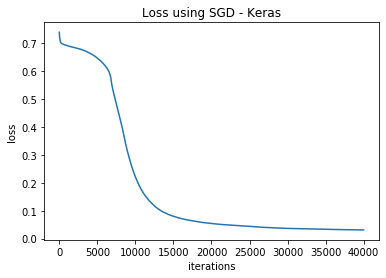

In [14]:
# plot the cost
plt.plot(np.squeeze(loss))
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title("Loss using SGD - Keras")
plt.show()

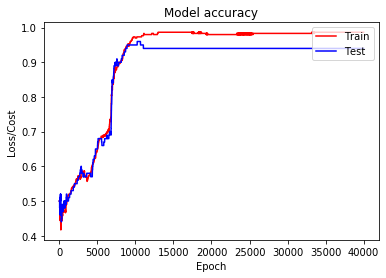

In [15]:
# Plot training & validation accuracy values
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Model accuracy')
plt.ylabel('Loss/Cost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [16]:
# Create a function to make predictions on new data
def predict(X):
    predictions = np.around(model.predict(X))
    
    return predictions

In [17]:
# Run the function on test data
X_test_results = predict(X_test)

In [18]:
# See how each data point is accurately predicted
compare = X_test_results.T == Y_test.T
print(compare)
type(compare)
print(compare.shape)

[[ True  True  True  True  True  True False  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
  False  True  True  True  True  True  True  True False  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True False  True  True  True  True  True  True  True  True
   True  True  True  True  True False  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True False  True  True]]
(1, 100)


In [19]:
def plot_decision_boundary(model, X, y):
    # Spin the arrays
    X = X.T
    y = y.T
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    c=np.reshape(y,-1)
    plt.scatter(X[0, :], X[1, :], c=c, cmap=plt.cm.Spectral)
    plt.show()

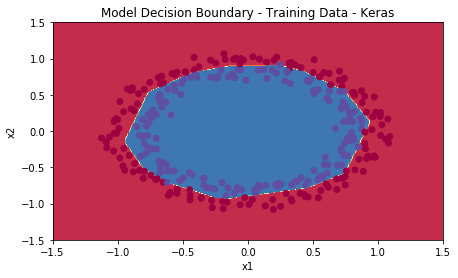

In [20]:
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.title("Model Decision Boundary - Training Data - Keras")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict(x), X_train, Y_train)

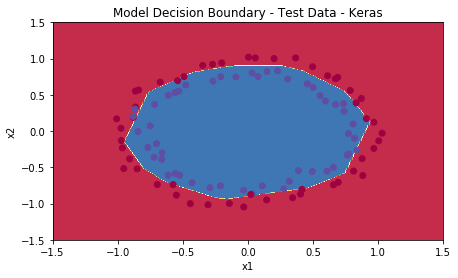

In [21]:
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.title("Model Decision Boundary - Test Data - Keras")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict(x), X_test, Y_test)